## Processing with biomass data of other authors

# Load all data from .csv file

In [61]:
# Import main libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import shap

In [62]:
# Load biomass dataset
input_data = './FULL_DB_BIOMASS_OTHER_ALL_AUTHORS.csv'
df = pd.read_csv(input_data)
df.head()

,Groups,Species,Species_ID,Origin,Origin_ID,SI,A_years,H_m,DBH_cm,N_trees,...,Stem_wood_t_ha,Stem_bark_t_ha,Crown_t_ha,Foliage_t_ha,LN_GS_cub_m,LN_ALL_STEM_t_ha,LN_Stem_wood_t_ha,LN_Stem_bark_t_ha,LN_Crown_t_ha,LN_Foliage_t_ha
0,1,Pine,0,n,0.0,4,50,9.7,14.6,486.0,...,NaN,NaN,8.4,1.6,3.78,2.94,NaN,NaN,2.13,0.47
1,1,Pine,0,n,0.0,2,65,20.6,20.6,785.0,...,NaN,NaN,11.5,4.1,5.54,4.73,NaN,NaN,2.44,1.41
2,1,Pine,0,n,0.0,2,50,13.6,15.4,1745.0,...,NaN,NaN,13.7,4.1,5.25,4.48,NaN,NaN,2.62,1.41
3,1,Pine,0,n,0.0,1,60,23.3,22.2,665.0,...,NaN,NaN,14.4,5.4,5.63,4.67,NaN,NaN,2.67,1.69
4,1,Pine,0,n,0.0,3,65,15.6,16.4,955.0,...,NaN,NaN,14.2,3.4,4.96,4.20,NaN,NaN,2.65,1.22


# List of all parameters for est. of bioproductivity and RN content
"""

All parameters:

'Groups','Species_ID','Origin_ID','SI','A_years','H_m','DBH_cm','RS(P)',          'BA_sq_m_ha','GS_cub_m','ALL_STEM_t_ha','Stem_wood_t_ha','Stem_bark_t_ha',
'Crown_t_ha','Foliage_t_ha'
'LN_GS_cub_m', 'LN_ALL_STEM_t_ha', 'LN_Stem_wood_t_ha', 'LN_Stem_bark_t_ha', 'LN_Crown_t_ha', 'LN_Foliage_t_ha'

"""

In [63]:
# Selecting main working parameters
select = pd.DataFrame(df, columns=['Species_ID','Origin_ID','H_m','DBH_cm', 'BA_sq_m_ha','GS_cub_m','ALL_STEM_t_ha','Stem_wood_t_ha','Stem_bark_t_ha',
'Crown_t_ha','Foliage_t_ha', 'LN_GS_cub_m', 'LN_ALL_STEM_t_ha', 'LN_Stem_wood_t_ha', 'LN_Stem_bark_t_ha', 'LN_Crown_t_ha', 'LN_Foliage_t_ha'])
            
'''
In "Species_ID" column: "0" is Pine, "1" is Spruce, "2" is Birch, "3" is Alder, "4" is Aspen, "5" is Oak
In "Origin_ID" column: "0.0" is nutural stand, "1.0" is artificial stand
'''

# Show the first five columns
select.head()

,Species_ID,Origin_ID,H_m,DBH_cm,BA_sq_m_ha,GS_cub_m,ALL_STEM_t_ha,Stem_wood_t_ha,Stem_bark_t_ha,Crown_t_ha,Foliage_t_ha,LN_GS_cub_m,LN_ALL_STEM_t_ha,LN_Stem_wood_t_ha,LN_Stem_bark_t_ha,LN_Crown_t_ha,LN_Foliage_t_ha
0,0,0.0,9.7,14.6,9.7,43.9,18.9,NaN,NaN,8.4,1.6,3.78,2.94,NaN,NaN,2.13,0.47
1,0,0.0,20.6,20.6,32.2,254.0,113.1,NaN,NaN,11.5,4.1,5.54,4.73,NaN,NaN,2.44,1.41
2,0,0.0,13.6,15.4,35.2,190.0,87.8,NaN,NaN,13.7,4.1,5.25,4.48,NaN,NaN,2.62,1.41
3,0,0.0,23.3,22.2,29.6,277.7,106.5,NaN,NaN,14.4,5.4,5.63,4.67,NaN,NaN,2.67,1.69
4,0,0.0,15.6,16.4,20.4,142.5,67.0,NaN,NaN,14.2,3.4,4.96,4.20,NaN,NaN,2.65,1.22


# Pre-analysis of parameters

In [64]:
# Information on all columns of data frame
select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857 entries, 0 to 856
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Species_ID         857 non-null    int64  
 1   Origin_ID          856 non-null    float64
 2   H_m                857 non-null    float64
 3   DBH_cm             856 non-null    float64
 4   BA_sq_m_ha         857 non-null    float64
 5   GS_cub_m           857 non-null    float64
 6   ALL_STEM_t_ha      855 non-null    float64
 7   Stem_wood_t_ha     747 non-null    float64
 8   Stem_bark_t_ha     747 non-null    float64
 9   Crown_t_ha         843 non-null    float64
 10  Foliage_t_ha       854 non-null    float64
 11  LN_GS_cub_m        857 non-null    float64
 12  LN_ALL_STEM_t_ha   855 non-null    float64
 13  LN_Stem_wood_t_ha  747 non-null    float64
 14  LN_Stem_bark_t_ha  747 non-null    float64
 15  LN_Crown_t_ha      843 non-null    float64
 16  LN_Foliage_t_ha    854 non

In [65]:
# Discribe statistic of forest sites by species and origin
df.groupby(["Species_ID"])["LN_GS_cub_m", "ALL_STEM_t_ha"].describe()

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


LN_GS_cub_m                                                         \
                 count      mean       std   min     25%    50%     75%   max   
Species_ID                                                                      
0                458.0  5.192052  0.897136  0.88  4.8350  5.415  5.8075  6.60   
1                  7.0  5.490000  0.589463  4.65  5.0350  5.700  5.9650  6.08   
2                120.0  4.741667  0.702628  2.31  4.2150  4.855  5.3025  5.92   
3                115.0  5.345478  0.624346  3.32  4.9250  5.500  5.8000  6.31   
4                 66.0  5.057273  0.732497  3.05  4.6175  5.010  5.6675  6.26   
5                 91.0  5.430220  0.830515  2.20  5.0700  5.610  6.0300  6.40   

           ALL_STEM_t_ha                                                       \
                   count        mean        std   min     25%    50%      75%   
Species_ID                                                                      
0                  457.0   97.049891  61.854506   1.8  47.500   92.7  135.900   
1                    7.0  123.814286  61.879895  46.3  70.650  133.9  174.550   
2                  120.0   74.495000  44.523333   5.1  37.275   68.1  103.075   
3                  115.0  107.607826  55.589186  11.0  62.700  106.8  145.450   
4                   66.0   84.946970  58.875162   8.2  40.750   61.2  125.000   
5                   90.0  173.065556  99.100647   5.0  93.075  161.3  253.375   

                   
              max  
Species_ID         
0           310.7  
1           196.1  
2           193.5  
3           251.6  
4           245.4  
5           363.9

In [66]:
# Descriptive statistics of main parameters
select.describe()

,Species_ID,Origin_ID,H_m,DBH_cm,BA_sq_m_ha,GS_cub_m,ALL_STEM_t_ha,Stem_wood_t_ha,Stem_bark_t_ha,Crown_t_ha,Foliage_t_ha,LN_GS_cub_m,LN_ALL_STEM_t_ha,LN_Stem_wood_t_ha,LN_Stem_bark_t_ha,LN_Crown_t_ha,LN_Foliage_t_ha
count,857.000000,856.000000,857.000000,856.000000,857.000000,857.000000,855.000000,747.000000,747.000000,843.000000,854.000000,857.000000,855.000000,747.000000,747.000000,843.000000,854.000000
mean,1.529755,0.279206,16.452275,17.132243,26.329988,229.013069,102.590877,92.779518,12.060107,13.821969,4.749356,5.166919,4.343766,4.246975,2.201232,2.318149,1.364906
std,1.823872,0.448871,7.039954,10.439115,10.629993,144.362106,68.758819,61.992238,9.595428,11.567546,2.826586,0.839680,0.869479,0.854856,0.806766,0.829446,0.672551
min,0.000000,0.000000,1.500000,1.100000,1.000000,2.400000,1.800000,2.000000,0.300000,0.500000,0.200000,0.880000,0.590000,0.690000,-1.200000,-0.690000,-1.610000
25%,0.000000,0.000000,11.200000,9.900000,19.000000,116.000000,47.500000,42.900000,5.950000,6.610000,2.600000,4.750000,3.860000,3.760000,1.780000,1.890000,0.960000
50%,0.000000,0.000000,16.100000,15.500000,26.800000,206.000000,93.500000,84.600000,9.300000,10.820000,4.300000,5.330000,4.540000,4.440000,2.230000,2.380000,1.460000
75%,3.000000,1.000000,21.200000,22.100000,34.500000,320.000000,140.500000,125.500000,15.300000,16.435000,6.367500,5.770000,4.950000,4.830000,2.730000,2.800000,1.850000
max,5.000000,1.000000,38.300000,94.000000,51.500000,735.000000,363.900000,315.200000,65.700000,69.120000,21.730000,6.600000,5.900000,5.750000,4.190000,4.240000,3.080000


# Selecting working columns for the XGBoost algorithms

In [67]:
# We select independent variables and predicting parameter 
X = pd.DataFrame(select, columns= ['Species_ID','Origin_ID','H_m','DBH_cm','BA_sq_m_ha'])
y = pd.DataFrame(select, columns= ['GS_cub_m'])

In [68]:
# Columns in "X" data collections
X.head()

,Species_ID,Origin_ID,H_m,DBH_cm,BA_sq_m_ha
0,0,0.0,9.7,14.6,9.7
1,0,0.0,20.6,20.6,32.2
2,0,0.0,13.6,15.4,35.2
3,0,0.0,23.3,22.2,29.6
4,0,0.0,15.6,16.4,20.4


In [69]:
# Columns in "y" data collections
y.head()

,GS_cub_m
0,43.9
1,254.0
2,190.0
3,277.7
4,142.5


# Create first XGBoost model for estimate varibiality of output stats

In [70]:
#  Importing the main library for building model and its analysis
import xgboost as xgb
from scipy.stats import uniform, randint
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold, RandomizedSearchCV, train_test_split
from sklearn.datasets import make_classification

In [71]:
# K-Folds cross-validation for estimation "quality" of input data for building model
X_kfold = pd.DataFrame(X).to_numpy()
y_kfold = pd.DataFrame(y).to_numpy()

In [72]:
# Function for comparing datasets on homogeneity 
def display_scores(scores):
    print("    Scores: {0}\n    Mean: {1:.3f}\n    Std: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))

In [73]:
# Output results of K-Folds cross-validation for XGBoost model
kfold = KFold(n_splits=3, shuffle=True)
scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(r2_score(y_test, y_pred))
    
print('R square (R2): \n')
display_scores((scores))
print('\n', 20*'-')


scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
      
    scores.append(mean_squared_error(y_test, y_pred))
    
print('Root-mean-square error (RMSE): \n')
display_scores(np.sqrt(scores))
print('\n', 20*'-')

scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(mean_absolute_error(y_test, y_pred))

print('Mean absolute error (MAE): \n')
display_scores((scores))
print('\n', 20*'-')

R square (R2): 

    Scores: [0.9642204678299023, 0.9686814563213224, 0.9715340704339973]
    Mean: 0.968
    Std: 0.003

 --------------------
Root-mean-square error (RMSE): 

    Scores: [26.58718026 23.2556431  27.9260993 ]
    Mean: 25.923
    Std: 1.964

 --------------------
Mean absolute error (MAE): 

    Scores: [17.814951901335814, 17.966373831075387, 16.392036375748482]
    Mean: 17.391
    Std: 0.709

 --------------------


# Add optimal hyperparameters for XGBoost model

In [74]:
# Hyperparameters data for the next step/stage
p1 = 0.8829191872975016               # colsample_bytree
print('Colsample_bytree: ' + str(p1))

p2 = 0.4317747333990657               # gamma
print('Gamma: ' + str(p2))

p3 = 0.17029218845451208              # learning_rate
print('Learning_rate: ' + str(p3))

p4 = 4            # max_depth
print('Max_depth: ' + str(p4))

p5 = 172         # n_estimators
print('N_estimators: ' + str(p5))

p6 = 0.894854733579894            # subsample
print('Subsample: ' + str(p6))

Colsample_bytree: 0.8829191872975016
Gamma: 0.4317747333990657
Learning_rate: 0.17029218845451208
Max_depth: 4
N_estimators: 172
Subsample: 0.894854733579894


# Estimation of predictive quality to basic XGBoost models using Loops

In [75]:
# Create DMatrix (is an internal data structure) 
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [76]:
# Aggregate parameters
aggr_y=[]
aggr_y_pred=[]

aggr_optimal_n=[]
aggr_bias=[]
aggr_rel_bias=[]
aggr_rmse=[]
aggr_rel_rmse=[]
aggr_mse=[]
aggr_R_square=[]

aggr_Shap_values=pd.DataFrame()

# Body loop
for i in range(200):
    
    # Generate test and training samples
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    # Implementation of the scikit-learn API for XGBoost regression
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])
    
    # Fitting the model 
    xgb_model.fit(X_train, y_train, early_stopping_rounds=20, eval_set=[(X_train, y_train), (X_test, y_test)])
    
    # learning dynamics
    y_pred = xgb_model.predict(X_test, ntree_limit=xgb_model.best_ntree_limit)
    
    # Iteration with the best result
    optimal_n= xgb_model.best_ntree_limit-1
    
    # Convert data to 'array' type
    conv_y_pred = pd.DataFrame(y_pred) # Double transformation
    y_pred2 = conv_y_pred.values
    y_test2 = y_test.values
    
    # Intermediate results
    n_sample = len(y_pred2)
    y_mean_sample = y_test.sum() / n_sample
    
    # Calculation of bias
    diff = y_pred2 - y_test2
    bias = diff.sum()/n_sample
    rel_bias = bias/y_mean_sample*100
    
    # Calculation of RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rel_rmse = rmse/y_mean_sample*100 
        
    # Calculation of MSE
    mse = mean_squared_error(y_test, y_pred)   
    
    # Calculation of Square R
    R_square = r2_score(y_test, y_pred)
    
    #Calculation of SHAP-values
    explainer = shap.TreeExplainer(xgb_model)
    shap_values = explainer.shap_values(X_train)
    vals= np.abs(shap_values).mean(0)
    feature_importance = pd.DataFrame(list(zip(X_train.columns,vals)),columns=['Feature','Importance'])
       
    
    #Add values to lists
    aggr_y.append(y_test)
    aggr_y_pred.append(conv_y_pred)
    aggr_optimal_n.append(optimal_n)
    aggr_bias.append(bias)
    aggr_rel_bias.append(rel_bias)
    aggr_rmse.append(rmse)
    aggr_rel_rmse.append(rel_rmse)
    aggr_mse.append(mse)
    aggr_R_square.append(R_square)
    aggr_Shap_values = aggr_Shap_values.append(feature_importance, ignore_index=True)
    
# Intermedia data to calculate CI
n_train = len(y_train)
n_test = len(y_test)

[0]	validation_0-rmse:227.52680	validation_1-rmse:221.21383
[1]	validation_0-rmse:192.00352	validation_1-rmse:187.46699
[2]	validation_0-rmse:161.08932	validation_1-rmse:158.78864
[3]	validation_0-rmse:135.70260	validation_1-rmse:134.94473
[4]	validation_0-rmse:114.64620	validation_1-rmse:114.88237
[5]	validation_0-rmse:96.95416	validation_1-rmse:98.40312
[6]	validation_0-rmse:82.31309	validation_1-rmse:85.21834
[7]	validation_0-rmse:70.13452	validation_1-rmse:73.99367
[8]	validation_0-rmse:60.58436	validation_1-rmse:65.41461


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:52.36046	validation_1-rmse:57.64982
[10]	validation_0-rmse:45.68470	validation_1-rmse:51.21540
[11]	validation_0-rmse:40.07694	validation_1-rmse:45.84996
[12]	validation_0-rmse:35.78956	validation_1-rmse:42.23605
[13]	validation_0-rmse:32.14386	validation_1-rmse:38.92684
[14]	validation_0-rmse:29.32809	validation_1-rmse:36.46252
[15]	validation_0-rmse:27.00310	validation_1-rmse:34.28296
[16]	validation_0-rmse:25.09974	validation_1-rmse:32.41514
[17]	validation_0-rmse:23.65921	validation_1-rmse:30.93820
[18]	validation_0-rmse:22.38590	validation_1-rmse:29.85636
[19]	validation_0-rmse:21.42503	validation_1-rmse:28.80401
[20]	validation_0-rmse:20.69253	validation_1-rmse:27.84626
[21]	validation_0-rmse:20.01208	validation_1-rmse:26.88847
[22]	validation_0-rmse:19.42072	validation_1-rmse:26.46197
[23]	validation_0-rmse:18.97316	validation_1-rmse:25.87134
[24]	validation_0-rmse:18.55496	validation_1-rmse:25.73385
[25]	validation_0-rmse:18.20796	validation_1-rmse:25.4258

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:229.17279	validation_1-rmse:213.42079
[1]	validation_0-rmse:193.52309	validation_1-rmse:180.10892
[2]	validation_0-rmse:162.44280	validation_1-rmse:150.93271
[3]	validation_0-rmse:136.67644	validation_1-rmse:127.14817


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:115.43830	validation_1-rmse:107.56669
[5]	validation_0-rmse:97.59424	validation_1-rmse:91.52270
[6]	validation_0-rmse:82.73212	validation_1-rmse:78.03097
[7]	validation_0-rmse:70.79004	validation_1-rmse:67.12251
[8]	validation_0-rmse:61.32475	validation_1-rmse:58.16618
[9]	validation_0-rmse:52.98667	validation_1-rmse:50.91637
[10]	validation_0-rmse:46.07305	validation_1-rmse:44.84683
[11]	validation_0-rmse:40.55898	validation_1-rmse:40.15791
[12]	validation_0-rmse:36.31716	validation_1-rmse:36.22286
[13]	validation_0-rmse:32.64649	validation_1-rmse:33.33046
[14]	validation_0-rmse:29.62820	validation_1-rmse:30.97504
[15]	validation_0-rmse:27.17449	validation_1-rmse:29.23076
[16]	validation_0-rmse:25.28706	validation_1-rmse:27.87447
[17]	validation_0-rmse:23.86834	validation_1-rmse:26.71756
[18]	validation_0-rmse:22.69218	validation_1-rmse:26.03764
[19]	validation_0-rmse:21.83318	validation_1-rmse:25.55339
[20]	validation_0-rmse:21.11908	validation_1-rmse:25.05716
[

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:226.14007	validation_1-rmse:227.19968


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:191.27262	validation_1-rmse:192.91389
[2]	validation_0-rmse:160.69572	validation_1-rmse:162.30576
[3]	validation_0-rmse:135.15118	validation_1-rmse:137.16583
[4]	validation_0-rmse:114.17729	validation_1-rmse:117.11569
[5]	validation_0-rmse:96.52159	validation_1-rmse:99.17045
[6]	validation_0-rmse:81.88994	validation_1-rmse:85.94080
[7]	validation_0-rmse:69.75693	validation_1-rmse:75.22756
[8]	validation_0-rmse:60.27691	validation_1-rmse:66.27334
[9]	validation_0-rmse:51.96370	validation_1-rmse:58.78670
[10]	validation_0-rmse:45.34551	validation_1-rmse:53.13490
[11]	validation_0-rmse:39.79198	validation_1-rmse:48.28216
[12]	validation_0-rmse:35.58207	validation_1-rmse:44.30845
[13]	validation_0-rmse:31.92926	validation_1-rmse:41.61743
[14]	validation_0-rmse:28.98536	validation_1-rmse:39.24494
[15]	validation_0-rmse:26.60759	validation_1-rmse:37.30643
[16]	validation_0-rmse:24.72629	validation_1-rmse:36.25609
[17]	validation_0-rmse:23.29685	validation_1-rmse:35.2007

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:225.96277	validation_1-rmse:229.81492
[1]	validation_0-rmse:190.69529	validation_1-rmse:195.44576
[2]	validation_0-rmse:159.84087	validation_1-rmse:164.92230
[3]	validation_0-rmse:134.61846	validation_1-rmse:140.23290
[4]	validation_0-rmse:113.58340	validation_1-rmse:119.36757
[5]	validation_0-rmse:95.92778	validation_1-rmse:102.23167
[6]	validation_0-rmse:81.31327	validation_1-rmse:87.96113
[7]	validation_0-rmse:69.47029	validation_1-rmse:76.72857
[8]	validation_0-rmse:59.95910	validation_1-rmse:68.11008


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:51.59623	validation_1-rmse:60.20249
[10]	validation_0-rmse:44.91918	validation_1-rmse:53.64480
[11]	validation_0-rmse:39.42747	validation_1-rmse:48.26225
[12]	validation_0-rmse:35.33211	validation_1-rmse:45.08320
[13]	validation_0-rmse:31.58484	validation_1-rmse:42.18641
[14]	validation_0-rmse:28.56236	validation_1-rmse:39.43591
[15]	validation_0-rmse:26.27208	validation_1-rmse:37.44060
[16]	validation_0-rmse:24.42892	validation_1-rmse:36.27275
[17]	validation_0-rmse:22.94330	validation_1-rmse:35.36750
[18]	validation_0-rmse:21.73713	validation_1-rmse:34.58497
[19]	validation_0-rmse:20.84611	validation_1-rmse:33.97107
[20]	validation_0-rmse:20.13230	validation_1-rmse:33.03570
[21]	validation_0-rmse:19.51127	validation_1-rmse:32.66683
[22]	validation_0-rmse:18.92983	validation_1-rmse:32.20354
[23]	validation_0-rmse:18.46498	validation_1-rmse:31.98050
[24]	validation_0-rmse:18.03887	validation_1-rmse:31.82869
[25]	validation_0-rmse:17.69992	validation_1-rmse:31.7222

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:222.66112	validation_1-rmse:240.57411
[1]	validation_0-rmse:188.29223	validation_1-rmse:203.87906
[2]	validation_0-rmse:158.20682	validation_1-rmse:171.08585
[3]	validation_0-rmse:133.16438	validation_1-rmse:143.43316
[4]	validation_0-rmse:112.60449	validation_1-rmse:120.52828
[5]	validation_0-rmse:95.37505	validation_1-rmse:101.57046
[6]	validation_0-rmse:80.93786	validation_1-rmse:86.45996
[7]	validation_0-rmse:69.26066	validation_1-rmse:73.86655
[8]	validation_0-rmse:60.09700	validation_1-rmse:64.52158
[9]	validation_0-rmse:52.05510	validation_1-rmse:56.50652
[10]	validation_0-rmse:45.31132	validation_1-rmse:49.75901
[11]	validation_0-rmse:39.87429	validation_1-rmse:44.70763
[12]	validation_0-rmse:35.84360	validation_1-rmse:40.94231


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[13]	validation_0-rmse:32.17619	validation_1-rmse:37.73970
[14]	validation_0-rmse:29.21016	validation_1-rmse:35.16826
[15]	validation_0-rmse:26.90234	validation_1-rmse:33.38553
[16]	validation_0-rmse:25.13029	validation_1-rmse:32.09284
[17]	validation_0-rmse:23.60573	validation_1-rmse:31.20313
[18]	validation_0-rmse:22.40687	validation_1-rmse:30.52966
[19]	validation_0-rmse:21.44821	validation_1-rmse:29.86203
[20]	validation_0-rmse:20.72384	validation_1-rmse:29.54077
[21]	validation_0-rmse:20.13167	validation_1-rmse:29.22756
[22]	validation_0-rmse:19.63981	validation_1-rmse:29.11561
[23]	validation_0-rmse:19.27961	validation_1-rmse:29.10751
[24]	validation_0-rmse:18.94257	validation_1-rmse:28.83231
[25]	validation_0-rmse:18.48973	validation_1-rmse:28.44294
[26]	validation_0-rmse:18.20367	validation_1-rmse:28.42175
[27]	validation_0-rmse:17.96617	validation_1-rmse:28.54792
[28]	validation_0-rmse:17.70367	validation_1-rmse:28.37216
[29]	validation_0-rmse:17.42151	validation_1-rmse:28.247

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:224.69484	validation_1-rmse:233.21416
[1]	validation_0-rmse:189.49081	validation_1-rmse:197.69292
[2]	validation_0-rmse:159.04121	validation_1-rmse:167.11466
[3]	validation_0-rmse:133.64592	validation_1-rmse:141.52267
[4]	validation_0-rmse:112.83619	validation_1-rmse:121.20716
[5]	validation_0-rmse:95.24183	validation_1-rmse:103.78842
[6]	validation_0-rmse:80.84186	validation_1-rmse:90.23155


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:68.83099	validation_1-rmse:78.66238
[8]	validation_0-rmse:59.56118	validation_1-rmse:69.66304
[9]	validation_0-rmse:51.51570	validation_1-rmse:62.19353
[10]	validation_0-rmse:45.00661	validation_1-rmse:55.96051
[11]	validation_0-rmse:39.58364	validation_1-rmse:50.63984
[12]	validation_0-rmse:35.61658	validation_1-rmse:47.09604
[13]	validation_0-rmse:32.06178	validation_1-rmse:43.77597
[14]	validation_0-rmse:29.39385	validation_1-rmse:41.24923
[15]	validation_0-rmse:27.08716	validation_1-rmse:38.90491
[16]	validation_0-rmse:25.25809	validation_1-rmse:37.25382
[17]	validation_0-rmse:23.69339	validation_1-rmse:36.04830
[18]	validation_0-rmse:22.52065	validation_1-rmse:35.18979
[19]	validation_0-rmse:21.47084	validation_1-rmse:34.31418
[20]	validation_0-rmse:20.69400	validation_1-rmse:33.62028
[21]	validation_0-rmse:20.06485	validation_1-rmse:33.19382
[22]	validation_0-rmse:19.40138	validation_1-rmse:32.91627
[23]	validation_0-rmse:18.97777	validation_1-rmse:32.53618


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:225.05021	validation_1-rmse:230.44685
[1]	validation_0-rmse:189.88488	validation_1-rmse:194.30331
[2]	validation_0-rmse:159.58951	validation_1-rmse:163.48713
[3]	validation_0-rmse:134.29939	validation_1-rmse:137.60505
[4]	validation_0-rmse:113.59489	validation_1-rmse:116.87956
[5]	validation_0-rmse:96.10025	validation_1-rmse:99.32671
[6]	validation_0-rmse:81.65555	validation_1-rmse:84.19083
[7]	validation_0-rmse:69.62587	validation_1-rmse:72.09992


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:60.28804	validation_1-rmse:63.11564
[9]	validation_0-rmse:52.06751	validation_1-rmse:54.74423
[10]	validation_0-rmse:45.40891	validation_1-rmse:48.40197
[11]	validation_0-rmse:39.95248	validation_1-rmse:43.43383
[12]	validation_0-rmse:35.99888	validation_1-rmse:39.80707
[13]	validation_0-rmse:32.43481	validation_1-rmse:36.47889
[14]	validation_0-rmse:29.51640	validation_1-rmse:33.95394
[15]	validation_0-rmse:27.23253	validation_1-rmse:31.91028
[16]	validation_0-rmse:25.38395	validation_1-rmse:30.38218
[17]	validation_0-rmse:23.98877	validation_1-rmse:28.99673
[18]	validation_0-rmse:22.79615	validation_1-rmse:28.08913
[19]	validation_0-rmse:21.83967	validation_1-rmse:27.55114
[20]	validation_0-rmse:20.97986	validation_1-rmse:26.81637
[21]	validation_0-rmse:20.30255	validation_1-rmse:26.41268
[22]	validation_0-rmse:19.82922	validation_1-rmse:26.25167
[23]	validation_0-rmse:19.40798	validation_1-rmse:25.84841
[24]	validation_0-rmse:19.01729	validation_1-rmse:25.61426

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:225.39938	validation_1-rmse:231.57855
[1]	validation_0-rmse:190.23202	validation_1-rmse:194.87425
[2]	validation_0-rmse:159.63705	validation_1-rmse:164.67690
[3]	validation_0-rmse:134.46287	validation_1-rmse:139.31049


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:113.56501	validation_1-rmse:119.12565
[5]	validation_0-rmse:96.03207	validation_1-rmse:101.78617
[6]	validation_0-rmse:81.40397	validation_1-rmse:87.30827
[7]	validation_0-rmse:69.48176	validation_1-rmse:75.65709
[8]	validation_0-rmse:60.06898	validation_1-rmse:66.75907
[9]	validation_0-rmse:51.83065	validation_1-rmse:58.68428
[10]	validation_0-rmse:45.26148	validation_1-rmse:52.69742
[11]	validation_0-rmse:39.94645	validation_1-rmse:47.61743
[12]	validation_0-rmse:35.80857	validation_1-rmse:43.84102
[13]	validation_0-rmse:32.09661	validation_1-rmse:40.50028
[14]	validation_0-rmse:29.27563	validation_1-rmse:37.98853
[15]	validation_0-rmse:27.03283	validation_1-rmse:35.93490
[16]	validation_0-rmse:25.16806	validation_1-rmse:33.87243
[17]	validation_0-rmse:23.77168	validation_1-rmse:32.43324
[18]	validation_0-rmse:22.71962	validation_1-rmse:31.53853
[19]	validation_0-rmse:21.80793	validation_1-rmse:30.76384
[20]	validation_0-rmse:21.01088	validation_1-rmse:30.11637


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:228.09174	validation_1-rmse:219.54806
[1]	validation_0-rmse:192.52167	validation_1-rmse:184.65677
[2]	validation_0-rmse:161.77341	validation_1-rmse:155.82236
[3]	validation_0-rmse:135.80610	validation_1-rmse:130.84113
[4]	validation_0-rmse:114.88784	validation_1-rmse:110.58553


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:97.24014	validation_1-rmse:94.03288
[6]	validation_0-rmse:82.60235	validation_1-rmse:80.00029
[7]	validation_0-rmse:70.63900	validation_1-rmse:68.93399
[8]	validation_0-rmse:60.92018	validation_1-rmse:59.74704
[9]	validation_0-rmse:52.59655	validation_1-rmse:52.12154
[10]	validation_0-rmse:45.78171	validation_1-rmse:46.17870
[11]	validation_0-rmse:40.14121	validation_1-rmse:41.72688
[12]	validation_0-rmse:35.69129	validation_1-rmse:37.81090
[13]	validation_0-rmse:32.01048	validation_1-rmse:35.18246
[14]	validation_0-rmse:29.16641	validation_1-rmse:33.16686
[15]	validation_0-rmse:26.79232	validation_1-rmse:31.60416
[16]	validation_0-rmse:24.93987	validation_1-rmse:30.31339
[17]	validation_0-rmse:23.43370	validation_1-rmse:29.35817
[18]	validation_0-rmse:22.26251	validation_1-rmse:28.62884
[19]	validation_0-rmse:21.32796	validation_1-rmse:27.83540
[20]	validation_0-rmse:20.54901	validation_1-rmse:27.52953
[21]	validation_0-rmse:19.85275	validation_1-rmse:27.40968
[2

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:226.61839	validation_1-rmse:226.16791
[1]	validation_0-rmse:191.59104	validation_1-rmse:191.19306
[2]	validation_0-rmse:160.86215	validation_1-rmse:160.85860
[3]	validation_0-rmse:135.39227	validation_1-rmse:135.42241
[4]	validation_0-rmse:114.39428	validation_1-rmse:115.21244


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:96.82213	validation_1-rmse:97.64001
[6]	validation_0-rmse:82.16787	validation_1-rmse:82.61530
[7]	validation_0-rmse:70.31429	validation_1-rmse:71.36844
[8]	validation_0-rmse:60.80112	validation_1-rmse:62.01591
[9]	validation_0-rmse:52.48758	validation_1-rmse:53.24075
[10]	validation_0-rmse:45.83184	validation_1-rmse:46.40869
[11]	validation_0-rmse:40.19729	validation_1-rmse:41.67472
[12]	validation_0-rmse:35.92843	validation_1-rmse:38.02118
[13]	validation_0-rmse:32.28464	validation_1-rmse:34.61425
[14]	validation_0-rmse:29.62729	validation_1-rmse:32.47768
[15]	validation_0-rmse:27.28911	validation_1-rmse:30.54451
[16]	validation_0-rmse:25.42164	validation_1-rmse:28.79609
[17]	validation_0-rmse:23.97160	validation_1-rmse:27.66956
[18]	validation_0-rmse:22.74693	validation_1-rmse:26.75141
[19]	validation_0-rmse:21.84397	validation_1-rmse:26.00455
[20]	validation_0-rmse:21.08245	validation_1-rmse:25.66215
[21]	validation_0-rmse:20.48856	validation_1-rmse:25.16128
[2

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:227.58428	validation_1-rmse:223.02841
[1]	validation_0-rmse:191.99378	validation_1-rmse:188.68455
[2]	validation_0-rmse:160.92440	validation_1-rmse:158.00638
[3]	validation_0-rmse:135.23530	validation_1-rmse:134.02240


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:114.22260	validation_1-rmse:113.98509
[5]	validation_0-rmse:96.50410	validation_1-rmse:96.95767
[6]	validation_0-rmse:81.98815	validation_1-rmse:83.00747
[7]	validation_0-rmse:69.96946	validation_1-rmse:71.45491
[8]	validation_0-rmse:60.61465	validation_1-rmse:62.39439
[9]	validation_0-rmse:52.36248	validation_1-rmse:54.63630
[10]	validation_0-rmse:45.51251	validation_1-rmse:48.23456
[11]	validation_0-rmse:39.93538	validation_1-rmse:43.43380
[12]	validation_0-rmse:35.80763	validation_1-rmse:39.85903
[13]	validation_0-rmse:32.01828	validation_1-rmse:36.42556
[14]	validation_0-rmse:29.22624	validation_1-rmse:34.08598
[15]	validation_0-rmse:26.89279	validation_1-rmse:32.25271
[16]	validation_0-rmse:25.09144	validation_1-rmse:30.88759
[17]	validation_0-rmse:23.68973	validation_1-rmse:29.86683
[18]	validation_0-rmse:22.50912	validation_1-rmse:29.12270
[19]	validation_0-rmse:21.66588	validation_1-rmse:28.54928
[20]	validation_0-rmse:20.80655	validation_1-rmse:28.12958
[

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:228.84761	validation_1-rmse:215.22719
[1]	validation_0-rmse:192.88245	validation_1-rmse:181.50505
[2]	validation_0-rmse:162.04467	validation_1-rmse:152.85471
[3]	validation_0-rmse:136.19162	validation_1-rmse:128.50767
[4]	validation_0-rmse:115.43397	validation_1-rmse:109.97109


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:97.48663	validation_1-rmse:93.30833
[6]	validation_0-rmse:82.67175	validation_1-rmse:80.10452
[7]	validation_0-rmse:70.28461	validation_1-rmse:68.92098
[8]	validation_0-rmse:60.83081	validation_1-rmse:59.80214
[9]	validation_0-rmse:52.46331	validation_1-rmse:52.46158
[10]	validation_0-rmse:45.65842	validation_1-rmse:46.65377
[11]	validation_0-rmse:40.10822	validation_1-rmse:41.55151
[12]	validation_0-rmse:35.93264	validation_1-rmse:37.89065
[13]	validation_0-rmse:32.21776	validation_1-rmse:34.98382
[14]	validation_0-rmse:29.30060	validation_1-rmse:32.50127
[15]	validation_0-rmse:27.00850	validation_1-rmse:30.90462
[16]	validation_0-rmse:25.24598	validation_1-rmse:29.56519
[17]	validation_0-rmse:23.66551	validation_1-rmse:28.27638
[18]	validation_0-rmse:22.48203	validation_1-rmse:27.69159
[19]	validation_0-rmse:21.56943	validation_1-rmse:27.09308
[20]	validation_0-rmse:20.84421	validation_1-rmse:26.38014
[21]	validation_0-rmse:20.22986	validation_1-rmse:25.99845
[2

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:230.08043	validation_1-rmse:211.15856
[1]	validation_0-rmse:194.13414	validation_1-rmse:177.12083
[2]	validation_0-rmse:163.14157	validation_1-rmse:148.77877
[3]	validation_0-rmse:136.98665	validation_1-rmse:124.71472
[4]	validation_0-rmse:115.72688	validation_1-rmse:105.21287
[5]	validation_0-rmse:97.93013	validation_1-rmse:89.63598


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:83.13102	validation_1-rmse:76.55815
[7]	validation_0-rmse:70.81020	validation_1-rmse:65.77702
[8]	validation_0-rmse:61.18477	validation_1-rmse:57.17421
[9]	validation_0-rmse:52.69022	validation_1-rmse:50.08103
[10]	validation_0-rmse:45.79731	validation_1-rmse:44.90093
[11]	validation_0-rmse:40.24004	validation_1-rmse:40.96866
[12]	validation_0-rmse:36.03490	validation_1-rmse:37.53915
[13]	validation_0-rmse:32.14565	validation_1-rmse:35.36152
[14]	validation_0-rmse:29.18589	validation_1-rmse:33.79600
[15]	validation_0-rmse:26.73623	validation_1-rmse:32.73299
[16]	validation_0-rmse:24.87091	validation_1-rmse:31.95196
[17]	validation_0-rmse:23.26240	validation_1-rmse:31.44216
[18]	validation_0-rmse:22.20235	validation_1-rmse:31.09012
[19]	validation_0-rmse:21.33516	validation_1-rmse:30.71604
[20]	validation_0-rmse:20.44157	validation_1-rmse:30.30513
[21]	validation_0-rmse:19.73655	validation_1-rmse:30.00241
[22]	validation_0-rmse:19.23020	validation_1-rmse:29.75776
[

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:221.86711	validation_1-rmse:245.24712
[1]	validation_0-rmse:187.20117	validation_1-rmse:208.73241
[2]	validation_0-rmse:157.31848	validation_1-rmse:177.32052
[3]	validation_0-rmse:132.48636	validation_1-rmse:151.33111
[4]	validation_0-rmse:112.07875	validation_1-rmse:129.92197
[5]	validation_0-rmse:94.90816	validation_1-rmse:111.57965
[6]	validation_0-rmse:80.75553	validation_1-rmse:96.04652
[7]	validation_0-rmse:68.99666	validation_1-rmse:82.79892


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:60.01531	validation_1-rmse:72.92259
[9]	validation_0-rmse:52.01931	validation_1-rmse:63.89822
[10]	validation_0-rmse:45.47244	validation_1-rmse:56.10189
[11]	validation_0-rmse:40.14059	validation_1-rmse:50.28007
[12]	validation_0-rmse:36.12642	validation_1-rmse:45.82230
[13]	validation_0-rmse:32.44590	validation_1-rmse:41.61591
[14]	validation_0-rmse:29.69680	validation_1-rmse:38.33632
[15]	validation_0-rmse:27.45635	validation_1-rmse:35.74754
[16]	validation_0-rmse:25.61908	validation_1-rmse:33.60805
[17]	validation_0-rmse:24.09668	validation_1-rmse:31.60326
[18]	validation_0-rmse:22.91367	validation_1-rmse:30.45895
[19]	validation_0-rmse:21.98646	validation_1-rmse:29.18100
[20]	validation_0-rmse:21.12836	validation_1-rmse:28.05926
[21]	validation_0-rmse:20.45990	validation_1-rmse:27.45242
[22]	validation_0-rmse:19.95069	validation_1-rmse:27.02277
[23]	validation_0-rmse:19.35012	validation_1-rmse:26.53492
[24]	validation_0-rmse:18.95580	validation_1-rmse:26.36554

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:228.91001	validation_1-rmse:214.26542
[1]	validation_0-rmse:193.23208	validation_1-rmse:179.64129
[2]	validation_0-rmse:162.20019	validation_1-rmse:149.67159
[3]	validation_0-rmse:136.63405	validation_1-rmse:125.40773
[4]	validation_0-rmse:115.29100	validation_1-rmse:105.31887
[5]	validation_0-rmse:97.55733	validation_1-rmse:87.93559


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:82.75143	validation_1-rmse:74.26175
[7]	validation_0-rmse:70.63824	validation_1-rmse:62.36213
[8]	validation_0-rmse:61.12939	validation_1-rmse:54.01008
[9]	validation_0-rmse:52.81058	validation_1-rmse:47.11836
[10]	validation_0-rmse:46.11374	validation_1-rmse:40.88092
[11]	validation_0-rmse:40.65490	validation_1-rmse:36.24621
[12]	validation_0-rmse:36.47040	validation_1-rmse:33.32847
[13]	validation_0-rmse:32.70821	validation_1-rmse:30.56557
[14]	validation_0-rmse:29.73450	validation_1-rmse:28.40609
[15]	validation_0-rmse:27.42381	validation_1-rmse:27.12214
[16]	validation_0-rmse:25.54587	validation_1-rmse:26.04892
[17]	validation_0-rmse:24.15446	validation_1-rmse:25.34084
[18]	validation_0-rmse:23.05547	validation_1-rmse:24.71572
[19]	validation_0-rmse:22.14031	validation_1-rmse:24.30901
[20]	validation_0-rmse:21.32387	validation_1-rmse:23.98473
[21]	validation_0-rmse:20.59161	validation_1-rmse:23.60974
[22]	validation_0-rmse:19.84927	validation_1-rmse:23.51530
[

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:228.03304	validation_1-rmse:217.39399
[1]	validation_0-rmse:192.46046	validation_1-rmse:182.92371


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:161.60226	validation_1-rmse:152.22595
[3]	validation_0-rmse:136.08838	validation_1-rmse:127.44059
[4]	validation_0-rmse:114.93318	validation_1-rmse:106.70486
[5]	validation_0-rmse:97.23713	validation_1-rmse:90.07853
[6]	validation_0-rmse:82.61067	validation_1-rmse:76.33886
[7]	validation_0-rmse:70.34052	validation_1-rmse:64.45911
[8]	validation_0-rmse:60.75053	validation_1-rmse:54.90924
[9]	validation_0-rmse:52.52021	validation_1-rmse:47.31505
[10]	validation_0-rmse:45.72726	validation_1-rmse:41.19207
[11]	validation_0-rmse:40.36376	validation_1-rmse:36.34595
[12]	validation_0-rmse:36.21011	validation_1-rmse:32.67857
[13]	validation_0-rmse:32.50866	validation_1-rmse:29.71954
[14]	validation_0-rmse:29.64347	validation_1-rmse:27.47416
[15]	validation_0-rmse:27.35259	validation_1-rmse:25.87786
[16]	validation_0-rmse:25.40954	validation_1-rmse:24.78223
[17]	validation_0-rmse:23.96296	validation_1-rmse:23.97460
[18]	validation_0-rmse:22.77909	validation_1-rmse:23.44351

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:226.30497	validation_1-rmse:226.45661
[1]	validation_0-rmse:190.76855	validation_1-rmse:192.18530
[2]	validation_0-rmse:160.37725	validation_1-rmse:160.80704
[3]	validation_0-rmse:135.13360	validation_1-rmse:135.37331
[4]	validation_0-rmse:114.16582	validation_1-rmse:113.65503
[5]	validation_0-rmse:96.69293	validation_1-rmse:96.09599
[6]	validation_0-rmse:82.14666	validation_1-rmse:81.31520
[7]	validation_0-rmse:69.93558	validation_1-rmse:69.44196
[8]	validation_0-rmse:60.69627	validation_1-rmse:60.81080
[9]	validation_0-rmse:52.43639	validation_1-rmse:53.20505
[10]	validation_0-rmse:45.75399	validation_1-rmse:47.28728
[11]	validation_0-rmse:40.13821	validation_1-rmse:42.15931
[12]	validation_0-rmse:35.88886	validation_1-rmse:38.79605
[13]	validation_0-rmse:32.11862	validation_1-rmse:35.46951
[14]	validation_0-rmse:29.17737	validation_1-rmse:33.19204
[15]	validation_0-rmse:26.81398	validation_1-rmse:31.36237
[16]	validation_0-rmse:24.88664	validation_1-rmse:29.910

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:226.28919	validation_1-rmse:226.43137
[1]	validation_0-rmse:191.20377	validation_1-rmse:191.41284
[2]	validation_0-rmse:160.79105	validation_1-rmse:161.20846


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:135.12194	validation_1-rmse:135.27907
[4]	validation_0-rmse:114.26722	validation_1-rmse:114.90586
[5]	validation_0-rmse:96.62365	validation_1-rmse:97.64419
[6]	validation_0-rmse:82.11700	validation_1-rmse:82.92877
[7]	validation_0-rmse:70.19538	validation_1-rmse:71.08193
[8]	validation_0-rmse:60.74328	validation_1-rmse:62.18186
[9]	validation_0-rmse:52.64710	validation_1-rmse:54.06077
[10]	validation_0-rmse:45.88810	validation_1-rmse:47.33230
[11]	validation_0-rmse:40.39850	validation_1-rmse:42.23624
[12]	validation_0-rmse:36.27059	validation_1-rmse:38.14799
[13]	validation_0-rmse:32.75450	validation_1-rmse:34.93565
[14]	validation_0-rmse:30.00930	validation_1-rmse:32.58967
[15]	validation_0-rmse:27.71893	validation_1-rmse:30.35270
[16]	validation_0-rmse:25.81612	validation_1-rmse:28.74685
[17]	validation_0-rmse:24.35774	validation_1-rmse:27.57705
[18]	validation_0-rmse:23.30780	validation_1-rmse:26.81584
[19]	validation_0-rmse:22.36614	validation_1-rmse:26.11993


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:226.07372	validation_1-rmse:227.27197


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:190.51780	validation_1-rmse:190.89910
[2]	validation_0-rmse:159.97060	validation_1-rmse:159.65213
[3]	validation_0-rmse:134.49741	validation_1-rmse:134.11324
[4]	validation_0-rmse:113.57388	validation_1-rmse:112.90474
[5]	validation_0-rmse:95.97486	validation_1-rmse:95.33419
[6]	validation_0-rmse:81.45366	validation_1-rmse:80.85013
[7]	validation_0-rmse:69.48610	validation_1-rmse:68.49903
[8]	validation_0-rmse:60.28927	validation_1-rmse:58.88666
[9]	validation_0-rmse:52.14737	validation_1-rmse:51.14409
[10]	validation_0-rmse:45.63733	validation_1-rmse:44.92151
[11]	validation_0-rmse:40.12283	validation_1-rmse:39.72136
[12]	validation_0-rmse:35.97261	validation_1-rmse:35.85685
[13]	validation_0-rmse:32.30381	validation_1-rmse:32.58466
[14]	validation_0-rmse:29.42648	validation_1-rmse:30.11241
[15]	validation_0-rmse:27.12147	validation_1-rmse:28.08225
[16]	validation_0-rmse:25.27578	validation_1-rmse:26.56058
[17]	validation_0-rmse:23.83567	validation_1-rmse:25.5660

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:229.93039	validation_1-rmse:211.80214
[1]	validation_0-rmse:194.13703	validation_1-rmse:177.29723
[2]	validation_0-rmse:162.85606	validation_1-rmse:148.10084


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:136.95588	validation_1-rmse:124.41388
[4]	validation_0-rmse:115.74505	validation_1-rmse:104.64937
[5]	validation_0-rmse:98.01164	validation_1-rmse:87.90500
[6]	validation_0-rmse:83.35490	validation_1-rmse:75.23440
[7]	validation_0-rmse:71.25004	validation_1-rmse:64.80568
[8]	validation_0-rmse:61.57065	validation_1-rmse:56.54692
[9]	validation_0-rmse:53.20575	validation_1-rmse:49.69238
[10]	validation_0-rmse:46.50655	validation_1-rmse:44.16508
[11]	validation_0-rmse:41.06174	validation_1-rmse:40.19514
[12]	validation_0-rmse:36.83052	validation_1-rmse:36.95863
[13]	validation_0-rmse:33.01959	validation_1-rmse:34.28439
[14]	validation_0-rmse:30.10505	validation_1-rmse:32.40853
[15]	validation_0-rmse:27.73834	validation_1-rmse:30.50045
[16]	validation_0-rmse:25.78562	validation_1-rmse:29.36765
[17]	validation_0-rmse:24.23393	validation_1-rmse:28.36505
[18]	validation_0-rmse:23.09838	validation_1-rmse:27.55230
[19]	validation_0-rmse:22.09238	validation_1-rmse:26.63088


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:225.71128	validation_1-rmse:228.91864
[1]	validation_0-rmse:190.70149	validation_1-rmse:193.44665


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:160.08111	validation_1-rmse:161.95153
[3]	validation_0-rmse:134.78283	validation_1-rmse:136.90569
[4]	validation_0-rmse:114.11562	validation_1-rmse:116.51185
[5]	validation_0-rmse:96.46527	validation_1-rmse:99.28971
[6]	validation_0-rmse:81.87525	validation_1-rmse:85.00275
[7]	validation_0-rmse:69.71562	validation_1-rmse:73.36785
[8]	validation_0-rmse:60.17239	validation_1-rmse:64.37403
[9]	validation_0-rmse:51.95703	validation_1-rmse:56.96365
[10]	validation_0-rmse:45.30500	validation_1-rmse:50.96851
[11]	validation_0-rmse:39.91095	validation_1-rmse:46.06282
[12]	validation_0-rmse:35.77029	validation_1-rmse:42.32116
[13]	validation_0-rmse:32.13613	validation_1-rmse:39.20296
[14]	validation_0-rmse:29.16580	validation_1-rmse:36.94736
[15]	validation_0-rmse:26.94370	validation_1-rmse:35.01010
[16]	validation_0-rmse:25.14627	validation_1-rmse:33.77827
[17]	validation_0-rmse:23.76829	validation_1-rmse:32.68012
[18]	validation_0-rmse:22.61128	validation_1-rmse:31.91722

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:228.44230	validation_1-rmse:217.63184
[1]	validation_0-rmse:192.73020	validation_1-rmse:184.33399


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:161.75563	validation_1-rmse:154.33091
[3]	validation_0-rmse:136.22586	validation_1-rmse:129.46218
[4]	validation_0-rmse:115.26720	validation_1-rmse:109.83813
[5]	validation_0-rmse:97.46697	validation_1-rmse:92.75789
[6]	validation_0-rmse:82.78052	validation_1-rmse:78.95462
[7]	validation_0-rmse:70.73037	validation_1-rmse:67.43268
[8]	validation_0-rmse:61.25329	validation_1-rmse:58.78865
[9]	validation_0-rmse:52.78465	validation_1-rmse:51.18783
[10]	validation_0-rmse:45.89854	validation_1-rmse:45.06377
[11]	validation_0-rmse:40.35711	validation_1-rmse:39.93852
[12]	validation_0-rmse:36.23229	validation_1-rmse:36.67036
[13]	validation_0-rmse:32.61937	validation_1-rmse:33.63573
[14]	validation_0-rmse:29.63755	validation_1-rmse:31.22621
[15]	validation_0-rmse:27.29196	validation_1-rmse:29.65979
[16]	validation_0-rmse:25.41755	validation_1-rmse:28.17838
[17]	validation_0-rmse:24.00381	validation_1-rmse:27.33838
[18]	validation_0-rmse:22.79120	validation_1-rmse:26.52559

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:228.63649	validation_1-rmse:216.47092
[1]	validation_0-rmse:193.41776	validation_1-rmse:181.47044
[2]	validation_0-rmse:162.40465	validation_1-rmse:151.56905


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:136.83870	validation_1-rmse:126.97032
[4]	validation_0-rmse:115.64644	validation_1-rmse:107.12925
[5]	validation_0-rmse:97.90168	validation_1-rmse:90.25997
[6]	validation_0-rmse:83.12098	validation_1-rmse:76.50155
[7]	validation_0-rmse:71.24015	validation_1-rmse:65.57269
[8]	validation_0-rmse:61.85280	validation_1-rmse:56.38964
[9]	validation_0-rmse:53.43026	validation_1-rmse:48.89464
[10]	validation_0-rmse:46.54844	validation_1-rmse:42.74352
[11]	validation_0-rmse:41.13488	validation_1-rmse:38.16945
[12]	validation_0-rmse:36.90999	validation_1-rmse:34.35463
[13]	validation_0-rmse:33.10829	validation_1-rmse:31.42335
[14]	validation_0-rmse:30.19667	validation_1-rmse:28.82389
[15]	validation_0-rmse:27.85877	validation_1-rmse:27.16619
[16]	validation_0-rmse:25.98367	validation_1-rmse:25.85057
[17]	validation_0-rmse:24.54523	validation_1-rmse:24.84430
[18]	validation_0-rmse:23.47001	validation_1-rmse:24.25098
[19]	validation_0-rmse:22.36089	validation_1-rmse:23.66321


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:226.07279	validation_1-rmse:226.37896
[1]	validation_0-rmse:190.87176	validation_1-rmse:191.72418
[2]	validation_0-rmse:160.50033	validation_1-rmse:161.09105
[3]	validation_0-rmse:134.96869	validation_1-rmse:135.23194
[4]	validation_0-rmse:113.98945	validation_1-rmse:114.36050
[5]	validation_0-rmse:96.45216	validation_1-rmse:97.09744
[6]	validation_0-rmse:81.85608	validation_1-rmse:82.44487
[7]	validation_0-rmse:69.96204	validation_1-rmse:70.62749
[8]	validation_0-rmse:60.49567	validation_1-rmse:61.90168
[9]	validation_0-rmse:52.31618	validation_1-rmse:53.91675
[10]	validation_0-rmse:45.69217	validation_1-rmse:48.04757
[11]	validation_0-rmse:40.16742	validation_1-rmse:42.81642
[12]	validation_0-rmse:35.83385	validation_1-rmse:39.60832
[13]	validation_0-rmse:32.22748	validation_1-rmse:36.46332
[14]	validation_0-rmse:29.20278	validation_1-rmse:33.87403
[15]	validation_0-rmse:26.68161	validation_1-rmse:32.18320
[16]	validation_0-rmse:24.90887	validation_1-rmse:31.059

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:226.39919	validation_1-rmse:225.17704
[1]	validation_0-rmse:191.16146	validation_1-rmse:190.96676


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:160.76611	validation_1-rmse:160.88857
[3]	validation_0-rmse:135.38995	validation_1-rmse:136.01632
[4]	validation_0-rmse:114.16258	validation_1-rmse:115.38650
[5]	validation_0-rmse:96.64731	validation_1-rmse:98.69513
[6]	validation_0-rmse:82.01470	validation_1-rmse:83.97843
[7]	validation_0-rmse:70.03428	validation_1-rmse:72.80938
[8]	validation_0-rmse:60.64201	validation_1-rmse:64.13642
[9]	validation_0-rmse:52.37647	validation_1-rmse:56.27707
[10]	validation_0-rmse:45.80800	validation_1-rmse:50.02566
[11]	validation_0-rmse:40.38752	validation_1-rmse:45.30580
[12]	validation_0-rmse:36.07394	validation_1-rmse:41.58938
[13]	validation_0-rmse:32.48439	validation_1-rmse:38.68108
[14]	validation_0-rmse:29.58829	validation_1-rmse:35.96617
[15]	validation_0-rmse:27.23517	validation_1-rmse:33.86652
[16]	validation_0-rmse:25.45126	validation_1-rmse:32.28659
[17]	validation_0-rmse:23.90489	validation_1-rmse:30.96230
[18]	validation_0-rmse:22.77239	validation_1-rmse:30.11993

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:223.57126	validation_1-rmse:238.85997


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:188.94418	validation_1-rmse:202.44927
[2]	validation_0-rmse:158.71305	validation_1-rmse:171.72472
[3]	validation_0-rmse:133.38288	validation_1-rmse:146.27964
[4]	validation_0-rmse:112.57810	validation_1-rmse:125.52760
[5]	validation_0-rmse:95.37780	validation_1-rmse:107.86459
[6]	validation_0-rmse:80.93171	validation_1-rmse:93.24959
[7]	validation_0-rmse:69.03636	validation_1-rmse:80.97954
[8]	validation_0-rmse:59.54201	validation_1-rmse:71.52634
[9]	validation_0-rmse:51.48510	validation_1-rmse:63.45308
[10]	validation_0-rmse:44.83384	validation_1-rmse:56.62332
[11]	validation_0-rmse:39.38992	validation_1-rmse:51.35501
[12]	validation_0-rmse:35.27291	validation_1-rmse:47.56593
[13]	validation_0-rmse:31.90143	validation_1-rmse:43.96715
[14]	validation_0-rmse:29.02333	validation_1-rmse:41.59202
[15]	validation_0-rmse:26.67894	validation_1-rmse:39.76889
[16]	validation_0-rmse:24.81706	validation_1-rmse:38.37764
[17]	validation_0-rmse:23.34425	validation_1-rmse:36.959

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:230.77570	validation_1-rmse:207.21674
[1]	validation_0-rmse:194.72251	validation_1-rmse:173.88108


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:163.58682	validation_1-rmse:145.56953
[3]	validation_0-rmse:137.56404	validation_1-rmse:122.74674
[4]	validation_0-rmse:116.51031	validation_1-rmse:104.06009
[5]	validation_0-rmse:98.43166	validation_1-rmse:88.40631
[6]	validation_0-rmse:83.58620	validation_1-rmse:75.24087
[7]	validation_0-rmse:71.12813	validation_1-rmse:64.67561
[8]	validation_0-rmse:61.53392	validation_1-rmse:56.39977
[9]	validation_0-rmse:53.13262	validation_1-rmse:49.24091
[10]	validation_0-rmse:46.59029	validation_1-rmse:43.55974
[11]	validation_0-rmse:41.07755	validation_1-rmse:38.95300
[12]	validation_0-rmse:36.82993	validation_1-rmse:35.47841
[13]	validation_0-rmse:33.23369	validation_1-rmse:32.70422
[14]	validation_0-rmse:30.24130	validation_1-rmse:30.59725
[15]	validation_0-rmse:27.76368	validation_1-rmse:28.90719
[16]	validation_0-rmse:25.89969	validation_1-rmse:27.54269
[17]	validation_0-rmse:24.35569	validation_1-rmse:26.39248
[18]	validation_0-rmse:23.14156	validation_1-rmse:25.72159

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:224.74662	validation_1-rmse:234.12764
[1]	validation_0-rmse:189.71894	validation_1-rmse:198.07283


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:159.33631	validation_1-rmse:167.33533
[3]	validation_0-rmse:134.09371	validation_1-rmse:141.58282
[4]	validation_0-rmse:113.29150	validation_1-rmse:120.55069
[5]	validation_0-rmse:95.89427	validation_1-rmse:102.33855
[6]	validation_0-rmse:81.43886	validation_1-rmse:87.42702
[7]	validation_0-rmse:69.57807	validation_1-rmse:75.08266
[8]	validation_0-rmse:60.30866	validation_1-rmse:65.97911
[9]	validation_0-rmse:52.28115	validation_1-rmse:57.81770
[10]	validation_0-rmse:45.60449	validation_1-rmse:51.13191
[11]	validation_0-rmse:40.27293	validation_1-rmse:45.41341
[12]	validation_0-rmse:36.00745	validation_1-rmse:41.45231
[13]	validation_0-rmse:32.48109	validation_1-rmse:37.59713
[14]	validation_0-rmse:29.58431	validation_1-rmse:34.77115
[15]	validation_0-rmse:27.25854	validation_1-rmse:32.44342
[16]	validation_0-rmse:25.45903	validation_1-rmse:30.64111
[17]	validation_0-rmse:24.13703	validation_1-rmse:29.46215
[18]	validation_0-rmse:22.96256	validation_1-rmse:28.5216

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:224.94512	validation_1-rmse:232.29949
[1]	validation_0-rmse:189.73200	validation_1-rmse:196.93026


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:159.36806	validation_1-rmse:166.36008
[3]	validation_0-rmse:134.16341	validation_1-rmse:140.86771
[4]	validation_0-rmse:113.56530	validation_1-rmse:120.04244
[5]	validation_0-rmse:95.90336	validation_1-rmse:102.35804
[6]	validation_0-rmse:81.43702	validation_1-rmse:87.95291
[7]	validation_0-rmse:69.50046	validation_1-rmse:75.57165
[8]	validation_0-rmse:60.17333	validation_1-rmse:66.24106
[9]	validation_0-rmse:52.07076	validation_1-rmse:58.01450
[10]	validation_0-rmse:45.65279	validation_1-rmse:51.27711
[11]	validation_0-rmse:40.35167	validation_1-rmse:45.89031
[12]	validation_0-rmse:36.28751	validation_1-rmse:41.85621
[13]	validation_0-rmse:32.74613	validation_1-rmse:37.94781
[14]	validation_0-rmse:29.82965	validation_1-rmse:34.92874
[15]	validation_0-rmse:27.58154	validation_1-rmse:32.51137
[16]	validation_0-rmse:25.79254	validation_1-rmse:30.70341
[17]	validation_0-rmse:24.23976	validation_1-rmse:28.91779
[18]	validation_0-rmse:23.04287	validation_1-rmse:27.9501

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:223.52072	validation_1-rmse:239.31176
[1]	validation_0-rmse:188.69577	validation_1-rmse:203.47694


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:158.44452	validation_1-rmse:173.19601
[3]	validation_0-rmse:133.27534	validation_1-rmse:147.61438
[4]	validation_0-rmse:112.68309	validation_1-rmse:127.18627
[5]	validation_0-rmse:95.25017	validation_1-rmse:109.32829
[6]	validation_0-rmse:80.72259	validation_1-rmse:93.52633
[7]	validation_0-rmse:68.95457	validation_1-rmse:81.95711
[8]	validation_0-rmse:59.73537	validation_1-rmse:72.42604
[9]	validation_0-rmse:51.50982	validation_1-rmse:64.84073
[10]	validation_0-rmse:44.71431	validation_1-rmse:58.51080
[11]	validation_0-rmse:39.43662	validation_1-rmse:53.54717
[12]	validation_0-rmse:35.46440	validation_1-rmse:49.63462
[13]	validation_0-rmse:31.81384	validation_1-rmse:46.09282
[14]	validation_0-rmse:28.95421	validation_1-rmse:43.71474
[15]	validation_0-rmse:26.68713	validation_1-rmse:41.66219
[16]	validation_0-rmse:24.82660	validation_1-rmse:40.04319
[17]	validation_0-rmse:23.35896	validation_1-rmse:38.37243
[18]	validation_0-rmse:22.22598	validation_1-rmse:37.0961

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:226.32966	validation_1-rmse:224.51254
[1]	validation_0-rmse:190.76969	validation_1-rmse:190.33120


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:160.20875	validation_1-rmse:160.56780
[3]	validation_0-rmse:134.89665	validation_1-rmse:136.01724
[4]	validation_0-rmse:113.70919	validation_1-rmse:116.45353
[5]	validation_0-rmse:96.28691	validation_1-rmse:99.15707
[6]	validation_0-rmse:81.83169	validation_1-rmse:85.13430
[7]	validation_0-rmse:69.96765	validation_1-rmse:73.89631
[8]	validation_0-rmse:60.58771	validation_1-rmse:65.06076
[9]	validation_0-rmse:52.25619	validation_1-rmse:56.96580
[10]	validation_0-rmse:45.46574	validation_1-rmse:51.16378
[11]	validation_0-rmse:40.05928	validation_1-rmse:46.35287
[12]	validation_0-rmse:35.97853	validation_1-rmse:42.99158
[13]	validation_0-rmse:32.30592	validation_1-rmse:39.80637
[14]	validation_0-rmse:29.44668	validation_1-rmse:37.37737
[15]	validation_0-rmse:27.24182	validation_1-rmse:35.60198
[16]	validation_0-rmse:25.48250	validation_1-rmse:34.23392
[17]	validation_0-rmse:23.89383	validation_1-rmse:32.87680
[18]	validation_0-rmse:22.77067	validation_1-rmse:31.99615

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:227.15969	validation_1-rmse:222.64072
[1]	validation_0-rmse:191.55806	validation_1-rmse:188.64123
[2]	validation_0-rmse:160.70287	validation_1-rmse:159.62585
[3]	validation_0-rmse:135.22328	validation_1-rmse:135.07602
[4]	validation_0-rmse:114.22991	validation_1-rmse:114.88312
[5]	validation_0-rmse:96.52832	validation_1-rmse:98.09293
[6]	validation_0-rmse:81.94522	validation_1-rmse:84.45991
[7]	validation_0-rmse:69.71164	validation_1-rmse:72.90107
[8]	validation_0-rmse:60.40157	validation_1-rmse:64.16383
[9]	validation_0-rmse:52.22628	validation_1-rmse:56.78952
[10]	validation_0-rmse:45.57109	validation_1-rmse:51.11654
[11]	validation_0-rmse:40.08563	validation_1-rmse:46.44447
[12]	validation_0-rmse:35.96333	validation_1-rmse:42.97396
[13]	validation_0-rmse:32.30019	validation_1-rmse:40.10702
[14]	validation_0-rmse:29.39123	validation_1-rmse:37.92253
[15]	validation_0-rmse:27.06674	validation_1-rmse:35.70028
[16]	validation_0-rmse:25.21811	validation_1-rmse:34.020

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:225.11086	validation_1-rmse:233.94719
[1]	validation_0-rmse:190.44050	validation_1-rmse:198.83604
[2]	validation_0-rmse:159.79321	validation_1-rmse:166.73108
[3]	validation_0-rmse:134.44697	validation_1-rmse:140.79273
[4]	validation_0-rmse:113.62040	validation_1-rmse:119.30592
[5]	validation_0-rmse:96.35341	validation_1-rmse:100.97407
[6]	validation_0-rmse:81.87795	validation_1-rmse:85.49465
[7]	validation_0-rmse:69.84613	validation_1-rmse:72.47197
[8]	validation_0-rmse:60.57342	validation_1-rmse:62.53280
[9]	validation_0-rmse:52.39255	validation_1-rmse:53.91758
[10]	validation_0-rmse:45.63578	validation_1-rmse:46.99172
[11]	validation_0-rmse:40.27019	validation_1-rmse:41.47001
[12]	validation_0-rmse:36.27015	validation_1-rmse:37.05434
[13]	validation_0-rmse:32.65297	validation_1-rmse:33.29453
[14]	validation_0-rmse:29.61857	validation_1-rmse:30.13556
[15]	validation_0-rmse:27.32636	validation_1-rmse:27.80736
[16]	validation_0-rmse:25.33454	validation_1-rmse:25.95

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:229.03560	validation_1-rmse:215.21012
[1]	validation_0-rmse:192.95394	validation_1-rmse:180.22772
[2]	validation_0-rmse:162.03793	validation_1-rmse:150.92987


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:136.38187	validation_1-rmse:126.74995
[4]	validation_0-rmse:115.26528	validation_1-rmse:107.52757
[5]	validation_0-rmse:97.56509	validation_1-rmse:91.03605
[6]	validation_0-rmse:82.88806	validation_1-rmse:77.48764
[7]	validation_0-rmse:70.94637	validation_1-rmse:66.55466
[8]	validation_0-rmse:61.52781	validation_1-rmse:58.04615
[9]	validation_0-rmse:53.13383	validation_1-rmse:50.53203
[10]	validation_0-rmse:46.58399	validation_1-rmse:44.66975
[11]	validation_0-rmse:41.04758	validation_1-rmse:40.15428
[12]	validation_0-rmse:36.87973	validation_1-rmse:36.70973
[13]	validation_0-rmse:33.09015	validation_1-rmse:34.21147
[14]	validation_0-rmse:30.14749	validation_1-rmse:32.07004
[15]	validation_0-rmse:27.76054	validation_1-rmse:30.43905
[16]	validation_0-rmse:25.80139	validation_1-rmse:28.83308
[17]	validation_0-rmse:24.27686	validation_1-rmse:27.74738
[18]	validation_0-rmse:23.16664	validation_1-rmse:26.61412
[19]	validation_0-rmse:22.17795	validation_1-rmse:25.89600


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:222.64553	validation_1-rmse:241.66588
[1]	validation_0-rmse:188.08218	validation_1-rmse:206.22700
[2]	validation_0-rmse:157.77306	validation_1-rmse:174.89917


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:132.67077	validation_1-rmse:148.61769
[4]	validation_0-rmse:112.01437	validation_1-rmse:126.77785
[5]	validation_0-rmse:94.83463	validation_1-rmse:108.70389
[6]	validation_0-rmse:80.43791	validation_1-rmse:93.63901
[7]	validation_0-rmse:68.69892	validation_1-rmse:81.56986
[8]	validation_0-rmse:59.54695	validation_1-rmse:72.52961
[9]	validation_0-rmse:51.35913	validation_1-rmse:63.47525
[10]	validation_0-rmse:44.73784	validation_1-rmse:56.36618
[11]	validation_0-rmse:39.61680	validation_1-rmse:50.67744
[12]	validation_0-rmse:35.43303	validation_1-rmse:46.62562
[13]	validation_0-rmse:31.77879	validation_1-rmse:42.67005
[14]	validation_0-rmse:29.05163	validation_1-rmse:39.90078
[15]	validation_0-rmse:26.80966	validation_1-rmse:37.37214
[16]	validation_0-rmse:25.08578	validation_1-rmse:35.48100
[17]	validation_0-rmse:23.54652	validation_1-rmse:33.54180
[18]	validation_0-rmse:22.28205	validation_1-rmse:32.12994
[19]	validation_0-rmse:21.31152	validation_1-rmse:30.92414

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:227.11700	validation_1-rmse:222.72463


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:192.18157	validation_1-rmse:187.50309
[2]	validation_0-rmse:161.23255	validation_1-rmse:157.79221
[3]	validation_0-rmse:135.79589	validation_1-rmse:132.48998
[4]	validation_0-rmse:114.81272	validation_1-rmse:111.99340
[5]	validation_0-rmse:97.19526	validation_1-rmse:94.99479
[6]	validation_0-rmse:82.51056	validation_1-rmse:81.01878
[7]	validation_0-rmse:70.53612	validation_1-rmse:69.56398
[8]	validation_0-rmse:61.05484	validation_1-rmse:60.87317
[9]	validation_0-rmse:52.73481	validation_1-rmse:53.27771
[10]	validation_0-rmse:45.91284	validation_1-rmse:46.87678
[11]	validation_0-rmse:40.39455	validation_1-rmse:42.03039
[12]	validation_0-rmse:36.14570	validation_1-rmse:38.28032
[13]	validation_0-rmse:32.56533	validation_1-rmse:35.40438
[14]	validation_0-rmse:29.66900	validation_1-rmse:33.16109
[15]	validation_0-rmse:27.18351	validation_1-rmse:31.37441
[16]	validation_0-rmse:25.28026	validation_1-rmse:30.03612
[17]	validation_0-rmse:23.78783	validation_1-rmse:28.9328

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:225.24920	validation_1-rmse:228.25391
[1]	validation_0-rmse:190.04236	validation_1-rmse:193.03620


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:159.51672	validation_1-rmse:160.97829
[3]	validation_0-rmse:134.17264	validation_1-rmse:135.18865
[4]	validation_0-rmse:113.38393	validation_1-rmse:114.24903
[5]	validation_0-rmse:95.88177	validation_1-rmse:96.76471
[6]	validation_0-rmse:81.35915	validation_1-rmse:81.97542
[7]	validation_0-rmse:69.24850	validation_1-rmse:70.06360
[8]	validation_0-rmse:59.74874	validation_1-rmse:61.69684
[9]	validation_0-rmse:51.49885	validation_1-rmse:53.75441
[10]	validation_0-rmse:44.99032	validation_1-rmse:47.26180
[11]	validation_0-rmse:39.39238	validation_1-rmse:42.56912
[12]	validation_0-rmse:35.24799	validation_1-rmse:39.46075
[13]	validation_0-rmse:31.51844	validation_1-rmse:36.15524
[14]	validation_0-rmse:28.47227	validation_1-rmse:33.77712
[15]	validation_0-rmse:26.18039	validation_1-rmse:32.00759
[16]	validation_0-rmse:24.18253	validation_1-rmse:30.74315
[17]	validation_0-rmse:22.69719	validation_1-rmse:29.62688
[18]	validation_0-rmse:21.62347	validation_1-rmse:29.16521

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:227.73070	validation_1-rmse:220.24006


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:192.00181	validation_1-rmse:185.60430
[2]	validation_0-rmse:161.07383	validation_1-rmse:155.35252
[3]	validation_0-rmse:135.34289	validation_1-rmse:131.45878
[4]	validation_0-rmse:114.32451	validation_1-rmse:112.10961
[5]	validation_0-rmse:96.66110	validation_1-rmse:95.50168
[6]	validation_0-rmse:82.07827	validation_1-rmse:81.72065
[7]	validation_0-rmse:69.97834	validation_1-rmse:70.04123
[8]	validation_0-rmse:60.41458	validation_1-rmse:61.43416
[9]	validation_0-rmse:52.26937	validation_1-rmse:53.96535
[10]	validation_0-rmse:45.60880	validation_1-rmse:48.38726
[11]	validation_0-rmse:40.12302	validation_1-rmse:44.01587
[12]	validation_0-rmse:35.98080	validation_1-rmse:40.50287
[13]	validation_0-rmse:32.13007	validation_1-rmse:37.82979
[14]	validation_0-rmse:29.26734	validation_1-rmse:35.70739
[15]	validation_0-rmse:27.02383	validation_1-rmse:34.35959
[16]	validation_0-rmse:25.03066	validation_1-rmse:33.26141
[17]	validation_0-rmse:23.61392	validation_1-rmse:32.5989

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:227.33195	validation_1-rmse:224.16370
[1]	validation_0-rmse:191.84848	validation_1-rmse:187.87251


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:160.87065	validation_1-rmse:158.07167
[3]	validation_0-rmse:135.39803	validation_1-rmse:133.49636
[4]	validation_0-rmse:114.27269	validation_1-rmse:113.76073
[5]	validation_0-rmse:96.49527	validation_1-rmse:96.93135
[6]	validation_0-rmse:81.78419	validation_1-rmse:82.88975
[7]	validation_0-rmse:69.77032	validation_1-rmse:71.92143
[8]	validation_0-rmse:60.59148	validation_1-rmse:63.04944
[9]	validation_0-rmse:52.44674	validation_1-rmse:56.04520
[10]	validation_0-rmse:45.88239	validation_1-rmse:50.78201
[11]	validation_0-rmse:40.53043	validation_1-rmse:46.27676
[12]	validation_0-rmse:36.62774	validation_1-rmse:42.61195
[13]	validation_0-rmse:32.87706	validation_1-rmse:39.49635
[14]	validation_0-rmse:30.03486	validation_1-rmse:37.19105
[15]	validation_0-rmse:27.81574	validation_1-rmse:35.44545
[16]	validation_0-rmse:26.00792	validation_1-rmse:33.72558
[17]	validation_0-rmse:24.61860	validation_1-rmse:32.45595
[18]	validation_0-rmse:23.47535	validation_1-rmse:31.73254

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:227.25964	validation_1-rmse:221.01749


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:191.51513	validation_1-rmse:184.83780
[2]	validation_0-rmse:160.95976	validation_1-rmse:155.07542
[3]	validation_0-rmse:135.40583	validation_1-rmse:130.55464
[4]	validation_0-rmse:114.52311	validation_1-rmse:110.22987
[5]	validation_0-rmse:96.61721	validation_1-rmse:92.82084
[6]	validation_0-rmse:81.99548	validation_1-rmse:79.32878
[7]	validation_0-rmse:69.85483	validation_1-rmse:68.41883
[8]	validation_0-rmse:60.37320	validation_1-rmse:59.86047
[9]	validation_0-rmse:52.17395	validation_1-rmse:52.72883
[10]	validation_0-rmse:45.20188	validation_1-rmse:47.27180
[11]	validation_0-rmse:39.66080	validation_1-rmse:43.13510
[12]	validation_0-rmse:35.51278	validation_1-rmse:39.51239
[13]	validation_0-rmse:31.85178	validation_1-rmse:37.25937
[14]	validation_0-rmse:29.02965	validation_1-rmse:35.96553
[15]	validation_0-rmse:26.80932	validation_1-rmse:34.88089
[16]	validation_0-rmse:24.85974	validation_1-rmse:33.81551
[17]	validation_0-rmse:23.38680	validation_1-rmse:33.1403

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:223.45748	validation_1-rmse:238.35338
[1]	validation_0-rmse:188.79227	validation_1-rmse:202.18523


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:158.25273	validation_1-rmse:170.71478
[3]	validation_0-rmse:133.19852	validation_1-rmse:145.25407
[4]	validation_0-rmse:112.67912	validation_1-rmse:123.87467
[5]	validation_0-rmse:95.20966	validation_1-rmse:105.92267
[6]	validation_0-rmse:80.74591	validation_1-rmse:91.03978
[7]	validation_0-rmse:68.98875	validation_1-rmse:78.62044
[8]	validation_0-rmse:59.40670	validation_1-rmse:69.00602
[9]	validation_0-rmse:51.33300	validation_1-rmse:61.08447
[10]	validation_0-rmse:44.78584	validation_1-rmse:54.55676
[11]	validation_0-rmse:39.35748	validation_1-rmse:49.50429
[12]	validation_0-rmse:35.23117	validation_1-rmse:45.17890
[13]	validation_0-rmse:31.63598	validation_1-rmse:41.98264
[14]	validation_0-rmse:28.86848	validation_1-rmse:39.40996
[15]	validation_0-rmse:26.60209	validation_1-rmse:37.43631
[16]	validation_0-rmse:24.82668	validation_1-rmse:36.04009
[17]	validation_0-rmse:23.28942	validation_1-rmse:34.71518
[18]	validation_0-rmse:22.12156	validation_1-rmse:34.1342

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:228.20629	validation_1-rmse:218.32679
[1]	validation_0-rmse:192.79240	validation_1-rmse:184.19609


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:161.80094	validation_1-rmse:154.43939
[3]	validation_0-rmse:135.91938	validation_1-rmse:129.57309
[4]	validation_0-rmse:114.92174	validation_1-rmse:109.08454
[5]	validation_0-rmse:97.19442	validation_1-rmse:91.98488
[6]	validation_0-rmse:82.56386	validation_1-rmse:78.22674
[7]	validation_0-rmse:70.67936	validation_1-rmse:67.18917
[8]	validation_0-rmse:61.24933	validation_1-rmse:58.51773
[9]	validation_0-rmse:52.92955	validation_1-rmse:51.78537
[10]	validation_0-rmse:45.88074	validation_1-rmse:46.44549
[11]	validation_0-rmse:40.30119	validation_1-rmse:41.96830
[12]	validation_0-rmse:36.16284	validation_1-rmse:38.45820
[13]	validation_0-rmse:32.42732	validation_1-rmse:36.02372
[14]	validation_0-rmse:29.50500	validation_1-rmse:34.42688
[15]	validation_0-rmse:27.15750	validation_1-rmse:32.95484
[16]	validation_0-rmse:25.40336	validation_1-rmse:32.07616
[17]	validation_0-rmse:23.94629	validation_1-rmse:31.38341
[18]	validation_0-rmse:22.77686	validation_1-rmse:30.90647

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:226.93927	validation_1-rmse:223.93657
[1]	validation_0-rmse:191.42873	validation_1-rmse:189.68152
[2]	validation_0-rmse:160.92251	validation_1-rmse:158.67341
[3]	validation_0-rmse:135.37018	validation_1-rmse:133.24702


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:114.83332	validation_1-rmse:113.38035
[5]	validation_0-rmse:97.00732	validation_1-rmse:96.92168
[6]	validation_0-rmse:82.49386	validation_1-rmse:82.97792
[7]	validation_0-rmse:70.51282	validation_1-rmse:72.14882
[8]	validation_0-rmse:61.08181	validation_1-rmse:63.29842
[9]	validation_0-rmse:52.73965	validation_1-rmse:54.87308
[10]	validation_0-rmse:45.91153	validation_1-rmse:48.20726
[11]	validation_0-rmse:40.35358	validation_1-rmse:43.22528
[12]	validation_0-rmse:36.09804	validation_1-rmse:39.58423
[13]	validation_0-rmse:32.29607	validation_1-rmse:35.64053
[14]	validation_0-rmse:29.48570	validation_1-rmse:33.26997
[15]	validation_0-rmse:27.35010	validation_1-rmse:31.18473
[16]	validation_0-rmse:25.45472	validation_1-rmse:29.36931
[17]	validation_0-rmse:24.08278	validation_1-rmse:28.13001
[18]	validation_0-rmse:22.87027	validation_1-rmse:27.32470
[19]	validation_0-rmse:21.92410	validation_1-rmse:26.40135
[20]	validation_0-rmse:21.09504	validation_1-rmse:25.74409
[

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:226.95518	validation_1-rmse:226.15797
[1]	validation_0-rmse:191.73932	validation_1-rmse:191.70743


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:161.14802	validation_1-rmse:162.16658
[3]	validation_0-rmse:135.45868	validation_1-rmse:137.29552
[4]	validation_0-rmse:114.36184	validation_1-rmse:117.31044
[5]	validation_0-rmse:96.60414	validation_1-rmse:100.94307
[6]	validation_0-rmse:81.92819	validation_1-rmse:87.28110
[7]	validation_0-rmse:70.17215	validation_1-rmse:76.28024
[8]	validation_0-rmse:60.69405	validation_1-rmse:67.38370
[9]	validation_0-rmse:52.30239	validation_1-rmse:60.19433
[10]	validation_0-rmse:45.48175	validation_1-rmse:53.92493
[11]	validation_0-rmse:40.02517	validation_1-rmse:49.17251
[12]	validation_0-rmse:35.83904	validation_1-rmse:45.43005
[13]	validation_0-rmse:32.20266	validation_1-rmse:42.46563
[14]	validation_0-rmse:29.28192	validation_1-rmse:40.24718
[15]	validation_0-rmse:26.92966	validation_1-rmse:37.84302
[16]	validation_0-rmse:25.10600	validation_1-rmse:36.45319
[17]	validation_0-rmse:23.62861	validation_1-rmse:35.02995
[18]	validation_0-rmse:22.45801	validation_1-rmse:33.9429

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:226.97979	validation_1-rmse:222.21479
[1]	validation_0-rmse:191.17612	validation_1-rmse:187.99025
[2]	validation_0-rmse:160.43116	validation_1-rmse:158.28873


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:135.08450	validation_1-rmse:133.94714
[4]	validation_0-rmse:113.99390	validation_1-rmse:114.07298
[5]	validation_0-rmse:96.35490	validation_1-rmse:97.90339
[6]	validation_0-rmse:81.90374	validation_1-rmse:84.07590
[7]	validation_0-rmse:70.09957	validation_1-rmse:72.63693
[8]	validation_0-rmse:60.61937	validation_1-rmse:63.44995
[9]	validation_0-rmse:52.17510	validation_1-rmse:55.78985
[10]	validation_0-rmse:45.58727	validation_1-rmse:49.79127
[11]	validation_0-rmse:40.12531	validation_1-rmse:44.83863
[12]	validation_0-rmse:36.05989	validation_1-rmse:41.13818
[13]	validation_0-rmse:32.48730	validation_1-rmse:37.89694
[14]	validation_0-rmse:29.61153	validation_1-rmse:35.22009
[15]	validation_0-rmse:27.31334	validation_1-rmse:33.01931
[16]	validation_0-rmse:25.47723	validation_1-rmse:31.46627
[17]	validation_0-rmse:23.94048	validation_1-rmse:30.11740
[18]	validation_0-rmse:22.79258	validation_1-rmse:28.84481
[19]	validation_0-rmse:21.79303	validation_1-rmse:27.90646


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:223.96627	validation_1-rmse:234.01640
[1]	validation_0-rmse:188.95570	validation_1-rmse:197.23637


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:158.63654	validation_1-rmse:166.31947
[3]	validation_0-rmse:133.43536	validation_1-rmse:140.25448
[4]	validation_0-rmse:112.69463	validation_1-rmse:119.69013
[5]	validation_0-rmse:95.31336	validation_1-rmse:102.34324
[6]	validation_0-rmse:81.05915	validation_1-rmse:87.46553
[7]	validation_0-rmse:69.23892	validation_1-rmse:75.75930
[8]	validation_0-rmse:60.12907	validation_1-rmse:66.69709
[9]	validation_0-rmse:51.90749	validation_1-rmse:59.12420
[10]	validation_0-rmse:45.26170	validation_1-rmse:52.55210
[11]	validation_0-rmse:39.74773	validation_1-rmse:47.38468
[12]	validation_0-rmse:35.69313	validation_1-rmse:43.61282
[13]	validation_0-rmse:31.96380	validation_1-rmse:39.87454
[14]	validation_0-rmse:29.12615	validation_1-rmse:37.08960
[15]	validation_0-rmse:26.89553	validation_1-rmse:35.27366
[16]	validation_0-rmse:25.07838	validation_1-rmse:33.93706
[17]	validation_0-rmse:23.71061	validation_1-rmse:32.93697
[18]	validation_0-rmse:22.54604	validation_1-rmse:32.3161

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:226.58010	validation_1-rmse:225.39672
[1]	validation_0-rmse:190.92872	validation_1-rmse:191.16388
[2]	validation_0-rmse:160.13957	validation_1-rmse:161.72170


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:134.77896	validation_1-rmse:137.31745
[4]	validation_0-rmse:114.01139	validation_1-rmse:117.80363
[5]	validation_0-rmse:96.31450	validation_1-rmse:100.71672
[6]	validation_0-rmse:81.65259	validation_1-rmse:86.32799
[7]	validation_0-rmse:69.61285	validation_1-rmse:74.91340
[8]	validation_0-rmse:60.10489	validation_1-rmse:65.92873
[9]	validation_0-rmse:51.70102	validation_1-rmse:58.31277
[10]	validation_0-rmse:44.84137	validation_1-rmse:52.09060
[11]	validation_0-rmse:39.42259	validation_1-rmse:47.46667
[12]	validation_0-rmse:35.21634	validation_1-rmse:43.88546
[13]	validation_0-rmse:31.58048	validation_1-rmse:41.04744
[14]	validation_0-rmse:28.48953	validation_1-rmse:38.54798
[15]	validation_0-rmse:26.19213	validation_1-rmse:36.88229
[16]	validation_0-rmse:24.24547	validation_1-rmse:35.53237
[17]	validation_0-rmse:22.80084	validation_1-rmse:34.34394
[18]	validation_0-rmse:21.60303	validation_1-rmse:33.79331
[19]	validation_0-rmse:20.70614	validation_1-rmse:33.36827

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:224.40692	validation_1-rmse:233.01968
[1]	validation_0-rmse:189.40933	validation_1-rmse:197.94774
[2]	validation_0-rmse:159.19434	validation_1-rmse:166.55611
[3]	validation_0-rmse:133.92477	validation_1-rmse:140.53039
[4]	validation_0-rmse:113.21700	validation_1-rmse:118.22882
[5]	validation_0-rmse:95.76398	validation_1-rmse:100.01969
[6]	validation_0-rmse:81.36007	validation_1-rmse:85.18482
[7]	validation_0-rmse:69.45754	validation_1-rmse:73.20724
[8]	validation_0-rmse:60.19721	validation_1-rmse:64.55979
[9]	validation_0-rmse:52.02934	validation_1-rmse:56.03545
[10]	validation_0-rmse:45.24448	validation_1-rmse:49.21698
[11]	validation_0-rmse:39.87335	validation_1-rmse:44.32319
[12]	validation_0-rmse:35.74266	validation_1-rmse:41.18981
[13]	validation_0-rmse:32.00149	validation_1-rmse:37.87337
[14]	validation_0-rmse:29.05336	validation_1-rmse:35.48315
[15]	validation_0-rmse:26.57095	validation_1-rmse:33.60721
[16]	validation_0-rmse:24.72270	validation_1-rmse:32.18

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:225.27007	validation_1-rmse:231.28440
[1]	validation_0-rmse:190.16148	validation_1-rmse:195.25237


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:160.00940	validation_1-rmse:164.07906
[3]	validation_0-rmse:134.64806	validation_1-rmse:137.68502
[4]	validation_0-rmse:113.85950	validation_1-rmse:116.41959
[5]	validation_0-rmse:96.37461	validation_1-rmse:98.50597
[6]	validation_0-rmse:81.80018	validation_1-rmse:83.57235
[7]	validation_0-rmse:69.68717	validation_1-rmse:71.72736
[8]	validation_0-rmse:60.27935	validation_1-rmse:62.84808
[9]	validation_0-rmse:51.96891	validation_1-rmse:54.46041
[10]	validation_0-rmse:45.16922	validation_1-rmse:48.07848
[11]	validation_0-rmse:39.63293	validation_1-rmse:42.87399
[12]	validation_0-rmse:35.58632	validation_1-rmse:39.63874
[13]	validation_0-rmse:31.98373	validation_1-rmse:36.79786
[14]	validation_0-rmse:29.00479	validation_1-rmse:34.33404
[15]	validation_0-rmse:26.68952	validation_1-rmse:32.81908
[16]	validation_0-rmse:24.82169	validation_1-rmse:31.58530
[17]	validation_0-rmse:23.27194	validation_1-rmse:30.62339
[18]	validation_0-rmse:22.13374	validation_1-rmse:29.79175

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:225.66456	validation_1-rmse:229.40448
[1]	validation_0-rmse:190.34785	validation_1-rmse:195.68085


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:159.67645	validation_1-rmse:166.40645
[3]	validation_0-rmse:134.16488	validation_1-rmse:141.33862
[4]	validation_0-rmse:113.45669	validation_1-rmse:121.23946
[5]	validation_0-rmse:95.87107	validation_1-rmse:104.74768
[6]	validation_0-rmse:81.32605	validation_1-rmse:91.08470
[7]	validation_0-rmse:69.39035	validation_1-rmse:79.97813
[8]	validation_0-rmse:60.07402	validation_1-rmse:71.38946
[9]	validation_0-rmse:51.81473	validation_1-rmse:63.53441
[10]	validation_0-rmse:45.26127	validation_1-rmse:57.44661
[11]	validation_0-rmse:39.80108	validation_1-rmse:52.22096
[12]	validation_0-rmse:35.78528	validation_1-rmse:48.47283
[13]	validation_0-rmse:32.17521	validation_1-rmse:45.10893
[14]	validation_0-rmse:29.40038	validation_1-rmse:42.53030
[15]	validation_0-rmse:26.97314	validation_1-rmse:40.21334
[16]	validation_0-rmse:25.21213	validation_1-rmse:38.44926
[17]	validation_0-rmse:23.67891	validation_1-rmse:37.20798
[18]	validation_0-rmse:22.66814	validation_1-rmse:36.2170

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:227.74551	validation_1-rmse:220.47036
[1]	validation_0-rmse:192.08177	validation_1-rmse:184.88829
[2]	validation_0-rmse:161.02921	validation_1-rmse:155.38422
[3]	validation_0-rmse:135.54713	validation_1-rmse:131.35479
[4]	validation_0-rmse:114.63397	validation_1-rmse:111.40437


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:96.82638	validation_1-rmse:94.35716
[6]	validation_0-rmse:82.10449	validation_1-rmse:80.45866
[7]	validation_0-rmse:70.15781	validation_1-rmse:69.13342
[8]	validation_0-rmse:60.64721	validation_1-rmse:60.15882
[9]	validation_0-rmse:52.41330	validation_1-rmse:52.69017
[10]	validation_0-rmse:45.65671	validation_1-rmse:46.53437
[11]	validation_0-rmse:40.23918	validation_1-rmse:41.86653
[12]	validation_0-rmse:36.03826	validation_1-rmse:38.62327
[13]	validation_0-rmse:32.36621	validation_1-rmse:35.69893
[14]	validation_0-rmse:29.42106	validation_1-rmse:33.55152
[15]	validation_0-rmse:27.20784	validation_1-rmse:31.94334
[16]	validation_0-rmse:25.44374	validation_1-rmse:30.88031
[17]	validation_0-rmse:23.89892	validation_1-rmse:29.87427
[18]	validation_0-rmse:22.79651	validation_1-rmse:29.28485
[19]	validation_0-rmse:21.85524	validation_1-rmse:28.79706
[20]	validation_0-rmse:21.11917	validation_1-rmse:28.36137
[21]	validation_0-rmse:20.35587	validation_1-rmse:27.89975
[2

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:229.74377	validation_1-rmse:212.46640
[1]	validation_0-rmse:193.76495	validation_1-rmse:177.61898
[2]	validation_0-rmse:162.44242	validation_1-rmse:149.27723
[3]	validation_0-rmse:136.48891	validation_1-rmse:125.70870
[4]	validation_0-rmse:115.37487	validation_1-rmse:106.80654
[5]	validation_0-rmse:97.64408	validation_1-rmse:90.49827
[6]	validation_0-rmse:82.89090	validation_1-rmse:78.22265
[7]	validation_0-rmse:70.47861	validation_1-rmse:67.51973
[8]	validation_0-rmse:60.72915	validation_1-rmse:58.93245
[9]	validation_0-rmse:52.41482	validation_1-rmse:52.15315
[10]	validation_0-rmse:45.71233	validation_1-rmse:46.83643
[11]	validation_0-rmse:40.09604	validation_1-rmse:42.40614
[12]	validation_0-rmse:35.84361	validation_1-rmse:38.72670
[13]	validation_0-rmse:32.27184	validation_1-rmse:36.46232
[14]	validation_0-rmse:29.40227	validation_1-rmse:34.69805
[15]	validation_0-rmse:26.90225	validation_1-rmse:33.47115
[16]	validation_0-rmse:25.20956	validation_1-rmse:32.424

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:226.18766	validation_1-rmse:228.69361
[1]	validation_0-rmse:190.92185	validation_1-rmse:195.00157


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:160.45907	validation_1-rmse:164.86460
[3]	validation_0-rmse:135.27530	validation_1-rmse:139.39765
[4]	validation_0-rmse:114.37435	validation_1-rmse:119.08756
[5]	validation_0-rmse:96.68993	validation_1-rmse:101.70849
[6]	validation_0-rmse:81.82170	validation_1-rmse:86.90833
[7]	validation_0-rmse:69.83890	validation_1-rmse:75.33551
[8]	validation_0-rmse:60.41149	validation_1-rmse:66.67957
[9]	validation_0-rmse:52.28145	validation_1-rmse:58.45347
[10]	validation_0-rmse:45.55072	validation_1-rmse:51.57700
[11]	validation_0-rmse:40.07723	validation_1-rmse:46.21571
[12]	validation_0-rmse:35.81552	validation_1-rmse:42.66713
[13]	validation_0-rmse:32.05842	validation_1-rmse:39.10478
[14]	validation_0-rmse:29.21864	validation_1-rmse:36.71338
[15]	validation_0-rmse:27.01546	validation_1-rmse:34.38103
[16]	validation_0-rmse:25.10437	validation_1-rmse:32.63662
[17]	validation_0-rmse:23.57880	validation_1-rmse:31.32034
[18]	validation_0-rmse:22.43876	validation_1-rmse:30.3450

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:223.32700	validation_1-rmse:239.66963


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:188.25855	validation_1-rmse:203.38641
[2]	validation_0-rmse:157.83193	validation_1-rmse:170.79018
[3]	validation_0-rmse:133.09403	validation_1-rmse:145.65304
[4]	validation_0-rmse:112.35933	validation_1-rmse:124.52878
[5]	validation_0-rmse:95.01433	validation_1-rmse:106.20603
[6]	validation_0-rmse:80.68071	validation_1-rmse:91.58960
[7]	validation_0-rmse:68.91094	validation_1-rmse:78.62512
[8]	validation_0-rmse:59.72493	validation_1-rmse:68.97137
[9]	validation_0-rmse:51.56157	validation_1-rmse:60.40589
[10]	validation_0-rmse:45.02184	validation_1-rmse:53.36650
[11]	validation_0-rmse:39.61024	validation_1-rmse:47.96839
[12]	validation_0-rmse:35.39971	validation_1-rmse:43.83628
[13]	validation_0-rmse:31.80662	validation_1-rmse:40.41193
[14]	validation_0-rmse:28.92546	validation_1-rmse:37.57964
[15]	validation_0-rmse:26.63821	validation_1-rmse:35.23514
[16]	validation_0-rmse:24.79911	validation_1-rmse:33.53764
[17]	validation_0-rmse:23.48275	validation_1-rmse:32.301

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:225.29365	validation_1-rmse:230.29065
[1]	validation_0-rmse:190.05763	validation_1-rmse:194.91425
[2]	validation_0-rmse:159.69803	validation_1-rmse:164.99555
[3]	validation_0-rmse:134.50332	validation_1-rmse:139.46953
[4]	validation_0-rmse:113.66984	validation_1-rmse:118.59158
[5]	validation_0-rmse:96.35752	validation_1-rmse:101.45153
[6]	validation_0-rmse:81.82386	validation_1-rmse:86.52374
[7]	validation_0-rmse:70.01033	validation_1-rmse:74.58403
[8]	validation_0-rmse:60.41511	validation_1-rmse:65.15584
[9]	validation_0-rmse:52.33019	validation_1-rmse:57.01461
[10]	validation_0-rmse:45.50813	validation_1-rmse:50.40850
[11]	validation_0-rmse:40.01613	validation_1-rmse:45.10520
[12]	validation_0-rmse:35.81023	validation_1-rmse:41.37086
[13]	validation_0-rmse:32.21945	validation_1-rmse:38.09805
[14]	validation_0-rmse:29.35949	validation_1-rmse:35.70172
[15]	validation_0-rmse:27.00838	validation_1-rmse:33.81652
[16]	validation_0-rmse:25.15924	validation_1-rmse:31.97

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:227.26973	validation_1-rmse:222.68399


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:191.77143	validation_1-rmse:188.22004
[2]	validation_0-rmse:160.81914	validation_1-rmse:158.97173
[3]	validation_0-rmse:135.11429	validation_1-rmse:134.84067
[4]	validation_0-rmse:114.20572	validation_1-rmse:114.58215
[5]	validation_0-rmse:96.79376	validation_1-rmse:98.24753
[6]	validation_0-rmse:82.11954	validation_1-rmse:83.95577
[7]	validation_0-rmse:70.11897	validation_1-rmse:73.01718
[8]	validation_0-rmse:60.67221	validation_1-rmse:64.07570
[9]	validation_0-rmse:52.49459	validation_1-rmse:56.56259
[10]	validation_0-rmse:45.69283	validation_1-rmse:50.41524
[11]	validation_0-rmse:40.23956	validation_1-rmse:45.59624
[12]	validation_0-rmse:36.14790	validation_1-rmse:41.79138
[13]	validation_0-rmse:32.51056	validation_1-rmse:38.82546
[14]	validation_0-rmse:29.54425	validation_1-rmse:36.13956
[15]	validation_0-rmse:27.18086	validation_1-rmse:34.10739
[16]	validation_0-rmse:25.26246	validation_1-rmse:32.81894
[17]	validation_0-rmse:23.75203	validation_1-rmse:31.5316

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:225.29515	validation_1-rmse:230.87987
[1]	validation_0-rmse:190.18147	validation_1-rmse:193.85138


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:159.67672	validation_1-rmse:162.22558
[3]	validation_0-rmse:134.40109	validation_1-rmse:136.30380
[4]	validation_0-rmse:113.83054	validation_1-rmse:115.41102
[5]	validation_0-rmse:96.28544	validation_1-rmse:97.76387
[6]	validation_0-rmse:81.75270	validation_1-rmse:82.94793
[7]	validation_0-rmse:69.96740	validation_1-rmse:71.10079
[8]	validation_0-rmse:60.67207	validation_1-rmse:61.71089
[9]	validation_0-rmse:52.68517	validation_1-rmse:53.56714
[10]	validation_0-rmse:45.80932	validation_1-rmse:46.80810
[11]	validation_0-rmse:40.24179	validation_1-rmse:41.52825
[12]	validation_0-rmse:36.02382	validation_1-rmse:37.77229
[13]	validation_0-rmse:32.42504	validation_1-rmse:34.49717
[14]	validation_0-rmse:29.49099	validation_1-rmse:32.22208
[15]	validation_0-rmse:27.24981	validation_1-rmse:30.48843
[16]	validation_0-rmse:25.42244	validation_1-rmse:29.34822
[17]	validation_0-rmse:24.00343	validation_1-rmse:28.31430
[18]	validation_0-rmse:22.88971	validation_1-rmse:27.64278

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:227.04744	validation_1-rmse:221.56206


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:191.83784	validation_1-rmse:185.95858
[2]	validation_0-rmse:161.22486	validation_1-rmse:156.20209
[3]	validation_0-rmse:135.82151	validation_1-rmse:131.05542
[4]	validation_0-rmse:114.97082	validation_1-rmse:110.44236
[5]	validation_0-rmse:97.27024	validation_1-rmse:92.58843
[6]	validation_0-rmse:82.48959	validation_1-rmse:78.13218
[7]	validation_0-rmse:70.46982	validation_1-rmse:66.86431
[8]	validation_0-rmse:60.89567	validation_1-rmse:58.08342
[9]	validation_0-rmse:52.60424	validation_1-rmse:50.19097
[10]	validation_0-rmse:45.79474	validation_1-rmse:43.74059
[11]	validation_0-rmse:40.26666	validation_1-rmse:38.68293
[12]	validation_0-rmse:35.90765	validation_1-rmse:35.02576
[13]	validation_0-rmse:32.41916	validation_1-rmse:32.57154
[14]	validation_0-rmse:29.40516	validation_1-rmse:30.06846
[15]	validation_0-rmse:26.99376	validation_1-rmse:28.33793
[16]	validation_0-rmse:25.11759	validation_1-rmse:26.79453
[17]	validation_0-rmse:23.63684	validation_1-rmse:25.9179

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:229.70816	validation_1-rmse:210.38369
[1]	validation_0-rmse:193.75114	validation_1-rmse:176.33148
[2]	validation_0-rmse:162.60805	validation_1-rmse:146.59848
[3]	validation_0-rmse:136.71916	validation_1-rmse:122.23289
[4]	validation_0-rmse:115.55633	validation_1-rmse:101.83369
[5]	validation_0-rmse:97.72659	validation_1-rmse:85.15467
[6]	validation_0-rmse:83.02019	validation_1-rmse:71.98555
[7]	validation_0-rmse:70.90980	validation_1-rmse:61.11106
[8]	validation_0-rmse:61.54809	validation_1-rmse:52.81668
[9]	validation_0-rmse:53.25056	validation_1-rmse:45.84404
[10]	validation_0-rmse:46.44025	validation_1-rmse:39.89124
[11]	validation_0-rmse:40.87579	validation_1-rmse:35.43514
[12]	validation_0-rmse:36.64871	validation_1-rmse:32.42358
[13]	validation_0-rmse:32.67139	validation_1-rmse:29.65426
[14]	validation_0-rmse:29.66721	validation_1-rmse:27.90923
[15]	validation_0-rmse:27.19587	validation_1-rmse:26.39978
[16]	validation_0-rmse:25.17934	validation_1-rmse:25.384

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:228.88671	validation_1-rmse:215.55523
[1]	validation_0-rmse:193.35080	validation_1-rmse:181.75651
[2]	validation_0-rmse:162.55843	validation_1-rmse:153.26306
[3]	validation_0-rmse:136.96629	validation_1-rmse:129.06502
[4]	validation_0-rmse:115.69211	validation_1-rmse:109.83702
[5]	validation_0-rmse:97.72292	validation_1-rmse:92.95120
[6]	validation_0-rmse:83.26871	validation_1-rmse:78.97795
[7]	validation_0-rmse:70.94494	validation_1-rmse:67.28416
[8]	validation_0-rmse:61.50916	validation_1-rmse:58.64935
[9]	validation_0-rmse:53.17703	validation_1-rmse:51.07525
[10]	validation_0-rmse:46.38912	validation_1-rmse:44.74568
[11]	validation_0-rmse:40.91353	validation_1-rmse:39.85828
[12]	validation_0-rmse:36.71875	validation_1-rmse:36.16863
[13]	validation_0-rmse:33.02961	validation_1-rmse:33.45061
[14]	validation_0-rmse:30.22161	validation_1-rmse:31.66591
[15]	validation_0-rmse:28.00204	validation_1-rmse:29.93059
[16]	validation_0-rmse:26.09579	validation_1-rmse:28.697

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:223.98218	validation_1-rmse:235.94969
[1]	validation_0-rmse:189.07433	validation_1-rmse:200.05307
[2]	validation_0-rmse:158.99496	validation_1-rmse:169.47085
[3]	validation_0-rmse:133.94162	validation_1-rmse:144.20727
[4]	validation_0-rmse:113.28497	validation_1-rmse:122.74336
[5]	validation_0-rmse:96.03293	validation_1-rmse:104.74770
[6]	validation_0-rmse:81.44325	validation_1-rmse:89.63165
[7]	validation_0-rmse:69.54876	validation_1-rmse:77.00066
[8]	validation_0-rmse:60.10157	validation_1-rmse:67.38723
[9]	validation_0-rmse:51.83404	validation_1-rmse:59.02899
[10]	validation_0-rmse:45.16907	validation_1-rmse:51.82185
[11]	validation_0-rmse:39.64397	validation_1-rmse:46.42908
[12]	validation_0-rmse:35.40376	validation_1-rmse:42.08978
[13]	validation_0-rmse:31.72627	validation_1-rmse:38.27002
[14]	validation_0-rmse:28.74897	validation_1-rmse:35.61622
[15]	validation_0-rmse:26.50948	validation_1-rmse:33.61596
[16]	validation_0-rmse:24.63112	validation_1-rmse:31.69

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:226.09931	validation_1-rmse:227.28623


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:191.17449	validation_1-rmse:192.46738
[2]	validation_0-rmse:160.51858	validation_1-rmse:162.63978
[3]	validation_0-rmse:134.97487	validation_1-rmse:138.66123
[4]	validation_0-rmse:113.90919	validation_1-rmse:118.56580
[5]	validation_0-rmse:96.34817	validation_1-rmse:102.19918
[6]	validation_0-rmse:81.62405	validation_1-rmse:88.81923
[7]	validation_0-rmse:69.59218	validation_1-rmse:77.75435
[8]	validation_0-rmse:60.12705	validation_1-rmse:68.62833
[9]	validation_0-rmse:51.92559	validation_1-rmse:61.24966
[10]	validation_0-rmse:45.21270	validation_1-rmse:55.60439
[11]	validation_0-rmse:39.65289	validation_1-rmse:51.20015
[12]	validation_0-rmse:35.45481	validation_1-rmse:47.29521
[13]	validation_0-rmse:31.88099	validation_1-rmse:44.32826
[14]	validation_0-rmse:29.02450	validation_1-rmse:41.97135
[15]	validation_0-rmse:26.68765	validation_1-rmse:40.30397
[16]	validation_0-rmse:24.97866	validation_1-rmse:38.55520
[17]	validation_0-rmse:23.68549	validation_1-rmse:37.509

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:229.81022	validation_1-rmse:211.80162
[1]	validation_0-rmse:193.28298	validation_1-rmse:176.34905


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:162.18252	validation_1-rmse:148.08023
[3]	validation_0-rmse:136.56900	validation_1-rmse:125.05381
[4]	validation_0-rmse:115.42637	validation_1-rmse:105.99247
[5]	validation_0-rmse:97.73916	validation_1-rmse:89.87410
[6]	validation_0-rmse:82.81795	validation_1-rmse:76.50042
[7]	validation_0-rmse:70.70901	validation_1-rmse:66.25365
[8]	validation_0-rmse:61.17149	validation_1-rmse:57.28569
[9]	validation_0-rmse:52.78756	validation_1-rmse:49.69138
[10]	validation_0-rmse:45.88593	validation_1-rmse:44.09698
[11]	validation_0-rmse:40.16888	validation_1-rmse:39.04651
[12]	validation_0-rmse:35.70053	validation_1-rmse:35.18520
[13]	validation_0-rmse:32.10053	validation_1-rmse:32.22739
[14]	validation_0-rmse:29.27588	validation_1-rmse:29.99832
[15]	validation_0-rmse:27.02383	validation_1-rmse:28.48498
[16]	validation_0-rmse:25.31008	validation_1-rmse:27.07567
[17]	validation_0-rmse:23.75600	validation_1-rmse:26.05247
[18]	validation_0-rmse:22.63323	validation_1-rmse:25.41089

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:225.83698	validation_1-rmse:228.14781


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:190.43741	validation_1-rmse:192.21315
[2]	validation_0-rmse:160.22715	validation_1-rmse:161.07002
[3]	validation_0-rmse:135.05214	validation_1-rmse:134.92148
[4]	validation_0-rmse:114.04812	validation_1-rmse:113.61571
[5]	validation_0-rmse:96.31935	validation_1-rmse:95.25097
[6]	validation_0-rmse:81.81574	validation_1-rmse:80.09544
[7]	validation_0-rmse:69.78141	validation_1-rmse:68.00407
[8]	validation_0-rmse:60.47499	validation_1-rmse:59.15031
[9]	validation_0-rmse:52.15654	validation_1-rmse:50.96427
[10]	validation_0-rmse:45.45068	validation_1-rmse:44.56386
[11]	validation_0-rmse:40.03924	validation_1-rmse:40.05486
[12]	validation_0-rmse:36.00346	validation_1-rmse:36.62845
[13]	validation_0-rmse:32.14814	validation_1-rmse:33.95074
[14]	validation_0-rmse:29.23088	validation_1-rmse:31.80803
[15]	validation_0-rmse:26.95697	validation_1-rmse:30.42709
[16]	validation_0-rmse:25.15157	validation_1-rmse:29.65916
[17]	validation_0-rmse:23.64616	validation_1-rmse:28.7561

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:225.90935	validation_1-rmse:227.52869
[1]	validation_0-rmse:190.36621	validation_1-rmse:191.84171
[2]	validation_0-rmse:159.59031	validation_1-rmse:162.17961
[3]	validation_0-rmse:134.19818	validation_1-rmse:137.71448
[4]	validation_0-rmse:113.25353	validation_1-rmse:117.48449
[5]	validation_0-rmse:95.66382	validation_1-rmse:100.79481
[6]	validation_0-rmse:81.12951	validation_1-rmse:86.52746
[7]	validation_0-rmse:69.17900	validation_1-rmse:75.47190
[8]	validation_0-rmse:59.78768	validation_1-rmse:66.39794
[9]	validation_0-rmse:51.56213	validation_1-rmse:59.01112
[10]	validation_0-rmse:44.80562	validation_1-rmse:53.24899
[11]	validation_0-rmse:39.35550	validation_1-rmse:48.47858
[12]	validation_0-rmse:35.23885	validation_1-rmse:44.81160
[13]	validation_0-rmse:31.56956	validation_1-rmse:41.78281
[14]	validation_0-rmse:28.65549	validation_1-rmse:39.42945
[15]	validation_0-rmse:26.41193	validation_1-rmse:37.90617
[16]	validation_0-rmse:24.63668	validation_1-rmse:36.33

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:223.35592	validation_1-rmse:238.32683
[1]	validation_0-rmse:188.11304	validation_1-rmse:202.80137
[2]	validation_0-rmse:157.99459	validation_1-rmse:172.23366
[3]	validation_0-rmse:132.69757	validation_1-rmse:147.21049
[4]	validation_0-rmse:112.09098	validation_1-rmse:126.71601
[5]	validation_0-rmse:94.77498	validation_1-rmse:109.04944
[6]	validation_0-rmse:80.51723	validation_1-rmse:94.32292
[7]	validation_0-rmse:68.72624	validation_1-rmse:82.40363
[8]	validation_0-rmse:59.34667	validation_1-rmse:73.61337
[9]	validation_0-rmse:51.23267	validation_1-rmse:65.31930
[10]	validation_0-rmse:44.53793	validation_1-rmse:58.98825
[11]	validation_0-rmse:39.06799	validation_1-rmse:53.97482
[12]	validation_0-rmse:35.00224	validation_1-rmse:50.43396
[13]	validation_0-rmse:31.33623	validation_1-rmse:46.62025
[14]	validation_0-rmse:28.53842	validation_1-rmse:43.79381
[15]	validation_0-rmse:26.22969	validation_1-rmse:41.84870
[16]	validation_0-rmse:24.48772	validation_1-rmse:40.14

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:225.83852	validation_1-rmse:228.34698
[1]	validation_0-rmse:190.49491	validation_1-rmse:192.46585
[2]	validation_0-rmse:159.79541	validation_1-rmse:160.33316
[3]	validation_0-rmse:134.52282	validation_1-rmse:134.69041
[4]	validation_0-rmse:113.65692	validation_1-rmse:112.89048
[5]	validation_0-rmse:96.26339	validation_1-rmse:94.66414
[6]	validation_0-rmse:82.15783	validation_1-rmse:80.00221
[7]	validation_0-rmse:70.09894	validation_1-rmse:67.96915
[8]	validation_0-rmse:60.68092	validation_1-rmse:58.75978
[9]	validation_0-rmse:52.53556	validation_1-rmse:50.99404
[10]	validation_0-rmse:45.90378	validation_1-rmse:44.05837
[11]	validation_0-rmse:40.52004	validation_1-rmse:38.74434
[12]	validation_0-rmse:36.41071	validation_1-rmse:34.99588
[13]	validation_0-rmse:32.83543	validation_1-rmse:31.48566
[14]	validation_0-rmse:29.96219	validation_1-rmse:28.77023
[15]	validation_0-rmse:27.79049	validation_1-rmse:26.93608
[16]	validation_0-rmse:26.05122	validation_1-rmse:25.431

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:224.69700	validation_1-rmse:232.04617
[1]	validation_0-rmse:189.89393	validation_1-rmse:195.60116
[2]	validation_0-rmse:159.47124	validation_1-rmse:164.62102
[3]	validation_0-rmse:134.23900	validation_1-rmse:138.42200
[4]	validation_0-rmse:113.44187	validation_1-rmse:118.42610
[5]	validation_0-rmse:95.95401	validation_1-rmse:100.71507
[6]	validation_0-rmse:81.44490	validation_1-rmse:86.16818
[7]	validation_0-rmse:69.45305	validation_1-rmse:74.59892
[8]	validation_0-rmse:60.04216	validation_1-rmse:64.95844
[9]	validation_0-rmse:51.70201	validation_1-rmse:57.09000
[10]	validation_0-rmse:45.09558	validation_1-rmse:51.15500
[11]	validation_0-rmse:39.50742	validation_1-rmse:46.05293
[12]	validation_0-rmse:35.40299	validation_1-rmse:42.45070
[13]	validation_0-rmse:31.68238	validation_1-rmse:39.71613
[14]	validation_0-rmse:28.77369	validation_1-rmse:37.64065
[15]	validation_0-rmse:26.54475	validation_1-rmse:35.98561
[16]	validation_0-rmse:24.71125	validation_1-rmse:34.61

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:222.61154	validation_1-rmse:241.11011
[1]	validation_0-rmse:188.25754	validation_1-rmse:206.35085
[2]	validation_0-rmse:158.18527	validation_1-rmse:173.62606
[3]	validation_0-rmse:132.95670	validation_1-rmse:147.48589
[4]	validation_0-rmse:112.37336	validation_1-rmse:125.38518
[5]	validation_0-rmse:95.23826	validation_1-rmse:106.82683
[6]	validation_0-rmse:80.83202	validation_1-rmse:91.17358
[7]	validation_0-rmse:69.07240	validation_1-rmse:78.76859
[8]	validation_0-rmse:59.95284	validation_1-rmse:70.01067
[9]	validation_0-rmse:51.96644	validation_1-rmse:61.65762
[10]	validation_0-rmse:45.42057	validation_1-rmse:54.51224
[11]	validation_0-rmse:40.16066	validation_1-rmse:48.59095
[12]	validation_0-rmse:35.99187	validation_1-rmse:44.71168
[13]	validation_0-rmse:32.40919	validation_1-rmse:40.75704
[14]	validation_0-rmse:29.59033	validation_1-rmse:37.91056
[15]	validation_0-rmse:27.35845	validation_1-rmse:35.45875
[16]	validation_0-rmse:25.39106	validation_1-rmse:33.53

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:221.58761	validation_1-rmse:244.52464
[1]	validation_0-rmse:187.09169	validation_1-rmse:208.97237
[2]	validation_0-rmse:157.21604	validation_1-rmse:175.82027
[3]	validation_0-rmse:132.46029	validation_1-rmse:148.62481
[4]	validation_0-rmse:111.89168	validation_1-rmse:125.62987
[5]	validation_0-rmse:94.76043	validation_1-rmse:107.32517
[6]	validation_0-rmse:80.41825	validation_1-rmse:92.32172
[7]	validation_0-rmse:68.48436	validation_1-rmse:79.73064
[8]	validation_0-rmse:59.24211	validation_1-rmse:70.65403
[9]	validation_0-rmse:51.30547	validation_1-rmse:61.87935
[10]	validation_0-rmse:44.50713	validation_1-rmse:55.01200
[11]	validation_0-rmse:39.28365	validation_1-rmse:49.87696
[12]	validation_0-rmse:35.48248	validation_1-rmse:46.30992
[13]	validation_0-rmse:31.69921	validation_1-rmse:42.54690
[14]	validation_0-rmse:28.88827	validation_1-rmse:39.97390
[15]	validation_0-rmse:26.43213	validation_1-rmse:37.96532
[16]	validation_0-rmse:24.58816	validation_1-rmse:36.30

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:227.79558	validation_1-rmse:219.92112
[1]	validation_0-rmse:192.11982	validation_1-rmse:185.44604
[2]	validation_0-rmse:161.29018	validation_1-rmse:156.60778
[3]	validation_0-rmse:135.75235	validation_1-rmse:133.00198
[4]	validation_0-rmse:114.66823	validation_1-rmse:113.61402
[5]	validation_0-rmse:96.91557	validation_1-rmse:96.31121
[6]	validation_0-rmse:82.26870	validation_1-rmse:83.28421
[7]	validation_0-rmse:70.22981	validation_1-rmse:72.66691
[8]	validation_0-rmse:60.78183	validation_1-rmse:64.02815
[9]	validation_0-rmse:52.54445	validation_1-rmse:56.61634
[10]	validation_0-rmse:45.66118	validation_1-rmse:51.50697
[11]	validation_0-rmse:40.22027	validation_1-rmse:46.72907
[12]	validation_0-rmse:36.13988	validation_1-rmse:43.26362
[13]	validation_0-rmse:32.27619	validation_1-rmse:40.19592
[14]	validation_0-rmse:29.41998	validation_1-rmse:38.16555
[15]	validation_0-rmse:27.06726	validation_1-rmse:36.63732
[16]	validation_0-rmse:25.17079	validation_1-rmse:35.012

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:225.33347	validation_1-rmse:231.14313


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:190.32268	validation_1-rmse:196.39953
[2]	validation_0-rmse:159.91588	validation_1-rmse:165.06040
[3]	validation_0-rmse:134.59608	validation_1-rmse:139.76531
[4]	validation_0-rmse:114.11173	validation_1-rmse:119.16883
[5]	validation_0-rmse:96.64456	validation_1-rmse:101.94546
[6]	validation_0-rmse:81.97001	validation_1-rmse:87.11756
[7]	validation_0-rmse:69.94072	validation_1-rmse:74.91198
[8]	validation_0-rmse:60.47301	validation_1-rmse:66.04214
[9]	validation_0-rmse:52.25611	validation_1-rmse:58.28802
[10]	validation_0-rmse:45.41120	validation_1-rmse:51.84729
[11]	validation_0-rmse:39.97524	validation_1-rmse:46.75182
[12]	validation_0-rmse:35.83745	validation_1-rmse:43.59431
[13]	validation_0-rmse:32.18198	validation_1-rmse:40.27169
[14]	validation_0-rmse:29.21572	validation_1-rmse:37.55017
[15]	validation_0-rmse:27.04593	validation_1-rmse:35.60307
[16]	validation_0-rmse:25.27880	validation_1-rmse:34.58802
[17]	validation_0-rmse:23.76542	validation_1-rmse:33.019

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:225.40679	validation_1-rmse:231.49337
[1]	validation_0-rmse:190.13109	validation_1-rmse:196.32037
[2]	validation_0-rmse:159.84747	validation_1-rmse:164.54014
[3]	validation_0-rmse:134.49351	validation_1-rmse:139.48551
[4]	validation_0-rmse:113.72877	validation_1-rmse:119.17365
[5]	validation_0-rmse:96.23269	validation_1-rmse:102.36323
[6]	validation_0-rmse:81.73085	validation_1-rmse:88.52170
[7]	validation_0-rmse:69.75530	validation_1-rmse:77.08371
[8]	validation_0-rmse:60.31648	validation_1-rmse:68.01783
[9]	validation_0-rmse:51.99459	validation_1-rmse:60.32251
[10]	validation_0-rmse:45.28165	validation_1-rmse:54.46404
[11]	validation_0-rmse:39.73757	validation_1-rmse:49.42229
[12]	validation_0-rmse:35.66393	validation_1-rmse:46.11295
[13]	validation_0-rmse:32.04635	validation_1-rmse:42.99160
[14]	validation_0-rmse:29.00560	validation_1-rmse:40.63022
[15]	validation_0-rmse:26.54185	validation_1-rmse:38.59356
[16]	validation_0-rmse:24.64122	validation_1-rmse:37.12

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:225.34378	validation_1-rmse:229.45112
[1]	validation_0-rmse:190.09916	validation_1-rmse:194.56149
[2]	validation_0-rmse:159.54153	validation_1-rmse:162.91385
[3]	validation_0-rmse:134.24014	validation_1-rmse:137.53617
[4]	validation_0-rmse:113.50251	validation_1-rmse:115.74014
[5]	validation_0-rmse:95.85680	validation_1-rmse:97.00274
[6]	validation_0-rmse:81.38111	validation_1-rmse:82.16307
[7]	validation_0-rmse:69.49628	validation_1-rmse:70.02724
[8]	validation_0-rmse:60.22192	validation_1-rmse:61.68587
[9]	validation_0-rmse:52.05990	validation_1-rmse:54.05003
[10]	validation_0-rmse:45.39934	validation_1-rmse:47.45104
[11]	validation_0-rmse:39.77773	validation_1-rmse:41.96063
[12]	validation_0-rmse:35.58823	validation_1-rmse:38.35835
[13]	validation_0-rmse:31.92586	validation_1-rmse:35.00514
[14]	validation_0-rmse:28.98396	validation_1-rmse:32.79402
[15]	validation_0-rmse:26.68347	validation_1-rmse:30.86540
[16]	validation_0-rmse:24.70988	validation_1-rmse:29.602

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:224.42438	validation_1-rmse:235.34272
[1]	validation_0-rmse:189.20518	validation_1-rmse:198.17330
[2]	validation_0-rmse:158.93146	validation_1-rmse:167.80484
[3]	validation_0-rmse:133.70209	validation_1-rmse:143.75745
[4]	validation_0-rmse:112.89915	validation_1-rmse:123.25501
[5]	validation_0-rmse:95.43089	validation_1-rmse:105.70710
[6]	validation_0-rmse:80.94575	validation_1-rmse:91.37335
[7]	validation_0-rmse:68.88841	validation_1-rmse:79.73713
[8]	validation_0-rmse:59.55823	validation_1-rmse:70.08508
[9]	validation_0-rmse:51.43716	validation_1-rmse:61.90083
[10]	validation_0-rmse:44.67380	validation_1-rmse:55.55000
[11]	validation_0-rmse:39.25017	validation_1-rmse:50.39980
[12]	validation_0-rmse:35.08946	validation_1-rmse:46.26083
[13]	validation_0-rmse:31.47026	validation_1-rmse:42.78022
[14]	validation_0-rmse:28.62446	validation_1-rmse:39.92043
[15]	validation_0-rmse:26.35994	validation_1-rmse:37.67916
[16]	validation_0-rmse:24.48323	validation_1-rmse:36.07

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:222.26251	validation_1-rmse:242.16395


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:187.82204	validation_1-rmse:205.70745
[2]	validation_0-rmse:157.67831	validation_1-rmse:173.25813
[3]	validation_0-rmse:132.83208	validation_1-rmse:146.18683
[4]	validation_0-rmse:112.32277	validation_1-rmse:124.17351
[5]	validation_0-rmse:95.08501	validation_1-rmse:105.08535
[6]	validation_0-rmse:80.67944	validation_1-rmse:89.69259
[7]	validation_0-rmse:68.99176	validation_1-rmse:77.08306
[8]	validation_0-rmse:59.72108	validation_1-rmse:67.71880
[9]	validation_0-rmse:51.79028	validation_1-rmse:59.31724
[10]	validation_0-rmse:45.11563	validation_1-rmse:52.20499
[11]	validation_0-rmse:39.78052	validation_1-rmse:46.64495
[12]	validation_0-rmse:35.66060	validation_1-rmse:42.61823
[13]	validation_0-rmse:32.03888	validation_1-rmse:38.98052
[14]	validation_0-rmse:29.05298	validation_1-rmse:36.25119
[15]	validation_0-rmse:26.66881	validation_1-rmse:33.97989
[16]	validation_0-rmse:24.83174	validation_1-rmse:32.28237
[17]	validation_0-rmse:23.34383	validation_1-rmse:30.825

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:224.24423	validation_1-rmse:233.99167


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:189.22411	validation_1-rmse:198.79852
[2]	validation_0-rmse:158.78879	validation_1-rmse:167.59024
[3]	validation_0-rmse:133.55082	validation_1-rmse:140.98707
[4]	validation_0-rmse:112.97489	validation_1-rmse:120.42687
[5]	validation_0-rmse:95.65810	validation_1-rmse:102.37833
[6]	validation_0-rmse:81.16621	validation_1-rmse:87.45540
[7]	validation_0-rmse:69.20068	validation_1-rmse:75.28578
[8]	validation_0-rmse:60.00553	validation_1-rmse:65.86819
[9]	validation_0-rmse:51.90407	validation_1-rmse:57.32036
[10]	validation_0-rmse:45.21101	validation_1-rmse:50.69851
[11]	validation_0-rmse:39.80680	validation_1-rmse:44.90575
[12]	validation_0-rmse:35.68970	validation_1-rmse:40.66214
[13]	validation_0-rmse:32.12590	validation_1-rmse:37.38932
[14]	validation_0-rmse:29.31572	validation_1-rmse:34.64927
[15]	validation_0-rmse:27.15897	validation_1-rmse:32.47587
[16]	validation_0-rmse:25.34228	validation_1-rmse:30.68619
[17]	validation_0-rmse:23.86356	validation_1-rmse:29.275

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:224.55931	validation_1-rmse:236.44968
[1]	validation_0-rmse:189.44521	validation_1-rmse:200.01531
[2]	validation_0-rmse:158.93059	validation_1-rmse:169.03109
[3]	validation_0-rmse:133.82840	validation_1-rmse:145.17900
[4]	validation_0-rmse:112.86298	validation_1-rmse:124.81410
[5]	validation_0-rmse:95.49328	validation_1-rmse:107.04181
[6]	validation_0-rmse:81.17803	validation_1-rmse:93.06091
[7]	validation_0-rmse:69.07203	validation_1-rmse:80.75246
[8]	validation_0-rmse:59.72530	validation_1-rmse:71.47903
[9]	validation_0-rmse:51.61681	validation_1-rmse:63.17103
[10]	validation_0-rmse:45.05609	validation_1-rmse:56.78021
[11]	validation_0-rmse:39.69396	validation_1-rmse:51.03981
[12]	validation_0-rmse:35.36673	validation_1-rmse:46.70798
[13]	validation_0-rmse:31.73597	validation_1-rmse:43.08036
[14]	validation_0-rmse:28.93761	validation_1-rmse:40.27304
[15]	validation_0-rmse:26.69133	validation_1-rmse:37.79367
[16]	validation_0-rmse:24.76814	validation_1-rmse:35.96

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:227.66818	validation_1-rmse:220.69463
[1]	validation_0-rmse:191.70702	validation_1-rmse:185.32965
[2]	validation_0-rmse:160.97711	validation_1-rmse:155.03398
[3]	validation_0-rmse:135.47605	validation_1-rmse:129.47416
[4]	validation_0-rmse:114.44955	validation_1-rmse:109.28764
[5]	validation_0-rmse:96.86552	validation_1-rmse:92.28324
[6]	validation_0-rmse:82.10757	validation_1-rmse:78.26500
[7]	validation_0-rmse:70.08288	validation_1-rmse:66.84993
[8]	validation_0-rmse:60.81816	validation_1-rmse:57.94180
[9]	validation_0-rmse:52.76081	validation_1-rmse:50.83862
[10]	validation_0-rmse:46.02811	validation_1-rmse:44.52615
[11]	validation_0-rmse:40.47519	validation_1-rmse:39.38316
[12]	validation_0-rmse:36.32833	validation_1-rmse:35.29505
[13]	validation_0-rmse:32.72676	validation_1-rmse:32.29117
[14]	validation_0-rmse:29.89722	validation_1-rmse:29.70548
[15]	validation_0-rmse:27.61444	validation_1-rmse:28.11758
[16]	validation_0-rmse:25.87994	validation_1-rmse:26.907

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:227.38568	validation_1-rmse:222.01060


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:191.88719	validation_1-rmse:187.00193
[2]	validation_0-rmse:160.93921	validation_1-rmse:155.81840
[3]	validation_0-rmse:135.19819	validation_1-rmse:130.08627
[4]	validation_0-rmse:114.32862	validation_1-rmse:109.15021
[5]	validation_0-rmse:96.67724	validation_1-rmse:91.90923
[6]	validation_0-rmse:82.08312	validation_1-rmse:78.21068
[7]	validation_0-rmse:70.05450	validation_1-rmse:66.71281
[8]	validation_0-rmse:60.73787	validation_1-rmse:57.79866
[9]	validation_0-rmse:52.42571	validation_1-rmse:50.17236
[10]	validation_0-rmse:45.75977	validation_1-rmse:44.35094
[11]	validation_0-rmse:40.35741	validation_1-rmse:39.78098
[12]	validation_0-rmse:36.26540	validation_1-rmse:36.24715
[13]	validation_0-rmse:32.67596	validation_1-rmse:33.52974
[14]	validation_0-rmse:29.68336	validation_1-rmse:30.97846
[15]	validation_0-rmse:27.21301	validation_1-rmse:29.21309
[16]	validation_0-rmse:25.31214	validation_1-rmse:28.08156
[17]	validation_0-rmse:23.79719	validation_1-rmse:27.0759

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:228.98224	validation_1-rmse:214.88515


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:193.43368	validation_1-rmse:180.18721
[2]	validation_0-rmse:162.24764	validation_1-rmse:151.22848
[3]	validation_0-rmse:136.49859	validation_1-rmse:127.48374
[4]	validation_0-rmse:115.21809	validation_1-rmse:108.19463
[5]	validation_0-rmse:97.47790	validation_1-rmse:92.07574
[6]	validation_0-rmse:82.84700	validation_1-rmse:78.36863
[7]	validation_0-rmse:70.66686	validation_1-rmse:67.25455
[8]	validation_0-rmse:61.41470	validation_1-rmse:58.84609
[9]	validation_0-rmse:53.13729	validation_1-rmse:51.62735
[10]	validation_0-rmse:46.13617	validation_1-rmse:45.52083
[11]	validation_0-rmse:40.56840	validation_1-rmse:41.12796
[12]	validation_0-rmse:36.26431	validation_1-rmse:37.83434
[13]	validation_0-rmse:32.54942	validation_1-rmse:35.10437
[14]	validation_0-rmse:29.54649	validation_1-rmse:32.98757
[15]	validation_0-rmse:27.31887	validation_1-rmse:31.30527
[16]	validation_0-rmse:25.48437	validation_1-rmse:30.08438
[17]	validation_0-rmse:23.94788	validation_1-rmse:28.9632

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:222.07787	validation_1-rmse:243.44226
[1]	validation_0-rmse:187.56088	validation_1-rmse:206.89328
[2]	validation_0-rmse:157.53623	validation_1-rmse:175.07339
[3]	validation_0-rmse:132.40444	validation_1-rmse:148.28425
[4]	validation_0-rmse:111.95947	validation_1-rmse:126.96039
[5]	validation_0-rmse:94.54565	validation_1-rmse:108.41975
[6]	validation_0-rmse:80.33604	validation_1-rmse:93.06425
[7]	validation_0-rmse:68.64980	validation_1-rmse:80.14073
[8]	validation_0-rmse:59.47664	validation_1-rmse:70.25355
[9]	validation_0-rmse:51.27705	validation_1-rmse:62.15250
[10]	validation_0-rmse:44.53991	validation_1-rmse:55.77492
[11]	validation_0-rmse:39.09052	validation_1-rmse:50.76979
[12]	validation_0-rmse:34.90706	validation_1-rmse:46.55114
[13]	validation_0-rmse:31.25355	validation_1-rmse:43.52127
[14]	validation_0-rmse:28.20123	validation_1-rmse:41.03421
[15]	validation_0-rmse:25.91386	validation_1-rmse:39.47558
[16]	validation_0-rmse:24.03900	validation_1-rmse:38.16

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:227.09724	validation_1-rmse:225.97507
[1]	validation_0-rmse:191.57749	validation_1-rmse:189.80919
[2]	validation_0-rmse:160.72372	validation_1-rmse:159.34900
[3]	validation_0-rmse:135.40374	validation_1-rmse:133.46984


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:114.43347	validation_1-rmse:112.66274
[5]	validation_0-rmse:96.90388	validation_1-rmse:95.01729
[6]	validation_0-rmse:82.20477	validation_1-rmse:80.27872
[7]	validation_0-rmse:70.12359	validation_1-rmse:68.74701
[8]	validation_0-rmse:60.48597	validation_1-rmse:59.24151
[9]	validation_0-rmse:52.23485	validation_1-rmse:51.56979
[10]	validation_0-rmse:45.42360	validation_1-rmse:45.72934
[11]	validation_0-rmse:39.93302	validation_1-rmse:40.90299
[12]	validation_0-rmse:35.66087	validation_1-rmse:37.44849
[13]	validation_0-rmse:31.97487	validation_1-rmse:34.28933
[14]	validation_0-rmse:29.00499	validation_1-rmse:32.26331
[15]	validation_0-rmse:26.62647	validation_1-rmse:30.66427
[16]	validation_0-rmse:24.70943	validation_1-rmse:29.63630
[17]	validation_0-rmse:23.18185	validation_1-rmse:28.90001
[18]	validation_0-rmse:22.03792	validation_1-rmse:28.50048
[19]	validation_0-rmse:21.11852	validation_1-rmse:28.17861
[20]	validation_0-rmse:20.27452	validation_1-rmse:27.94493
[

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:227.80672	validation_1-rmse:219.63947
[1]	validation_0-rmse:191.99989	validation_1-rmse:184.28400
[2]	validation_0-rmse:161.25198	validation_1-rmse:154.32254


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:135.71151	validation_1-rmse:129.59654
[4]	validation_0-rmse:114.96107	validation_1-rmse:109.41420
[5]	validation_0-rmse:97.10354	validation_1-rmse:92.64947
[6]	validation_0-rmse:82.50715	validation_1-rmse:78.73834
[7]	validation_0-rmse:70.34347	validation_1-rmse:67.34630
[8]	validation_0-rmse:60.90170	validation_1-rmse:58.35526
[9]	validation_0-rmse:52.47211	validation_1-rmse:50.56737
[10]	validation_0-rmse:45.76023	validation_1-rmse:44.23830
[11]	validation_0-rmse:40.17054	validation_1-rmse:39.24394
[12]	validation_0-rmse:36.01708	validation_1-rmse:35.65458
[13]	validation_0-rmse:32.37304	validation_1-rmse:32.42592
[14]	validation_0-rmse:29.46946	validation_1-rmse:30.12753
[15]	validation_0-rmse:27.20979	validation_1-rmse:28.67695
[16]	validation_0-rmse:25.42482	validation_1-rmse:27.37478
[17]	validation_0-rmse:23.80166	validation_1-rmse:26.82231
[18]	validation_0-rmse:22.50021	validation_1-rmse:26.03820
[19]	validation_0-rmse:21.53882	validation_1-rmse:25.72452


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:226.18080	validation_1-rmse:225.48556
[1]	validation_0-rmse:191.22408	validation_1-rmse:189.97721
[2]	validation_0-rmse:160.39814	validation_1-rmse:159.21760
[3]	validation_0-rmse:134.98426	validation_1-rmse:133.62282


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:114.14695	validation_1-rmse:112.06040
[5]	validation_0-rmse:96.76856	validation_1-rmse:94.46587
[6]	validation_0-rmse:82.15949	validation_1-rmse:79.68066
[7]	validation_0-rmse:70.07077	validation_1-rmse:67.51382
[8]	validation_0-rmse:60.63377	validation_1-rmse:58.53041
[9]	validation_0-rmse:52.32444	validation_1-rmse:50.71723
[10]	validation_0-rmse:45.54301	validation_1-rmse:44.30054
[11]	validation_0-rmse:39.88822	validation_1-rmse:39.51450
[12]	validation_0-rmse:35.80813	validation_1-rmse:36.07234
[13]	validation_0-rmse:32.03307	validation_1-rmse:33.29192
[14]	validation_0-rmse:29.09121	validation_1-rmse:31.10306
[15]	validation_0-rmse:26.74273	validation_1-rmse:29.50504
[16]	validation_0-rmse:24.89584	validation_1-rmse:28.54369
[17]	validation_0-rmse:23.45426	validation_1-rmse:27.73668
[18]	validation_0-rmse:22.39625	validation_1-rmse:27.22951
[19]	validation_0-rmse:21.43648	validation_1-rmse:26.78587
[20]	validation_0-rmse:20.67472	validation_1-rmse:26.22377
[

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:227.91569	validation_1-rmse:219.29840
[1]	validation_0-rmse:192.30066	validation_1-rmse:186.71060


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:161.50554	validation_1-rmse:158.21483
[3]	validation_0-rmse:135.81967	validation_1-rmse:133.41241
[4]	validation_0-rmse:114.79965	validation_1-rmse:113.30050
[5]	validation_0-rmse:97.27396	validation_1-rmse:96.74268
[6]	validation_0-rmse:82.65214	validation_1-rmse:82.78830
[7]	validation_0-rmse:70.49990	validation_1-rmse:71.54577
[8]	validation_0-rmse:60.82120	validation_1-rmse:63.15624
[9]	validation_0-rmse:52.54344	validation_1-rmse:55.28486
[10]	validation_0-rmse:45.65727	validation_1-rmse:48.29061
[11]	validation_0-rmse:40.22416	validation_1-rmse:43.74638
[12]	validation_0-rmse:35.97197	validation_1-rmse:40.51346
[13]	validation_0-rmse:32.30007	validation_1-rmse:37.18213
[14]	validation_0-rmse:29.42531	validation_1-rmse:34.51560
[15]	validation_0-rmse:27.11045	validation_1-rmse:32.19212
[16]	validation_0-rmse:25.24328	validation_1-rmse:30.27969
[17]	validation_0-rmse:23.86624	validation_1-rmse:29.06746
[18]	validation_0-rmse:22.63177	validation_1-rmse:27.88426

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:225.51746	validation_1-rmse:231.47090


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:190.41133	validation_1-rmse:194.12963
[2]	validation_0-rmse:159.83699	validation_1-rmse:163.41217
[3]	validation_0-rmse:134.26341	validation_1-rmse:137.28785
[4]	validation_0-rmse:113.53100	validation_1-rmse:116.10493
[5]	validation_0-rmse:95.98673	validation_1-rmse:98.40109
[6]	validation_0-rmse:81.44823	validation_1-rmse:83.87271
[7]	validation_0-rmse:69.55786	validation_1-rmse:72.37551
[8]	validation_0-rmse:60.18133	validation_1-rmse:62.77456
[9]	validation_0-rmse:51.91800	validation_1-rmse:54.90468
[10]	validation_0-rmse:45.18406	validation_1-rmse:48.36860
[11]	validation_0-rmse:39.64160	validation_1-rmse:43.30120
[12]	validation_0-rmse:35.40294	validation_1-rmse:38.98073
[13]	validation_0-rmse:31.79550	validation_1-rmse:35.74079
[14]	validation_0-rmse:28.97620	validation_1-rmse:33.48189
[15]	validation_0-rmse:26.67847	validation_1-rmse:31.73210
[16]	validation_0-rmse:24.86782	validation_1-rmse:30.42478
[17]	validation_0-rmse:23.48467	validation_1-rmse:29.7986

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:224.96273	validation_1-rmse:231.19878
[1]	validation_0-rmse:189.78827	validation_1-rmse:194.88385
[2]	validation_0-rmse:159.56479	validation_1-rmse:164.08381
[3]	validation_0-rmse:134.33891	validation_1-rmse:138.28750


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:113.57555	validation_1-rmse:117.45340
[5]	validation_0-rmse:96.02949	validation_1-rmse:99.42652
[6]	validation_0-rmse:81.48750	validation_1-rmse:84.17896
[7]	validation_0-rmse:69.52977	validation_1-rmse:71.93804
[8]	validation_0-rmse:60.12249	validation_1-rmse:62.01063
[9]	validation_0-rmse:52.21358	validation_1-rmse:54.13096
[10]	validation_0-rmse:45.51414	validation_1-rmse:47.47199
[11]	validation_0-rmse:40.10785	validation_1-rmse:42.14448
[12]	validation_0-rmse:36.03919	validation_1-rmse:38.07343
[13]	validation_0-rmse:32.32935	validation_1-rmse:34.64889
[14]	validation_0-rmse:29.36737	validation_1-rmse:32.18299
[15]	validation_0-rmse:27.09895	validation_1-rmse:30.26096
[16]	validation_0-rmse:25.21257	validation_1-rmse:28.96822
[17]	validation_0-rmse:23.72500	validation_1-rmse:27.99726
[18]	validation_0-rmse:22.63212	validation_1-rmse:27.07462
[19]	validation_0-rmse:21.67301	validation_1-rmse:26.22502
[20]	validation_0-rmse:20.88447	validation_1-rmse:25.73011
[

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:226.17695	validation_1-rmse:226.43282
[1]	validation_0-rmse:190.99694	validation_1-rmse:193.51179


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:160.53644	validation_1-rmse:162.60151
[3]	validation_0-rmse:135.20356	validation_1-rmse:137.07772
[4]	validation_0-rmse:114.54149	validation_1-rmse:117.05923
[5]	validation_0-rmse:96.88517	validation_1-rmse:100.00946
[6]	validation_0-rmse:82.30110	validation_1-rmse:86.26617
[7]	validation_0-rmse:70.03726	validation_1-rmse:74.27292
[8]	validation_0-rmse:60.52075	validation_1-rmse:65.20969
[9]	validation_0-rmse:52.39000	validation_1-rmse:57.41522
[10]	validation_0-rmse:45.66780	validation_1-rmse:50.76476
[11]	validation_0-rmse:40.21575	validation_1-rmse:45.52792
[12]	validation_0-rmse:35.98625	validation_1-rmse:41.72879
[13]	validation_0-rmse:32.35019	validation_1-rmse:38.25544
[14]	validation_0-rmse:29.35735	validation_1-rmse:35.57395
[15]	validation_0-rmse:27.17929	validation_1-rmse:33.48745
[16]	validation_0-rmse:25.24719	validation_1-rmse:31.78789
[17]	validation_0-rmse:23.88505	validation_1-rmse:30.59306
[18]	validation_0-rmse:22.79737	validation_1-rmse:29.6537

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:227.32166	validation_1-rmse:222.58739


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:192.03549	validation_1-rmse:188.28105
[2]	validation_0-rmse:161.30862	validation_1-rmse:157.79093
[3]	validation_0-rmse:135.52062	validation_1-rmse:131.93744
[4]	validation_0-rmse:114.53019	validation_1-rmse:111.90279
[5]	validation_0-rmse:97.00019	validation_1-rmse:94.61259
[6]	validation_0-rmse:82.34504	validation_1-rmse:81.19748
[7]	validation_0-rmse:70.32512	validation_1-rmse:69.61836
[8]	validation_0-rmse:60.79734	validation_1-rmse:60.61692
[9]	validation_0-rmse:52.41431	validation_1-rmse:52.89048
[10]	validation_0-rmse:45.61829	validation_1-rmse:47.01599
[11]	validation_0-rmse:39.95011	validation_1-rmse:41.87889
[12]	validation_0-rmse:35.73899	validation_1-rmse:38.82091
[13]	validation_0-rmse:32.02827	validation_1-rmse:36.23088
[14]	validation_0-rmse:29.10730	validation_1-rmse:34.05055
[15]	validation_0-rmse:26.82594	validation_1-rmse:32.55241
[16]	validation_0-rmse:24.85546	validation_1-rmse:31.22154
[17]	validation_0-rmse:23.43154	validation_1-rmse:30.3071

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:226.86981	validation_1-rmse:223.05384


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:191.51805	validation_1-rmse:187.49216
[2]	validation_0-rmse:160.73753	validation_1-rmse:156.08072
[3]	validation_0-rmse:135.15992	validation_1-rmse:130.83801
[4]	validation_0-rmse:114.04454	validation_1-rmse:109.67555
[5]	validation_0-rmse:96.68042	validation_1-rmse:92.65581
[6]	validation_0-rmse:82.16123	validation_1-rmse:78.67116
[7]	validation_0-rmse:70.18179	validation_1-rmse:67.22132
[8]	validation_0-rmse:60.69882	validation_1-rmse:58.22184
[9]	validation_0-rmse:52.45719	validation_1-rmse:50.77667
[10]	validation_0-rmse:45.80519	validation_1-rmse:44.99126
[11]	validation_0-rmse:40.20333	validation_1-rmse:41.07668
[12]	validation_0-rmse:35.89333	validation_1-rmse:37.81214
[13]	validation_0-rmse:32.17749	validation_1-rmse:35.62566
[14]	validation_0-rmse:29.27305	validation_1-rmse:33.76664
[15]	validation_0-rmse:26.96811	validation_1-rmse:32.00685
[16]	validation_0-rmse:25.09646	validation_1-rmse:30.63431
[17]	validation_0-rmse:23.62245	validation_1-rmse:29.8236

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:224.87592	validation_1-rmse:233.11988
[1]	validation_0-rmse:190.12498	validation_1-rmse:197.59026
[2]	validation_0-rmse:159.47584	validation_1-rmse:166.67581
[3]	validation_0-rmse:134.02683	validation_1-rmse:141.04659
[4]	validation_0-rmse:113.29397	validation_1-rmse:120.46577
[5]	validation_0-rmse:95.75949	validation_1-rmse:103.37479
[6]	validation_0-rmse:81.35798	validation_1-rmse:89.37120
[7]	validation_0-rmse:69.56832	validation_1-rmse:78.11953
[8]	validation_0-rmse:60.12753	validation_1-rmse:68.80024
[9]	validation_0-rmse:51.94984	validation_1-rmse:60.75475
[10]	validation_0-rmse:45.31351	validation_1-rmse:54.29168
[11]	validation_0-rmse:39.78380	validation_1-rmse:48.72658
[12]	validation_0-rmse:35.71117	validation_1-rmse:44.94122
[13]	validation_0-rmse:32.04724	validation_1-rmse:41.49964
[14]	validation_0-rmse:29.23092	validation_1-rmse:39.13119
[15]	validation_0-rmse:26.91249	validation_1-rmse:36.88898
[16]	validation_0-rmse:25.04248	validation_1-rmse:35.30

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:227.16873	validation_1-rmse:222.79067
[1]	validation_0-rmse:191.91245	validation_1-rmse:190.11889


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:161.09796	validation_1-rmse:159.90424
[3]	validation_0-rmse:135.62207	validation_1-rmse:135.55281
[4]	validation_0-rmse:114.44170	validation_1-rmse:114.77066
[5]	validation_0-rmse:96.66461	validation_1-rmse:98.39291
[6]	validation_0-rmse:82.07404	validation_1-rmse:84.64373
[7]	validation_0-rmse:70.15854	validation_1-rmse:73.21671
[8]	validation_0-rmse:60.59737	validation_1-rmse:65.24025
[9]	validation_0-rmse:52.49377	validation_1-rmse:57.51228
[10]	validation_0-rmse:45.60575	validation_1-rmse:50.58009
[11]	validation_0-rmse:40.11331	validation_1-rmse:45.35080
[12]	validation_0-rmse:35.88539	validation_1-rmse:41.49532
[13]	validation_0-rmse:32.37508	validation_1-rmse:38.23613
[14]	validation_0-rmse:29.45589	validation_1-rmse:35.60191
[15]	validation_0-rmse:27.09960	validation_1-rmse:33.46147
[16]	validation_0-rmse:25.30613	validation_1-rmse:32.07592
[17]	validation_0-rmse:23.88482	validation_1-rmse:30.93754
[18]	validation_0-rmse:22.79560	validation_1-rmse:30.02425

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:224.42125	validation_1-rmse:233.71396


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:189.21983	validation_1-rmse:196.20182
[2]	validation_0-rmse:158.76060	validation_1-rmse:163.45403
[3]	validation_0-rmse:133.61519	validation_1-rmse:137.10195
[4]	validation_0-rmse:112.95812	validation_1-rmse:116.28608
[5]	validation_0-rmse:95.63857	validation_1-rmse:98.25678
[6]	validation_0-rmse:81.04663	validation_1-rmse:83.09891
[7]	validation_0-rmse:69.21562	validation_1-rmse:70.88999
[8]	validation_0-rmse:59.76206	validation_1-rmse:61.37725
[9]	validation_0-rmse:51.83598	validation_1-rmse:53.49622
[10]	validation_0-rmse:45.21187	validation_1-rmse:47.05283
[11]	validation_0-rmse:39.85196	validation_1-rmse:42.01203
[12]	validation_0-rmse:35.73816	validation_1-rmse:38.47408
[13]	validation_0-rmse:32.24749	validation_1-rmse:35.76117
[14]	validation_0-rmse:29.34821	validation_1-rmse:33.70420
[15]	validation_0-rmse:27.00225	validation_1-rmse:32.07875
[16]	validation_0-rmse:25.22821	validation_1-rmse:30.56214
[17]	validation_0-rmse:23.71836	validation_1-rmse:29.6573

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:227.13743	validation_1-rmse:221.60619
[1]	validation_0-rmse:191.90915	validation_1-rmse:186.71572
[2]	validation_0-rmse:161.23974	validation_1-rmse:156.32766
[3]	validation_0-rmse:135.85596	validation_1-rmse:131.40939
[4]	validation_0-rmse:114.81228	validation_1-rmse:111.59827
[5]	validation_0-rmse:97.16267	validation_1-rmse:93.99543
[6]	validation_0-rmse:82.44545	validation_1-rmse:79.13490
[7]	validation_0-rmse:70.41124	validation_1-rmse:67.70973
[8]	validation_0-rmse:60.98210	validation_1-rmse:58.82193
[9]	validation_0-rmse:52.67481	validation_1-rmse:51.06335
[10]	validation_0-rmse:45.82171	validation_1-rmse:45.45570
[11]	validation_0-rmse:40.20683	validation_1-rmse:40.82903
[12]	validation_0-rmse:35.83366	validation_1-rmse:37.00003
[13]	validation_0-rmse:31.98709	validation_1-rmse:34.18251
[14]	validation_0-rmse:28.91746	validation_1-rmse:31.78739
[15]	validation_0-rmse:26.63564	validation_1-rmse:30.20825
[16]	validation_0-rmse:24.67754	validation_1-rmse:29.186

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:228.98140	validation_1-rmse:214.18478
[1]	validation_0-rmse:193.22760	validation_1-rmse:181.40569
[2]	validation_0-rmse:162.23986	validation_1-rmse:152.55331
[3]	validation_0-rmse:136.32914	validation_1-rmse:127.94691
[4]	validation_0-rmse:115.22670	validation_1-rmse:108.69653
[5]	validation_0-rmse:97.51239	validation_1-rmse:91.74635
[6]	validation_0-rmse:82.79397	validation_1-rmse:77.80096
[7]	validation_0-rmse:70.80590	validation_1-rmse:67.01344
[8]	validation_0-rmse:61.31141	validation_1-rmse:58.78668
[9]	validation_0-rmse:52.89250	validation_1-rmse:50.96581
[10]	validation_0-rmse:46.26279	validation_1-rmse:44.96344
[11]	validation_0-rmse:40.75620	validation_1-rmse:40.33856
[12]	validation_0-rmse:36.55123	validation_1-rmse:36.95291
[13]	validation_0-rmse:32.94224	validation_1-rmse:33.96919
[14]	validation_0-rmse:30.01015	validation_1-rmse:31.54347
[15]	validation_0-rmse:27.69207	validation_1-rmse:29.58306
[16]	validation_0-rmse:25.84658	validation_1-rmse:28.194

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:229.75541	validation_1-rmse:210.56349
[1]	validation_0-rmse:193.90079	validation_1-rmse:178.19483
[2]	validation_0-rmse:162.98012	validation_1-rmse:149.19392


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:137.13191	validation_1-rmse:125.02662
[4]	validation_0-rmse:116.14993	validation_1-rmse:105.12579
[5]	validation_0-rmse:97.99275	validation_1-rmse:89.19009
[6]	validation_0-rmse:83.09991	validation_1-rmse:76.32055
[7]	validation_0-rmse:70.75007	validation_1-rmse:65.37571
[8]	validation_0-rmse:61.10209	validation_1-rmse:57.45916
[9]	validation_0-rmse:52.72560	validation_1-rmse:50.53789
[10]	validation_0-rmse:45.87228	validation_1-rmse:44.79339
[11]	validation_0-rmse:40.31715	validation_1-rmse:40.32778
[12]	validation_0-rmse:36.15510	validation_1-rmse:37.27241
[13]	validation_0-rmse:32.41790	validation_1-rmse:34.30621
[14]	validation_0-rmse:29.47803	validation_1-rmse:31.99707
[15]	validation_0-rmse:27.11586	validation_1-rmse:30.23527
[16]	validation_0-rmse:25.23611	validation_1-rmse:28.89718
[17]	validation_0-rmse:23.77710	validation_1-rmse:27.86682
[18]	validation_0-rmse:22.72266	validation_1-rmse:26.98410
[19]	validation_0-rmse:21.69947	validation_1-rmse:26.32376


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:221.91517	validation_1-rmse:244.17870
[1]	validation_0-rmse:187.17744	validation_1-rmse:207.22108
[2]	validation_0-rmse:157.28373	validation_1-rmse:174.42244
[3]	validation_0-rmse:132.33343	validation_1-rmse:146.60866


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:111.82167	validation_1-rmse:124.60362
[5]	validation_0-rmse:94.48889	validation_1-rmse:105.46685
[6]	validation_0-rmse:80.48726	validation_1-rmse:90.68625
[7]	validation_0-rmse:68.67053	validation_1-rmse:77.60511
[8]	validation_0-rmse:59.69551	validation_1-rmse:68.48904
[9]	validation_0-rmse:51.61542	validation_1-rmse:59.79049
[10]	validation_0-rmse:44.82132	validation_1-rmse:52.84095
[11]	validation_0-rmse:39.45640	validation_1-rmse:47.20358
[12]	validation_0-rmse:35.34247	validation_1-rmse:43.44039
[13]	validation_0-rmse:31.76639	validation_1-rmse:40.05287
[14]	validation_0-rmse:28.92187	validation_1-rmse:37.64614
[15]	validation_0-rmse:26.55266	validation_1-rmse:35.46109
[16]	validation_0-rmse:24.76679	validation_1-rmse:33.90297
[17]	validation_0-rmse:23.29891	validation_1-rmse:32.81623
[18]	validation_0-rmse:22.18160	validation_1-rmse:31.77687
[19]	validation_0-rmse:21.24949	validation_1-rmse:30.88361
[20]	validation_0-rmse:20.37930	validation_1-rmse:30.58653


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:224.46524	validation_1-rmse:234.73708
[1]	validation_0-rmse:189.63017	validation_1-rmse:200.42937
[2]	validation_0-rmse:159.29564	validation_1-rmse:168.59980
[3]	validation_0-rmse:133.93737	validation_1-rmse:142.46956
[4]	validation_0-rmse:113.25857	validation_1-rmse:122.14411
[5]	validation_0-rmse:95.74754	validation_1-rmse:103.90466
[6]	validation_0-rmse:81.36593	validation_1-rmse:89.30685
[7]	validation_0-rmse:69.48081	validation_1-rmse:77.14141
[8]	validation_0-rmse:60.10001	validation_1-rmse:68.11944
[9]	validation_0-rmse:51.84688	validation_1-rmse:60.09526
[10]	validation_0-rmse:45.39505	validation_1-rmse:53.49345
[11]	validation_0-rmse:39.85367	validation_1-rmse:48.23933
[12]	validation_0-rmse:35.79466	validation_1-rmse:44.62870
[13]	validation_0-rmse:32.05290	validation_1-rmse:41.19801
[14]	validation_0-rmse:28.98126	validation_1-rmse:38.65655
[15]	validation_0-rmse:26.67597	validation_1-rmse:36.49400
[16]	validation_0-rmse:24.85480	validation_1-rmse:34.59

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:228.98894	validation_1-rmse:215.05878


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:192.97085	validation_1-rmse:180.84148
[2]	validation_0-rmse:162.17867	validation_1-rmse:151.17480
[3]	validation_0-rmse:136.71471	validation_1-rmse:126.67407
[4]	validation_0-rmse:115.47610	validation_1-rmse:106.43665
[5]	validation_0-rmse:97.72596	validation_1-rmse:90.14120
[6]	validation_0-rmse:82.88858	validation_1-rmse:76.54762
[7]	validation_0-rmse:70.76217	validation_1-rmse:65.50932
[8]	validation_0-rmse:61.19972	validation_1-rmse:57.12166
[9]	validation_0-rmse:52.77510	validation_1-rmse:49.92948
[10]	validation_0-rmse:45.90288	validation_1-rmse:43.89772
[11]	validation_0-rmse:40.34224	validation_1-rmse:39.30657
[12]	validation_0-rmse:35.99184	validation_1-rmse:35.94788
[13]	validation_0-rmse:32.25456	validation_1-rmse:33.16056
[14]	validation_0-rmse:29.35787	validation_1-rmse:30.83265
[15]	validation_0-rmse:27.13370	validation_1-rmse:29.47439
[16]	validation_0-rmse:25.20338	validation_1-rmse:28.22768
[17]	validation_0-rmse:23.59346	validation_1-rmse:27.4642

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:226.13708	validation_1-rmse:228.99012
[1]	validation_0-rmse:190.59269	validation_1-rmse:194.19467
[2]	validation_0-rmse:160.03210	validation_1-rmse:163.92571


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:134.29829	validation_1-rmse:139.28742
[4]	validation_0-rmse:113.61039	validation_1-rmse:119.98658
[5]	validation_0-rmse:96.16500	validation_1-rmse:103.13951
[6]	validation_0-rmse:81.68810	validation_1-rmse:89.53157
[7]	validation_0-rmse:69.55459	validation_1-rmse:78.05411
[8]	validation_0-rmse:60.02460	validation_1-rmse:68.89103
[9]	validation_0-rmse:51.77011	validation_1-rmse:61.22841
[10]	validation_0-rmse:45.03647	validation_1-rmse:54.98074
[11]	validation_0-rmse:39.65456	validation_1-rmse:49.78878
[12]	validation_0-rmse:35.52349	validation_1-rmse:46.75417
[13]	validation_0-rmse:31.89992	validation_1-rmse:43.50528
[14]	validation_0-rmse:28.91853	validation_1-rmse:40.65950
[15]	validation_0-rmse:26.54036	validation_1-rmse:38.32265
[16]	validation_0-rmse:24.83164	validation_1-rmse:36.91555
[17]	validation_0-rmse:23.33369	validation_1-rmse:35.46508
[18]	validation_0-rmse:22.01475	validation_1-rmse:34.45588
[19]	validation_0-rmse:21.10360	validation_1-rmse:33.35721

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:223.89854	validation_1-rmse:233.69860


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:189.29271	validation_1-rmse:197.12376
[2]	validation_0-rmse:158.87830	validation_1-rmse:164.24778
[3]	validation_0-rmse:133.50236	validation_1-rmse:136.78367
[4]	validation_0-rmse:113.01662	validation_1-rmse:114.80285
[5]	validation_0-rmse:95.63493	validation_1-rmse:95.39951
[6]	validation_0-rmse:81.21782	validation_1-rmse:79.94760
[7]	validation_0-rmse:69.43734	validation_1-rmse:67.56089
[8]	validation_0-rmse:60.27626	validation_1-rmse:58.53603
[9]	validation_0-rmse:52.07334	validation_1-rmse:50.42040
[10]	validation_0-rmse:45.56398	validation_1-rmse:44.13077
[11]	validation_0-rmse:40.03792	validation_1-rmse:39.39978
[12]	validation_0-rmse:35.82998	validation_1-rmse:35.97288
[13]	validation_0-rmse:32.26194	validation_1-rmse:32.95840
[14]	validation_0-rmse:29.35987	validation_1-rmse:30.80181
[15]	validation_0-rmse:27.18801	validation_1-rmse:29.71939
[16]	validation_0-rmse:25.39452	validation_1-rmse:28.93244
[17]	validation_0-rmse:23.97229	validation_1-rmse:28.4445

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:228.09939	validation_1-rmse:218.48522
[1]	validation_0-rmse:192.77227	validation_1-rmse:183.93343
[2]	validation_0-rmse:161.58495	validation_1-rmse:153.52419


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:136.23531	validation_1-rmse:129.55001
[4]	validation_0-rmse:115.03932	validation_1-rmse:109.53988
[5]	validation_0-rmse:97.36648	validation_1-rmse:92.67153
[6]	validation_0-rmse:82.55793	validation_1-rmse:78.87545
[7]	validation_0-rmse:70.55145	validation_1-rmse:67.44726
[8]	validation_0-rmse:61.06503	validation_1-rmse:58.41660
[9]	validation_0-rmse:52.80507	validation_1-rmse:51.10143
[10]	validation_0-rmse:45.88264	validation_1-rmse:45.12725
[11]	validation_0-rmse:40.39110	validation_1-rmse:40.48994
[12]	validation_0-rmse:36.19733	validation_1-rmse:37.07043
[13]	validation_0-rmse:32.56905	validation_1-rmse:34.20835
[14]	validation_0-rmse:29.62980	validation_1-rmse:31.90743
[15]	validation_0-rmse:27.27442	validation_1-rmse:30.13974
[16]	validation_0-rmse:25.40464	validation_1-rmse:28.91453
[17]	validation_0-rmse:23.94342	validation_1-rmse:27.84777
[18]	validation_0-rmse:22.73501	validation_1-rmse:26.95034
[19]	validation_0-rmse:21.72809	validation_1-rmse:26.41765


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:224.69446	validation_1-rmse:233.15419
[1]	validation_0-rmse:189.93705	validation_1-rmse:197.22773


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:159.37643	validation_1-rmse:166.65519
[3]	validation_0-rmse:134.24600	validation_1-rmse:140.88586
[4]	validation_0-rmse:113.58838	validation_1-rmse:120.14227
[5]	validation_0-rmse:95.99840	validation_1-rmse:101.24818
[6]	validation_0-rmse:81.58396	validation_1-rmse:86.33259
[7]	validation_0-rmse:69.60560	validation_1-rmse:74.12416
[8]	validation_0-rmse:60.20754	validation_1-rmse:64.87574
[9]	validation_0-rmse:52.08287	validation_1-rmse:56.69031
[10]	validation_0-rmse:45.61943	validation_1-rmse:50.05493
[11]	validation_0-rmse:40.17909	validation_1-rmse:44.57852
[12]	validation_0-rmse:35.92643	validation_1-rmse:40.14627
[13]	validation_0-rmse:32.28057	validation_1-rmse:36.56381
[14]	validation_0-rmse:29.47789	validation_1-rmse:34.12535
[15]	validation_0-rmse:27.27117	validation_1-rmse:32.38746
[16]	validation_0-rmse:25.40364	validation_1-rmse:30.54684
[17]	validation_0-rmse:23.96690	validation_1-rmse:29.34709
[18]	validation_0-rmse:22.78123	validation_1-rmse:28.4810

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:227.78356	validation_1-rmse:218.25437
[1]	validation_0-rmse:192.27838	validation_1-rmse:183.24621


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:161.44119	validation_1-rmse:152.10980
[3]	validation_0-rmse:135.90245	validation_1-rmse:125.90717
[4]	validation_0-rmse:114.88853	validation_1-rmse:106.18976
[5]	validation_0-rmse:97.12733	validation_1-rmse:89.24382
[6]	validation_0-rmse:82.37619	validation_1-rmse:74.29678
[7]	validation_0-rmse:70.21168	validation_1-rmse:63.29567
[8]	validation_0-rmse:60.80873	validation_1-rmse:54.94221
[9]	validation_0-rmse:52.47022	validation_1-rmse:47.29409
[10]	validation_0-rmse:45.87832	validation_1-rmse:41.10033
[11]	validation_0-rmse:40.37606	validation_1-rmse:36.80134
[12]	validation_0-rmse:36.11833	validation_1-rmse:33.86683
[13]	validation_0-rmse:32.40602	validation_1-rmse:31.45455
[14]	validation_0-rmse:29.52268	validation_1-rmse:29.81639
[15]	validation_0-rmse:27.19576	validation_1-rmse:28.63027
[16]	validation_0-rmse:25.33687	validation_1-rmse:27.86336
[17]	validation_0-rmse:23.73696	validation_1-rmse:27.28917
[18]	validation_0-rmse:22.40487	validation_1-rmse:26.93425

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:223.98553	validation_1-rmse:237.35722
[1]	validation_0-rmse:189.15938	validation_1-rmse:201.26682
[2]	validation_0-rmse:158.96451	validation_1-rmse:168.98208


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:133.83767	validation_1-rmse:141.71120
[4]	validation_0-rmse:113.26973	validation_1-rmse:119.84729
[5]	validation_0-rmse:95.88414	validation_1-rmse:101.68970
[6]	validation_0-rmse:81.50933	validation_1-rmse:86.35655
[7]	validation_0-rmse:69.55003	validation_1-rmse:73.36489
[8]	validation_0-rmse:60.18182	validation_1-rmse:63.79103
[9]	validation_0-rmse:51.99061	validation_1-rmse:55.23349
[10]	validation_0-rmse:45.31938	validation_1-rmse:48.48470
[11]	validation_0-rmse:39.74635	validation_1-rmse:42.91696
[12]	validation_0-rmse:35.56278	validation_1-rmse:39.21651
[13]	validation_0-rmse:31.74423	validation_1-rmse:35.69660
[14]	validation_0-rmse:28.87817	validation_1-rmse:33.10908
[15]	validation_0-rmse:26.57927	validation_1-rmse:31.34638
[16]	validation_0-rmse:24.72725	validation_1-rmse:30.26702
[17]	validation_0-rmse:23.24400	validation_1-rmse:29.29167
[18]	validation_0-rmse:22.21477	validation_1-rmse:28.67524
[19]	validation_0-rmse:21.24842	validation_1-rmse:27.97525

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:230.07997	validation_1-rmse:210.50221
[1]	validation_0-rmse:194.15704	validation_1-rmse:177.73030


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:162.82526	validation_1-rmse:149.67122
[3]	validation_0-rmse:136.95565	validation_1-rmse:126.37518
[4]	validation_0-rmse:115.70404	validation_1-rmse:108.82924
[5]	validation_0-rmse:98.02268	validation_1-rmse:93.23959
[6]	validation_0-rmse:83.25833	validation_1-rmse:80.36157
[7]	validation_0-rmse:70.96408	validation_1-rmse:69.61753
[8]	validation_0-rmse:61.28044	validation_1-rmse:60.96643
[9]	validation_0-rmse:52.87867	validation_1-rmse:53.76359
[10]	validation_0-rmse:46.03586	validation_1-rmse:47.70155
[11]	validation_0-rmse:40.50606	validation_1-rmse:42.83802
[12]	validation_0-rmse:36.32510	validation_1-rmse:39.44961
[13]	validation_0-rmse:32.62160	validation_1-rmse:36.12984
[14]	validation_0-rmse:29.59097	validation_1-rmse:33.62618
[15]	validation_0-rmse:27.32384	validation_1-rmse:31.61133
[16]	validation_0-rmse:25.49514	validation_1-rmse:30.23319
[17]	validation_0-rmse:24.07807	validation_1-rmse:28.95870
[18]	validation_0-rmse:22.95427	validation_1-rmse:28.59868

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:227.39960	validation_1-rmse:221.57482
[1]	validation_0-rmse:191.69713	validation_1-rmse:186.80674
[2]	validation_0-rmse:160.83498	validation_1-rmse:155.68548


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:135.24019	validation_1-rmse:130.61236
[4]	validation_0-rmse:114.55720	validation_1-rmse:110.05954
[5]	validation_0-rmse:96.82217	validation_1-rmse:93.33725
[6]	validation_0-rmse:82.22876	validation_1-rmse:79.11155
[7]	validation_0-rmse:70.22858	validation_1-rmse:67.35385
[8]	validation_0-rmse:60.80742	validation_1-rmse:58.55391
[9]	validation_0-rmse:52.49827	validation_1-rmse:50.80702
[10]	validation_0-rmse:45.89240	validation_1-rmse:44.72361
[11]	validation_0-rmse:40.38431	validation_1-rmse:40.34222
[12]	validation_0-rmse:36.19236	validation_1-rmse:36.75427
[13]	validation_0-rmse:32.49940	validation_1-rmse:33.84601
[14]	validation_0-rmse:29.53423	validation_1-rmse:31.57980
[15]	validation_0-rmse:27.08679	validation_1-rmse:29.90643
[16]	validation_0-rmse:25.25709	validation_1-rmse:28.59072
[17]	validation_0-rmse:23.72777	validation_1-rmse:27.50221
[18]	validation_0-rmse:22.45561	validation_1-rmse:26.78950
[19]	validation_0-rmse:21.53232	validation_1-rmse:26.30454


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:226.91995	validation_1-rmse:222.67782
[1]	validation_0-rmse:191.02678	validation_1-rmse:186.07127
[2]	validation_0-rmse:160.35228	validation_1-rmse:157.02703


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:135.16928	validation_1-rmse:131.90165
[4]	validation_0-rmse:114.42470	validation_1-rmse:111.85348
[5]	validation_0-rmse:96.84093	validation_1-rmse:94.86868
[6]	validation_0-rmse:82.12249	validation_1-rmse:80.94046
[7]	validation_0-rmse:70.05367	validation_1-rmse:68.31149
[8]	validation_0-rmse:60.41057	validation_1-rmse:58.93051
[9]	validation_0-rmse:52.22417	validation_1-rmse:51.68351
[10]	validation_0-rmse:45.41446	validation_1-rmse:45.29812
[11]	validation_0-rmse:39.98917	validation_1-rmse:40.48160
[12]	validation_0-rmse:35.63723	validation_1-rmse:36.61055
[13]	validation_0-rmse:32.13592	validation_1-rmse:33.79757
[14]	validation_0-rmse:29.27652	validation_1-rmse:31.56908
[15]	validation_0-rmse:26.88241	validation_1-rmse:29.91445
[16]	validation_0-rmse:25.09063	validation_1-rmse:28.58961
[17]	validation_0-rmse:23.47722	validation_1-rmse:27.59421
[18]	validation_0-rmse:22.33772	validation_1-rmse:27.28793
[19]	validation_0-rmse:21.39765	validation_1-rmse:26.82182


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:223.34031	validation_1-rmse:236.84744


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:188.26886	validation_1-rmse:199.86988
[2]	validation_0-rmse:158.04523	validation_1-rmse:166.27858
[3]	validation_0-rmse:132.84421	validation_1-rmse:139.17514
[4]	validation_0-rmse:112.48557	validation_1-rmse:116.51787
[5]	validation_0-rmse:95.19811	validation_1-rmse:97.42273
[6]	validation_0-rmse:80.83520	validation_1-rmse:81.71307
[7]	validation_0-rmse:69.36275	validation_1-rmse:69.32084
[8]	validation_0-rmse:60.41963	validation_1-rmse:60.09325
[9]	validation_0-rmse:52.19892	validation_1-rmse:51.71124
[10]	validation_0-rmse:45.46074	validation_1-rmse:44.62990
[11]	validation_0-rmse:40.05567	validation_1-rmse:38.88643
[12]	validation_0-rmse:35.99231	validation_1-rmse:35.09529
[13]	validation_0-rmse:32.26014	validation_1-rmse:31.79377
[14]	validation_0-rmse:29.36762	validation_1-rmse:28.98043
[15]	validation_0-rmse:27.04978	validation_1-rmse:27.08938
[16]	validation_0-rmse:25.29159	validation_1-rmse:25.74848
[17]	validation_0-rmse:23.91790	validation_1-rmse:24.8919

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:232.37628	validation_1-rmse:197.82528
[1]	validation_0-rmse:195.81465	validation_1-rmse:163.96592


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:164.25619	validation_1-rmse:135.93271
[3]	validation_0-rmse:138.03201	validation_1-rmse:113.65968
[4]	validation_0-rmse:116.85400	validation_1-rmse:94.89001
[5]	validation_0-rmse:98.77446	validation_1-rmse:80.16286
[6]	validation_0-rmse:83.72838	validation_1-rmse:67.54629
[7]	validation_0-rmse:71.20368	validation_1-rmse:57.57392
[8]	validation_0-rmse:61.66828	validation_1-rmse:49.61707
[9]	validation_0-rmse:53.24694	validation_1-rmse:43.31613
[10]	validation_0-rmse:46.46758	validation_1-rmse:38.53313
[11]	validation_0-rmse:40.83635	validation_1-rmse:34.65122
[12]	validation_0-rmse:36.54166	validation_1-rmse:32.08991
[13]	validation_0-rmse:32.76912	validation_1-rmse:29.96669
[14]	validation_0-rmse:29.76462	validation_1-rmse:28.48839
[15]	validation_0-rmse:27.47577	validation_1-rmse:27.29261
[16]	validation_0-rmse:25.59537	validation_1-rmse:26.55395
[17]	validation_0-rmse:23.99827	validation_1-rmse:25.95483
[18]	validation_0-rmse:22.86451	validation_1-rmse:25.63578


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:230.70154	validation_1-rmse:206.80669
[1]	validation_0-rmse:194.77003	validation_1-rmse:174.21677
[2]	validation_0-rmse:163.47446	validation_1-rmse:145.14621
[3]	validation_0-rmse:137.31842	validation_1-rmse:120.94548
[4]	validation_0-rmse:116.22509	validation_1-rmse:101.69537
[5]	validation_0-rmse:98.37841	validation_1-rmse:85.43463
[6]	validation_0-rmse:83.37662	validation_1-rmse:72.82940
[7]	validation_0-rmse:71.00749	validation_1-rmse:62.28650
[8]	validation_0-rmse:61.18849	validation_1-rmse:55.08585
[9]	validation_0-rmse:52.71214	validation_1-rmse:48.21638
[10]	validation_0-rmse:45.81660	validation_1-rmse:43.34997
[11]	validation_0-rmse:40.15624	validation_1-rmse:39.78830
[12]	validation_0-rmse:35.86079	validation_1-rmse:37.34612
[13]	validation_0-rmse:32.15010	validation_1-rmse:34.84679
[14]	validation_0-rmse:28.92795	validation_1-rmse:32.69287
[15]	validation_0-rmse:26.45877	validation_1-rmse:30.95768
[16]	validation_0-rmse:24.63962	validation_1-rmse:30.163

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:231.23026	validation_1-rmse:205.07249
[1]	validation_0-rmse:195.33939	validation_1-rmse:171.02116
[2]	validation_0-rmse:163.96881	validation_1-rmse:143.41046
[3]	validation_0-rmse:137.70255	validation_1-rmse:119.47679
[4]	validation_0-rmse:116.41751	validation_1-rmse:101.02061
[5]	validation_0-rmse:98.56610	validation_1-rmse:84.96888
[6]	validation_0-rmse:83.64785	validation_1-rmse:71.92942
[7]	validation_0-rmse:71.21155	validation_1-rmse:61.25930
[8]	validation_0-rmse:61.66429	validation_1-rmse:52.75688
[9]	validation_0-rmse:53.15997	validation_1-rmse:46.02344
[10]	validation_0-rmse:46.33605	validation_1-rmse:40.76864
[11]	validation_0-rmse:40.68898	validation_1-rmse:36.81316
[12]	validation_0-rmse:36.41719	validation_1-rmse:34.05856
[13]	validation_0-rmse:32.79977	validation_1-rmse:32.29855
[14]	validation_0-rmse:29.93543	validation_1-rmse:30.56833
[15]	validation_0-rmse:27.68629	validation_1-rmse:29.38977
[16]	validation_0-rmse:25.84442	validation_1-rmse:28.339

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:228.26891	validation_1-rmse:217.65971
[1]	validation_0-rmse:192.50804	validation_1-rmse:185.29008
[2]	validation_0-rmse:161.71219	validation_1-rmse:156.58224
[3]	validation_0-rmse:135.98743	validation_1-rmse:132.24972
[4]	validation_0-rmse:114.97331	validation_1-rmse:112.68147
[5]	validation_0-rmse:97.45819	validation_1-rmse:96.55959
[6]	validation_0-rmse:82.61094	validation_1-rmse:82.76539
[7]	validation_0-rmse:70.54525	validation_1-rmse:71.90597
[8]	validation_0-rmse:60.97050	validation_1-rmse:63.86130
[9]	validation_0-rmse:52.56694	validation_1-rmse:56.36560
[10]	validation_0-rmse:45.74984	validation_1-rmse:50.09431
[11]	validation_0-rmse:40.21053	validation_1-rmse:45.46844
[12]	validation_0-rmse:35.95514	validation_1-rmse:42.64782
[13]	validation_0-rmse:32.21805	validation_1-rmse:39.59368
[14]	validation_0-rmse:29.29908	validation_1-rmse:37.08327
[15]	validation_0-rmse:26.91097	validation_1-rmse:35.22419
[16]	validation_0-rmse:25.01419	validation_1-rmse:33.869

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:224.53676	validation_1-rmse:237.33884


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:189.77013	validation_1-rmse:203.40622
[2]	validation_0-rmse:159.36093	validation_1-rmse:172.71017
[3]	validation_0-rmse:133.96897	validation_1-rmse:147.31601
[4]	validation_0-rmse:113.05219	validation_1-rmse:126.19017
[5]	validation_0-rmse:95.49652	validation_1-rmse:107.33700
[6]	validation_0-rmse:81.23559	validation_1-rmse:93.34592
[7]	validation_0-rmse:69.16298	validation_1-rmse:80.30720
[8]	validation_0-rmse:59.81120	validation_1-rmse:71.31667
[9]	validation_0-rmse:51.62756	validation_1-rmse:62.56816
[10]	validation_0-rmse:44.90208	validation_1-rmse:56.02156
[11]	validation_0-rmse:39.36526	validation_1-rmse:50.73736
[12]	validation_0-rmse:35.21257	validation_1-rmse:47.04589
[13]	validation_0-rmse:31.59557	validation_1-rmse:43.69099
[14]	validation_0-rmse:28.50373	validation_1-rmse:40.92311
[15]	validation_0-rmse:26.18102	validation_1-rmse:38.99999
[16]	validation_0-rmse:24.36391	validation_1-rmse:37.67074
[17]	validation_0-rmse:22.92661	validation_1-rmse:36.671

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:226.86301	validation_1-rmse:224.20713


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:191.42158	validation_1-rmse:188.35567
[2]	validation_0-rmse:160.63758	validation_1-rmse:157.77332
[3]	validation_0-rmse:135.21829	validation_1-rmse:133.32356
[4]	validation_0-rmse:114.47231	validation_1-rmse:113.15458
[5]	validation_0-rmse:96.60325	validation_1-rmse:95.89205
[6]	validation_0-rmse:82.02555	validation_1-rmse:82.06559
[7]	validation_0-rmse:69.71738	validation_1-rmse:71.29853
[8]	validation_0-rmse:60.11902	validation_1-rmse:62.29884
[9]	validation_0-rmse:51.82553	validation_1-rmse:55.33752
[10]	validation_0-rmse:44.95951	validation_1-rmse:49.42584
[11]	validation_0-rmse:39.48584	validation_1-rmse:45.37007
[12]	validation_0-rmse:35.27423	validation_1-rmse:42.00190
[13]	validation_0-rmse:31.56532	validation_1-rmse:39.44792
[14]	validation_0-rmse:28.73484	validation_1-rmse:37.77414
[15]	validation_0-rmse:26.36178	validation_1-rmse:35.99601
[16]	validation_0-rmse:24.51168	validation_1-rmse:35.27632
[17]	validation_0-rmse:22.94806	validation_1-rmse:34.7107

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:223.66607	validation_1-rmse:234.12746


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:189.14616	validation_1-rmse:196.05272
[2]	validation_0-rmse:158.75675	validation_1-rmse:161.79714
[3]	validation_0-rmse:133.42308	validation_1-rmse:135.53480
[4]	validation_0-rmse:112.91076	validation_1-rmse:113.78562
[5]	validation_0-rmse:95.44916	validation_1-rmse:95.16050
[6]	validation_0-rmse:81.08473	validation_1-rmse:80.21352
[7]	validation_0-rmse:69.45210	validation_1-rmse:67.99205
[8]	validation_0-rmse:60.11832	validation_1-rmse:58.70968
[9]	validation_0-rmse:51.90693	validation_1-rmse:50.64625
[10]	validation_0-rmse:45.24425	validation_1-rmse:44.11645
[11]	validation_0-rmse:39.89411	validation_1-rmse:39.29361
[12]	validation_0-rmse:35.62035	validation_1-rmse:35.66311
[13]	validation_0-rmse:32.14468	validation_1-rmse:32.85256
[14]	validation_0-rmse:29.16325	validation_1-rmse:30.65057
[15]	validation_0-rmse:26.84217	validation_1-rmse:28.99935
[16]	validation_0-rmse:25.03619	validation_1-rmse:27.99822
[17]	validation_0-rmse:23.55807	validation_1-rmse:27.4960

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:226.86145	validation_1-rmse:223.12203


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:191.60941	validation_1-rmse:187.94984
[2]	validation_0-rmse:161.07379	validation_1-rmse:156.79223
[3]	validation_0-rmse:135.59758	validation_1-rmse:132.72997
[4]	validation_0-rmse:114.74787	validation_1-rmse:113.65119
[5]	validation_0-rmse:96.99450	validation_1-rmse:97.06250
[6]	validation_0-rmse:82.25362	validation_1-rmse:83.14760
[7]	validation_0-rmse:70.16359	validation_1-rmse:71.69798
[8]	validation_0-rmse:60.59738	validation_1-rmse:62.68387
[9]	validation_0-rmse:52.37056	validation_1-rmse:54.45293
[10]	validation_0-rmse:45.63617	validation_1-rmse:48.40441
[11]	validation_0-rmse:40.22350	validation_1-rmse:43.72023
[12]	validation_0-rmse:36.04376	validation_1-rmse:39.75662
[13]	validation_0-rmse:32.36625	validation_1-rmse:36.62459
[14]	validation_0-rmse:29.36049	validation_1-rmse:34.36107
[15]	validation_0-rmse:26.84875	validation_1-rmse:32.18692
[16]	validation_0-rmse:25.04637	validation_1-rmse:30.69233
[17]	validation_0-rmse:23.56964	validation_1-rmse:29.8489

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:226.21293	validation_1-rmse:227.62811
[1]	validation_0-rmse:190.59347	validation_1-rmse:191.43139


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:160.06175	validation_1-rmse:161.76665
[3]	validation_0-rmse:134.70306	validation_1-rmse:136.58007
[4]	validation_0-rmse:113.82785	validation_1-rmse:115.68141
[5]	validation_0-rmse:96.26381	validation_1-rmse:98.43827
[6]	validation_0-rmse:81.65245	validation_1-rmse:84.31675
[7]	validation_0-rmse:69.79603	validation_1-rmse:73.48012
[8]	validation_0-rmse:60.29598	validation_1-rmse:64.09577
[9]	validation_0-rmse:51.97499	validation_1-rmse:56.66607
[10]	validation_0-rmse:45.03828	validation_1-rmse:51.21233
[11]	validation_0-rmse:39.62620	validation_1-rmse:46.75806
[12]	validation_0-rmse:35.41361	validation_1-rmse:43.02293
[13]	validation_0-rmse:31.83058	validation_1-rmse:40.04289
[14]	validation_0-rmse:28.81754	validation_1-rmse:38.12959
[15]	validation_0-rmse:26.46524	validation_1-rmse:36.52695
[16]	validation_0-rmse:24.51650	validation_1-rmse:35.77057
[17]	validation_0-rmse:23.10538	validation_1-rmse:34.89680
[18]	validation_0-rmse:21.88108	validation_1-rmse:34.85680

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:225.55037	validation_1-rmse:228.47830
[1]	validation_0-rmse:190.27166	validation_1-rmse:192.00410
[2]	validation_0-rmse:159.82547	validation_1-rmse:161.62123
[3]	validation_0-rmse:134.44667	validation_1-rmse:135.96534
[4]	validation_0-rmse:113.70393	validation_1-rmse:116.13136
[5]	validation_0-rmse:96.23190	validation_1-rmse:98.40910
[6]	validation_0-rmse:81.72808	validation_1-rmse:84.32163
[7]	validation_0-rmse:69.68277	validation_1-rmse:73.08363
[8]	validation_0-rmse:60.04241	validation_1-rmse:63.98670
[9]	validation_0-rmse:51.89157	validation_1-rmse:56.35141
[10]	validation_0-rmse:45.26901	validation_1-rmse:50.21515
[11]	validation_0-rmse:39.81096	validation_1-rmse:45.47621
[12]	validation_0-rmse:35.50907	validation_1-rmse:41.51924
[13]	validation_0-rmse:31.89897	validation_1-rmse:38.53587
[14]	validation_0-rmse:29.03405	validation_1-rmse:36.59462
[15]	validation_0-rmse:26.74958	validation_1-rmse:34.67358
[16]	validation_0-rmse:24.72845	validation_1-rmse:33.127

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:225.03160	validation_1-rmse:230.80849


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:189.83289	validation_1-rmse:193.85223
[2]	validation_0-rmse:159.41919	validation_1-rmse:162.80550
[3]	validation_0-rmse:134.33092	validation_1-rmse:137.36131
[4]	validation_0-rmse:113.78913	validation_1-rmse:115.97301
[5]	validation_0-rmse:96.31606	validation_1-rmse:98.53514
[6]	validation_0-rmse:81.67722	validation_1-rmse:83.70285
[7]	validation_0-rmse:69.78013	validation_1-rmse:72.17948
[8]	validation_0-rmse:60.26061	validation_1-rmse:63.18686
[9]	validation_0-rmse:52.10007	validation_1-rmse:55.16630
[10]	validation_0-rmse:45.21404	validation_1-rmse:48.88199
[11]	validation_0-rmse:39.69521	validation_1-rmse:44.11528
[12]	validation_0-rmse:35.50015	validation_1-rmse:40.93025
[13]	validation_0-rmse:32.01092	validation_1-rmse:37.64926
[14]	validation_0-rmse:29.08133	validation_1-rmse:35.50403
[15]	validation_0-rmse:26.70409	validation_1-rmse:33.84175
[16]	validation_0-rmse:24.87076	validation_1-rmse:32.60708
[17]	validation_0-rmse:23.22573	validation_1-rmse:31.5221

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:229.50594	validation_1-rmse:210.41690
[1]	validation_0-rmse:193.85756	validation_1-rmse:176.95213
[2]	validation_0-rmse:162.51124	validation_1-rmse:149.06561
[3]	validation_0-rmse:136.78341	validation_1-rmse:126.44833
[4]	validation_0-rmse:115.60854	validation_1-rmse:107.24251
[5]	validation_0-rmse:97.61575	validation_1-rmse:90.59752
[6]	validation_0-rmse:82.68112	validation_1-rmse:77.70828
[7]	validation_0-rmse:70.36782	validation_1-rmse:67.44817
[8]	validation_0-rmse:61.07045	validation_1-rmse:59.43941
[9]	validation_0-rmse:52.66239	validation_1-rmse:52.67806
[10]	validation_0-rmse:45.85400	validation_1-rmse:47.36809
[11]	validation_0-rmse:40.34536	validation_1-rmse:43.44009
[12]	validation_0-rmse:36.23975	validation_1-rmse:40.42087
[13]	validation_0-rmse:32.31520	validation_1-rmse:38.25611
[14]	validation_0-rmse:29.42097	validation_1-rmse:36.29157
[15]	validation_0-rmse:27.00908	validation_1-rmse:34.84187
[16]	validation_0-rmse:25.21866	validation_1-rmse:33.575

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:229.91329	validation_1-rmse:212.43453


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:194.07404	validation_1-rmse:178.56266
[2]	validation_0-rmse:162.97912	validation_1-rmse:149.74324
[3]	validation_0-rmse:136.93576	validation_1-rmse:125.14585
[4]	validation_0-rmse:115.84844	validation_1-rmse:105.09830
[5]	validation_0-rmse:98.15080	validation_1-rmse:88.47783
[6]	validation_0-rmse:83.46380	validation_1-rmse:74.70172
[7]	validation_0-rmse:71.31805	validation_1-rmse:63.77695
[8]	validation_0-rmse:61.97589	validation_1-rmse:55.46761
[9]	validation_0-rmse:53.53480	validation_1-rmse:48.22916
[10]	validation_0-rmse:46.67616	validation_1-rmse:42.51040
[11]	validation_0-rmse:41.21261	validation_1-rmse:37.65178
[12]	validation_0-rmse:36.88969	validation_1-rmse:34.06832
[13]	validation_0-rmse:33.09042	validation_1-rmse:31.11417
[14]	validation_0-rmse:30.22661	validation_1-rmse:29.01401
[15]	validation_0-rmse:27.88491	validation_1-rmse:27.36541
[16]	validation_0-rmse:26.09963	validation_1-rmse:26.50234
[17]	validation_0-rmse:24.60378	validation_1-rmse:25.6773

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:224.82718	validation_1-rmse:230.75155
[1]	validation_0-rmse:189.83654	validation_1-rmse:194.55053
[2]	validation_0-rmse:159.49978	validation_1-rmse:162.76729
[3]	validation_0-rmse:134.23212	validation_1-rmse:137.48817
[4]	validation_0-rmse:113.68566	validation_1-rmse:117.14520
[5]	validation_0-rmse:96.10720	validation_1-rmse:98.78680
[6]	validation_0-rmse:81.82684	validation_1-rmse:83.86365
[7]	validation_0-rmse:69.76818	validation_1-rmse:71.20758
[8]	validation_0-rmse:60.37377	validation_1-rmse:61.91916
[9]	validation_0-rmse:52.11328	validation_1-rmse:53.80113
[10]	validation_0-rmse:45.41622	validation_1-rmse:47.42364
[11]	validation_0-rmse:40.12570	validation_1-rmse:41.99256
[12]	validation_0-rmse:35.99143	validation_1-rmse:38.47040
[13]	validation_0-rmse:32.54726	validation_1-rmse:35.41549
[14]	validation_0-rmse:29.63256	validation_1-rmse:33.00056
[15]	validation_0-rmse:27.51504	validation_1-rmse:31.18659
[16]	validation_0-rmse:25.51844	validation_1-rmse:30.053

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:225.07372	validation_1-rmse:231.49158
[1]	validation_0-rmse:189.95527	validation_1-rmse:196.98486
[2]	validation_0-rmse:159.60633	validation_1-rmse:166.21704
[3]	validation_0-rmse:134.23990	validation_1-rmse:140.73229
[4]	validation_0-rmse:113.52556	validation_1-rmse:120.35767
[5]	validation_0-rmse:95.77596	validation_1-rmse:102.77832
[6]	validation_0-rmse:81.14545	validation_1-rmse:88.25995
[7]	validation_0-rmse:69.08308	validation_1-rmse:76.38681
[8]	validation_0-rmse:59.74080	validation_1-rmse:67.85146
[9]	validation_0-rmse:51.43661	validation_1-rmse:59.79403
[10]	validation_0-rmse:44.68720	validation_1-rmse:53.25403
[11]	validation_0-rmse:39.28283	validation_1-rmse:47.88874
[12]	validation_0-rmse:35.12342	validation_1-rmse:44.48436
[13]	validation_0-rmse:31.38338	validation_1-rmse:40.94305
[14]	validation_0-rmse:28.40835	validation_1-rmse:38.32082
[15]	validation_0-rmse:26.07171	validation_1-rmse:36.32220
[16]	validation_0-rmse:24.09994	validation_1-rmse:34.73

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:226.06697	validation_1-rmse:228.38813
[1]	validation_0-rmse:191.13704	validation_1-rmse:192.97090
[2]	validation_0-rmse:160.59099	validation_1-rmse:162.09255
[3]	validation_0-rmse:135.17293	validation_1-rmse:136.01863
[4]	validation_0-rmse:114.31497	validation_1-rmse:116.20876
[5]	validation_0-rmse:96.83864	validation_1-rmse:98.22693
[6]	validation_0-rmse:82.29236	validation_1-rmse:83.96067
[7]	validation_0-rmse:70.16352	validation_1-rmse:71.77004
[8]	validation_0-rmse:60.82759	validation_1-rmse:62.86066
[9]	validation_0-rmse:52.67864	validation_1-rmse:54.60833
[10]	validation_0-rmse:46.00935	validation_1-rmse:48.08021
[11]	validation_0-rmse:40.75988	validation_1-rmse:43.18573
[12]	validation_0-rmse:36.86401	validation_1-rmse:39.50954
[13]	validation_0-rmse:33.15767	validation_1-rmse:35.94467
[14]	validation_0-rmse:30.24154	validation_1-rmse:33.25240
[15]	validation_0-rmse:27.99812	validation_1-rmse:31.03173
[16]	validation_0-rmse:26.27646	validation_1-rmse:29.426

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:228.26462	validation_1-rmse:220.10885
[1]	validation_0-rmse:192.70892	validation_1-rmse:187.07429


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:161.77025	validation_1-rmse:157.97265
[3]	validation_0-rmse:136.39966	validation_1-rmse:134.41906
[4]	validation_0-rmse:115.55826	validation_1-rmse:115.29201
[5]	validation_0-rmse:98.08243	validation_1-rmse:99.04641
[6]	validation_0-rmse:83.10310	validation_1-rmse:85.36541
[7]	validation_0-rmse:71.01532	validation_1-rmse:74.05649
[8]	validation_0-rmse:61.39991	validation_1-rmse:65.50575
[9]	validation_0-rmse:53.02531	validation_1-rmse:57.72760
[10]	validation_0-rmse:46.02933	validation_1-rmse:51.40067
[11]	validation_0-rmse:40.49745	validation_1-rmse:46.55426
[12]	validation_0-rmse:36.13897	validation_1-rmse:42.43533
[13]	validation_0-rmse:32.44248	validation_1-rmse:39.17294
[14]	validation_0-rmse:29.35961	validation_1-rmse:36.38277
[15]	validation_0-rmse:26.99147	validation_1-rmse:34.17134
[16]	validation_0-rmse:24.93287	validation_1-rmse:32.67154
[17]	validation_0-rmse:23.38373	validation_1-rmse:31.17809
[18]	validation_0-rmse:22.17688	validation_1-rmse:29.98521

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:226.36934	validation_1-rmse:225.94078


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:191.34262	validation_1-rmse:192.09098
[2]	validation_0-rmse:160.76238	validation_1-rmse:160.09715
[3]	validation_0-rmse:135.45321	validation_1-rmse:133.52664
[4]	validation_0-rmse:114.67920	validation_1-rmse:112.92985
[5]	validation_0-rmse:97.03739	validation_1-rmse:95.05308
[6]	validation_0-rmse:82.35128	validation_1-rmse:79.91501
[7]	validation_0-rmse:70.24676	validation_1-rmse:68.39786
[8]	validation_0-rmse:60.98601	validation_1-rmse:59.45900
[9]	validation_0-rmse:52.68771	validation_1-rmse:52.26233
[10]	validation_0-rmse:45.89899	validation_1-rmse:46.19349
[11]	validation_0-rmse:40.50036	validation_1-rmse:41.17633
[12]	validation_0-rmse:36.24864	validation_1-rmse:37.60047
[13]	validation_0-rmse:32.54661	validation_1-rmse:34.32005
[14]	validation_0-rmse:29.55580	validation_1-rmse:31.95622
[15]	validation_0-rmse:27.13784	validation_1-rmse:30.27493
[16]	validation_0-rmse:25.29119	validation_1-rmse:29.27465
[17]	validation_0-rmse:23.84602	validation_1-rmse:28.4905

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:224.92693	validation_1-rmse:231.23564
[1]	validation_0-rmse:189.72886	validation_1-rmse:195.04757
[2]	validation_0-rmse:159.24947	validation_1-rmse:163.90376
[3]	validation_0-rmse:133.95847	validation_1-rmse:139.39147
[4]	validation_0-rmse:113.56604	validation_1-rmse:119.46404
[5]	validation_0-rmse:96.24192	validation_1-rmse:101.78125
[6]	validation_0-rmse:81.81280	validation_1-rmse:86.68951
[7]	validation_0-rmse:69.72338	validation_1-rmse:74.40489
[8]	validation_0-rmse:60.31342	validation_1-rmse:65.16219
[9]	validation_0-rmse:52.29185	validation_1-rmse:57.48497
[10]	validation_0-rmse:45.68216	validation_1-rmse:51.15494
[11]	validation_0-rmse:40.33170	validation_1-rmse:45.64244
[12]	validation_0-rmse:36.32714	validation_1-rmse:41.42116
[13]	validation_0-rmse:32.86761	validation_1-rmse:37.94911
[14]	validation_0-rmse:29.90312	validation_1-rmse:34.85205
[15]	validation_0-rmse:27.67025	validation_1-rmse:33.35003
[16]	validation_0-rmse:25.60223	validation_1-rmse:31.67

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:225.67028	validation_1-rmse:229.55389
[1]	validation_0-rmse:190.27739	validation_1-rmse:195.18500
[2]	validation_0-rmse:159.59797	validation_1-rmse:164.81602
[3]	validation_0-rmse:134.10408	validation_1-rmse:139.63653
[4]	validation_0-rmse:113.57437	validation_1-rmse:119.06941
[5]	validation_0-rmse:96.24165	validation_1-rmse:101.79033
[6]	validation_0-rmse:81.77852	validation_1-rmse:87.86666
[7]	validation_0-rmse:69.83774	validation_1-rmse:76.04446
[8]	validation_0-rmse:60.39609	validation_1-rmse:66.51229
[9]	validation_0-rmse:52.18659	validation_1-rmse:58.63714
[10]	validation_0-rmse:45.54616	validation_1-rmse:51.99285
[11]	validation_0-rmse:40.22075	validation_1-rmse:46.86343
[12]	validation_0-rmse:36.13542	validation_1-rmse:42.73960
[13]	validation_0-rmse:32.58175	validation_1-rmse:39.17620
[14]	validation_0-rmse:29.68421	validation_1-rmse:36.28220
[15]	validation_0-rmse:27.28600	validation_1-rmse:33.97974
[16]	validation_0-rmse:25.36903	validation_1-rmse:31.86

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:226.77023	validation_1-rmse:225.17952


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:191.77787	validation_1-rmse:190.97719
[2]	validation_0-rmse:161.05107	validation_1-rmse:159.64391
[3]	validation_0-rmse:135.35549	validation_1-rmse:133.88554
[4]	validation_0-rmse:114.54156	validation_1-rmse:113.52391
[5]	validation_0-rmse:97.07277	validation_1-rmse:96.25783
[6]	validation_0-rmse:82.36038	validation_1-rmse:82.06638
[7]	validation_0-rmse:70.36399	validation_1-rmse:69.91686
[8]	validation_0-rmse:60.97880	validation_1-rmse:61.61829
[9]	validation_0-rmse:52.62315	validation_1-rmse:53.66086
[10]	validation_0-rmse:45.87241	validation_1-rmse:47.16783
[11]	validation_0-rmse:40.48555	validation_1-rmse:42.56936
[12]	validation_0-rmse:36.29880	validation_1-rmse:39.23665
[13]	validation_0-rmse:32.47410	validation_1-rmse:36.10644
[14]	validation_0-rmse:29.50927	validation_1-rmse:33.78405
[15]	validation_0-rmse:27.26450	validation_1-rmse:32.12015
[16]	validation_0-rmse:25.28129	validation_1-rmse:30.51380
[17]	validation_0-rmse:23.76662	validation_1-rmse:29.5293

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:226.23903	validation_1-rmse:226.21136


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:190.88358	validation_1-rmse:190.61021
[2]	validation_0-rmse:160.32592	validation_1-rmse:158.91089
[3]	validation_0-rmse:134.92106	validation_1-rmse:133.40034
[4]	validation_0-rmse:114.11228	validation_1-rmse:112.60684
[5]	validation_0-rmse:96.51378	validation_1-rmse:94.78914
[6]	validation_0-rmse:81.79762	validation_1-rmse:80.07522
[7]	validation_0-rmse:69.58250	validation_1-rmse:68.28069
[8]	validation_0-rmse:60.11973	validation_1-rmse:59.17367
[9]	validation_0-rmse:51.94963	validation_1-rmse:51.71038
[10]	validation_0-rmse:45.21460	validation_1-rmse:45.62906
[11]	validation_0-rmse:39.71519	validation_1-rmse:40.81908
[12]	validation_0-rmse:35.54434	validation_1-rmse:37.13161
[13]	validation_0-rmse:31.92197	validation_1-rmse:34.57103
[14]	validation_0-rmse:28.90405	validation_1-rmse:32.50178
[15]	validation_0-rmse:26.74080	validation_1-rmse:30.80564
[16]	validation_0-rmse:24.78200	validation_1-rmse:29.84447
[17]	validation_0-rmse:23.32513	validation_1-rmse:28.8078

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:231.35571	validation_1-rmse:205.60993


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:195.33450	validation_1-rmse:172.29106
[2]	validation_0-rmse:164.13511	validation_1-rmse:143.29247
[3]	validation_0-rmse:138.19099	validation_1-rmse:120.66091
[4]	validation_0-rmse:116.58003	validation_1-rmse:101.78314
[5]	validation_0-rmse:98.60732	validation_1-rmse:86.42611
[6]	validation_0-rmse:83.66166	validation_1-rmse:73.65509
[7]	validation_0-rmse:71.34660	validation_1-rmse:63.29922
[8]	validation_0-rmse:61.62022	validation_1-rmse:55.32956
[9]	validation_0-rmse:53.23746	validation_1-rmse:48.64822
[10]	validation_0-rmse:46.31944	validation_1-rmse:43.41767
[11]	validation_0-rmse:40.77195	validation_1-rmse:38.94164
[12]	validation_0-rmse:36.32554	validation_1-rmse:35.49649
[13]	validation_0-rmse:32.63984	validation_1-rmse:33.10496
[14]	validation_0-rmse:29.81997	validation_1-rmse:31.15002
[15]	validation_0-rmse:27.47201	validation_1-rmse:29.89880
[16]	validation_0-rmse:25.46700	validation_1-rmse:28.78808
[17]	validation_0-rmse:23.83866	validation_1-rmse:27.8743

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:228.43077	validation_1-rmse:218.18911
[1]	validation_0-rmse:192.89827	validation_1-rmse:184.96500
[2]	validation_0-rmse:161.90549	validation_1-rmse:155.11104
[3]	validation_0-rmse:136.19227	validation_1-rmse:130.53531
[4]	validation_0-rmse:115.04754	validation_1-rmse:110.06922


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:97.20742	validation_1-rmse:93.40501
[6]	validation_0-rmse:82.51681	validation_1-rmse:79.16928
[7]	validation_0-rmse:70.54015	validation_1-rmse:68.15242
[8]	validation_0-rmse:61.00509	validation_1-rmse:59.72155
[9]	validation_0-rmse:52.63675	validation_1-rmse:52.02954
[10]	validation_0-rmse:45.70621	validation_1-rmse:45.73184
[11]	validation_0-rmse:40.09915	validation_1-rmse:40.85370
[12]	validation_0-rmse:35.91430	validation_1-rmse:37.46513
[13]	validation_0-rmse:32.25644	validation_1-rmse:34.47064
[14]	validation_0-rmse:29.33064	validation_1-rmse:32.24163
[15]	validation_0-rmse:26.99547	validation_1-rmse:30.41968
[16]	validation_0-rmse:25.00285	validation_1-rmse:29.04097
[17]	validation_0-rmse:23.53224	validation_1-rmse:28.05627
[18]	validation_0-rmse:22.36443	validation_1-rmse:27.39653
[19]	validation_0-rmse:21.39756	validation_1-rmse:26.57837
[20]	validation_0-rmse:20.57291	validation_1-rmse:26.13266
[21]	validation_0-rmse:19.88203	validation_1-rmse:25.93200
[2

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:224.55295	validation_1-rmse:234.03510


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:189.54353	validation_1-rmse:198.44021
[2]	validation_0-rmse:159.36739	validation_1-rmse:167.15330
[3]	validation_0-rmse:134.15520	validation_1-rmse:141.41042
[4]	validation_0-rmse:113.30811	validation_1-rmse:119.49922
[5]	validation_0-rmse:95.80883	validation_1-rmse:101.22521
[6]	validation_0-rmse:81.49327	validation_1-rmse:86.63669
[7]	validation_0-rmse:69.43880	validation_1-rmse:74.13759
[8]	validation_0-rmse:60.31564	validation_1-rmse:65.09634
[9]	validation_0-rmse:52.21329	validation_1-rmse:56.43441
[10]	validation_0-rmse:45.55074	validation_1-rmse:49.60972
[11]	validation_0-rmse:40.21315	validation_1-rmse:43.77984
[12]	validation_0-rmse:36.15891	validation_1-rmse:40.01867
[13]	validation_0-rmse:32.48208	validation_1-rmse:36.20652
[14]	validation_0-rmse:29.73771	validation_1-rmse:33.33177
[15]	validation_0-rmse:27.45069	validation_1-rmse:30.63482
[16]	validation_0-rmse:25.51847	validation_1-rmse:28.68315
[17]	validation_0-rmse:24.13287	validation_1-rmse:27.101

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:224.75218	validation_1-rmse:234.22668
[1]	validation_0-rmse:189.74738	validation_1-rmse:197.77648


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:159.41998	validation_1-rmse:166.95140
[3]	validation_0-rmse:134.04927	validation_1-rmse:140.69260
[4]	validation_0-rmse:113.29958	validation_1-rmse:119.04099
[5]	validation_0-rmse:95.86017	validation_1-rmse:101.11342
[6]	validation_0-rmse:81.40247	validation_1-rmse:86.39566
[7]	validation_0-rmse:69.51478	validation_1-rmse:74.40979
[8]	validation_0-rmse:60.25434	validation_1-rmse:65.04049
[9]	validation_0-rmse:52.11960	validation_1-rmse:57.04206
[10]	validation_0-rmse:45.36985	validation_1-rmse:50.66147
[11]	validation_0-rmse:39.89372	validation_1-rmse:45.24041
[12]	validation_0-rmse:35.71590	validation_1-rmse:41.55757
[13]	validation_0-rmse:32.05028	validation_1-rmse:37.91145
[14]	validation_0-rmse:29.10224	validation_1-rmse:35.05133
[15]	validation_0-rmse:26.82118	validation_1-rmse:32.92905
[16]	validation_0-rmse:25.05288	validation_1-rmse:31.24386
[17]	validation_0-rmse:23.68317	validation_1-rmse:30.09322
[18]	validation_0-rmse:22.55219	validation_1-rmse:29.0678

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:220.65980	validation_1-rmse:246.91413
[1]	validation_0-rmse:186.38149	validation_1-rmse:209.71587
[2]	validation_0-rmse:156.52413	validation_1-rmse:176.52681
[3]	validation_0-rmse:131.80871	validation_1-rmse:148.24603
[4]	validation_0-rmse:111.58553	validation_1-rmse:127.36044
[5]	validation_0-rmse:94.35726	validation_1-rmse:108.15025
[6]	validation_0-rmse:79.92459	validation_1-rmse:91.99778
[7]	validation_0-rmse:68.26087	validation_1-rmse:79.45778
[8]	validation_0-rmse:59.16476	validation_1-rmse:69.29956
[9]	validation_0-rmse:51.02079	validation_1-rmse:61.11140
[10]	validation_0-rmse:44.43672	validation_1-rmse:54.17208


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[11]	validation_0-rmse:39.05735	validation_1-rmse:48.54402
[12]	validation_0-rmse:35.13224	validation_1-rmse:44.45305
[13]	validation_0-rmse:31.41524	validation_1-rmse:41.45022
[14]	validation_0-rmse:28.58085	validation_1-rmse:38.89054
[15]	validation_0-rmse:26.35732	validation_1-rmse:37.20522
[16]	validation_0-rmse:24.58060	validation_1-rmse:35.79485
[17]	validation_0-rmse:23.17733	validation_1-rmse:34.87468
[18]	validation_0-rmse:22.01130	validation_1-rmse:33.68755
[19]	validation_0-rmse:21.13887	validation_1-rmse:32.92264
[20]	validation_0-rmse:20.40633	validation_1-rmse:32.47104
[21]	validation_0-rmse:19.78654	validation_1-rmse:32.28497
[22]	validation_0-rmse:19.11453	validation_1-rmse:31.80151
[23]	validation_0-rmse:18.60794	validation_1-rmse:31.57169
[24]	validation_0-rmse:18.25063	validation_1-rmse:31.09903
[25]	validation_0-rmse:17.99569	validation_1-rmse:30.94293
[26]	validation_0-rmse:17.60528	validation_1-rmse:30.65365
[27]	validation_0-rmse:17.39389	validation_1-rmse:30.501

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:226.95940	validation_1-rmse:222.85520


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:191.72637	validation_1-rmse:188.48517
[2]	validation_0-rmse:161.26478	validation_1-rmse:157.98007
[3]	validation_0-rmse:135.68011	validation_1-rmse:132.92546
[4]	validation_0-rmse:114.82473	validation_1-rmse:112.74606
[5]	validation_0-rmse:97.24044	validation_1-rmse:95.47949
[6]	validation_0-rmse:82.69865	validation_1-rmse:81.12770
[7]	validation_0-rmse:70.61977	validation_1-rmse:69.35889
[8]	validation_0-rmse:61.11467	validation_1-rmse:60.30274
[9]	validation_0-rmse:52.79104	validation_1-rmse:52.41681
[10]	validation_0-rmse:46.09017	validation_1-rmse:45.76551
[11]	validation_0-rmse:40.69027	validation_1-rmse:40.82473
[12]	validation_0-rmse:36.42218	validation_1-rmse:36.89387
[13]	validation_0-rmse:32.72383	validation_1-rmse:33.53667
[14]	validation_0-rmse:29.92813	validation_1-rmse:30.77411
[15]	validation_0-rmse:27.62693	validation_1-rmse:28.90050
[16]	validation_0-rmse:25.62475	validation_1-rmse:27.44300
[17]	validation_0-rmse:24.09238	validation_1-rmse:26.2640

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:224.86258	validation_1-rmse:233.20421
[1]	validation_0-rmse:189.96921	validation_1-rmse:196.77906
[2]	validation_0-rmse:159.62773	validation_1-rmse:164.75823


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:134.56989	validation_1-rmse:138.48540
[4]	validation_0-rmse:113.88463	validation_1-rmse:116.46597
[5]	validation_0-rmse:96.34553	validation_1-rmse:97.73475
[6]	validation_0-rmse:81.87895	validation_1-rmse:82.54296
[7]	validation_0-rmse:69.91465	validation_1-rmse:69.78731
[8]	validation_0-rmse:60.41624	validation_1-rmse:60.35626
[9]	validation_0-rmse:52.04818	validation_1-rmse:52.08168
[10]	validation_0-rmse:45.40394	validation_1-rmse:45.43691
[11]	validation_0-rmse:40.02623	validation_1-rmse:40.43218
[12]	validation_0-rmse:35.99131	validation_1-rmse:37.03385
[13]	validation_0-rmse:32.27653	validation_1-rmse:33.77009
[14]	validation_0-rmse:29.31367	validation_1-rmse:31.09025
[15]	validation_0-rmse:26.96042	validation_1-rmse:29.40368
[16]	validation_0-rmse:25.07911	validation_1-rmse:28.01721
[17]	validation_0-rmse:23.64706	validation_1-rmse:27.22140
[18]	validation_0-rmse:22.46904	validation_1-rmse:26.83114
[19]	validation_0-rmse:21.46390	validation_1-rmse:26.41372


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:226.85725	validation_1-rmse:224.41284
[1]	validation_0-rmse:191.78375	validation_1-rmse:187.97952
[2]	validation_0-rmse:161.07964	validation_1-rmse:157.08691


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:135.44390	validation_1-rmse:130.41431
[4]	validation_0-rmse:114.20220	validation_1-rmse:108.96183
[5]	validation_0-rmse:96.68762	validation_1-rmse:92.29352
[6]	validation_0-rmse:82.12161	validation_1-rmse:77.63111
[7]	validation_0-rmse:70.00875	validation_1-rmse:66.10991
[8]	validation_0-rmse:60.62360	validation_1-rmse:57.36036
[9]	validation_0-rmse:52.39285	validation_1-rmse:50.12736
[10]	validation_0-rmse:45.63504	validation_1-rmse:44.28108
[11]	validation_0-rmse:40.12726	validation_1-rmse:39.09697
[12]	validation_0-rmse:35.99944	validation_1-rmse:36.03935
[13]	validation_0-rmse:32.29843	validation_1-rmse:33.92665
[14]	validation_0-rmse:29.35616	validation_1-rmse:31.54641
[15]	validation_0-rmse:27.09224	validation_1-rmse:30.05487
[16]	validation_0-rmse:25.27181	validation_1-rmse:28.80905
[17]	validation_0-rmse:23.92860	validation_1-rmse:28.09494
[18]	validation_0-rmse:22.82021	validation_1-rmse:27.53932
[19]	validation_0-rmse:21.80251	validation_1-rmse:27.25820


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:229.05074	validation_1-rmse:215.09399
[1]	validation_0-rmse:193.34791	validation_1-rmse:181.87055
[2]	validation_0-rmse:162.22741	validation_1-rmse:152.32674
[3]	validation_0-rmse:136.47585	validation_1-rmse:128.10154
[4]	validation_0-rmse:115.59977	validation_1-rmse:107.74765


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:97.71185	validation_1-rmse:91.13115
[6]	validation_0-rmse:82.84371	validation_1-rmse:77.06333
[7]	validation_0-rmse:70.80115	validation_1-rmse:65.37144
[8]	validation_0-rmse:61.26246	validation_1-rmse:56.91656
[9]	validation_0-rmse:52.89244	validation_1-rmse:49.13576
[10]	validation_0-rmse:46.11365	validation_1-rmse:43.25185
[11]	validation_0-rmse:40.57523	validation_1-rmse:38.65826
[12]	validation_0-rmse:36.37105	validation_1-rmse:35.40564
[13]	validation_0-rmse:32.65106	validation_1-rmse:32.68488
[14]	validation_0-rmse:29.75926	validation_1-rmse:30.76175
[15]	validation_0-rmse:27.32434	validation_1-rmse:29.12725
[16]	validation_0-rmse:25.55200	validation_1-rmse:28.11118
[17]	validation_0-rmse:24.12290	validation_1-rmse:27.10528
[18]	validation_0-rmse:23.00569	validation_1-rmse:26.38199
[19]	validation_0-rmse:22.03425	validation_1-rmse:25.91163
[20]	validation_0-rmse:21.30432	validation_1-rmse:25.63024
[21]	validation_0-rmse:20.70232	validation_1-rmse:25.41769
[2

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:224.86661	validation_1-rmse:233.12861
[1]	validation_0-rmse:189.54904	validation_1-rmse:197.05094


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:159.21499	validation_1-rmse:164.94827
[3]	validation_0-rmse:134.24497	validation_1-rmse:138.85422
[4]	validation_0-rmse:113.60969	validation_1-rmse:117.06882
[5]	validation_0-rmse:96.00575	validation_1-rmse:99.53337
[6]	validation_0-rmse:81.48191	validation_1-rmse:85.07490
[7]	validation_0-rmse:69.65148	validation_1-rmse:72.93214
[8]	validation_0-rmse:60.44786	validation_1-rmse:63.90784
[9]	validation_0-rmse:52.13268	validation_1-rmse:55.71566
[10]	validation_0-rmse:45.47241	validation_1-rmse:49.40253
[11]	validation_0-rmse:40.03100	validation_1-rmse:44.22606
[12]	validation_0-rmse:35.72128	validation_1-rmse:40.27234
[13]	validation_0-rmse:32.08845	validation_1-rmse:36.66088
[14]	validation_0-rmse:29.23255	validation_1-rmse:34.03584
[15]	validation_0-rmse:26.78620	validation_1-rmse:31.83533
[16]	validation_0-rmse:24.92994	validation_1-rmse:29.85184
[17]	validation_0-rmse:23.47092	validation_1-rmse:28.47854
[18]	validation_0-rmse:22.25264	validation_1-rmse:27.27902

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:229.77100	validation_1-rmse:209.54914


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:194.13091	validation_1-rmse:175.70403
[2]	validation_0-rmse:163.30435	validation_1-rmse:147.37221
[3]	validation_0-rmse:137.46083	validation_1-rmse:122.79062
[4]	validation_0-rmse:116.18631	validation_1-rmse:102.85844
[5]	validation_0-rmse:98.36439	validation_1-rmse:86.48646
[6]	validation_0-rmse:83.53758	validation_1-rmse:73.37846
[7]	validation_0-rmse:71.15790	validation_1-rmse:62.54000
[8]	validation_0-rmse:61.53728	validation_1-rmse:54.43372
[9]	validation_0-rmse:53.28394	validation_1-rmse:47.16636
[10]	validation_0-rmse:46.52547	validation_1-rmse:42.18527
[11]	validation_0-rmse:40.86365	validation_1-rmse:37.57608
[12]	validation_0-rmse:36.58485	validation_1-rmse:34.31574
[13]	validation_0-rmse:32.84966	validation_1-rmse:31.53228
[14]	validation_0-rmse:29.84254	validation_1-rmse:29.33733
[15]	validation_0-rmse:27.45324	validation_1-rmse:28.02236
[16]	validation_0-rmse:25.67146	validation_1-rmse:26.92199
[17]	validation_0-rmse:24.00311	validation_1-rmse:26.2661

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:225.95551	validation_1-rmse:228.61499
[1]	validation_0-rmse:190.28963	validation_1-rmse:192.23561


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:159.65862	validation_1-rmse:162.33353
[3]	validation_0-rmse:134.28857	validation_1-rmse:137.02799
[4]	validation_0-rmse:113.42455	validation_1-rmse:115.96245
[5]	validation_0-rmse:95.87633	validation_1-rmse:98.56731
[6]	validation_0-rmse:81.42987	validation_1-rmse:83.91639
[7]	validation_0-rmse:69.28422	validation_1-rmse:72.25222
[8]	validation_0-rmse:59.88829	validation_1-rmse:63.38389
[9]	validation_0-rmse:51.77315	validation_1-rmse:55.61931
[10]	validation_0-rmse:44.98477	validation_1-rmse:49.04826
[11]	validation_0-rmse:39.53420	validation_1-rmse:44.05931
[12]	validation_0-rmse:35.36051	validation_1-rmse:40.45654
[13]	validation_0-rmse:31.80939	validation_1-rmse:37.38886
[14]	validation_0-rmse:28.93922	validation_1-rmse:35.00407
[15]	validation_0-rmse:26.74214	validation_1-rmse:33.07620
[16]	validation_0-rmse:24.85919	validation_1-rmse:31.52795
[17]	validation_0-rmse:23.39796	validation_1-rmse:30.37265
[18]	validation_0-rmse:22.30697	validation_1-rmse:29.55090

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:226.58307	validation_1-rmse:225.50819


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:191.32237	validation_1-rmse:191.19630
[2]	validation_0-rmse:160.69711	validation_1-rmse:160.71069
[3]	validation_0-rmse:135.34553	validation_1-rmse:135.81624
[4]	validation_0-rmse:114.38074	validation_1-rmse:115.35295
[5]	validation_0-rmse:96.89843	validation_1-rmse:98.55068
[6]	validation_0-rmse:82.34814	validation_1-rmse:84.76937
[7]	validation_0-rmse:70.34363	validation_1-rmse:73.02255
[8]	validation_0-rmse:60.97903	validation_1-rmse:64.60327
[9]	validation_0-rmse:52.63013	validation_1-rmse:57.12111
[10]	validation_0-rmse:45.82046	validation_1-rmse:50.99385
[11]	validation_0-rmse:40.24148	validation_1-rmse:46.56293
[12]	validation_0-rmse:35.99762	validation_1-rmse:43.17391
[13]	validation_0-rmse:32.22027	validation_1-rmse:40.28049
[14]	validation_0-rmse:29.12850	validation_1-rmse:37.99850
[15]	validation_0-rmse:26.81593	validation_1-rmse:36.22406
[16]	validation_0-rmse:25.00638	validation_1-rmse:34.69395
[17]	validation_0-rmse:23.55092	validation_1-rmse:33.8173

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:223.69274	validation_1-rmse:237.77815


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:188.90962	validation_1-rmse:203.18323
[2]	validation_0-rmse:158.50728	validation_1-rmse:171.81961
[3]	validation_0-rmse:133.29542	validation_1-rmse:145.62922
[4]	validation_0-rmse:112.67491	validation_1-rmse:124.57295
[5]	validation_0-rmse:95.34771	validation_1-rmse:106.24790
[6]	validation_0-rmse:81.05298	validation_1-rmse:91.36634
[7]	validation_0-rmse:69.26946	validation_1-rmse:79.14741
[8]	validation_0-rmse:59.99063	validation_1-rmse:69.62255
[9]	validation_0-rmse:51.89702	validation_1-rmse:61.74144
[10]	validation_0-rmse:45.39500	validation_1-rmse:55.21986
[11]	validation_0-rmse:40.14553	validation_1-rmse:49.26469
[12]	validation_0-rmse:36.03745	validation_1-rmse:45.27303
[13]	validation_0-rmse:32.41110	validation_1-rmse:40.97249
[14]	validation_0-rmse:29.35135	validation_1-rmse:37.52741
[15]	validation_0-rmse:27.09414	validation_1-rmse:35.08714
[16]	validation_0-rmse:25.16402	validation_1-rmse:32.86121
[17]	validation_0-rmse:23.71068	validation_1-rmse:31.330

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:225.00515	validation_1-rmse:231.12224
[1]	validation_0-rmse:189.90728	validation_1-rmse:196.44836
[2]	validation_0-rmse:159.36135	validation_1-rmse:166.30231
[3]	validation_0-rmse:133.99357	validation_1-rmse:140.50922
[4]	validation_0-rmse:113.28018	validation_1-rmse:119.06552
[5]	validation_0-rmse:95.80498	validation_1-rmse:101.55454
[6]	validation_0-rmse:81.27943	validation_1-rmse:87.04892
[7]	validation_0-rmse:69.49758	validation_1-rmse:75.94946
[8]	validation_0-rmse:60.39156	validation_1-rmse:67.15162
[9]	validation_0-rmse:52.15966	validation_1-rmse:59.31044
[10]	validation_0-rmse:45.49366	validation_1-rmse:52.80995
[11]	validation_0-rmse:39.95839	validation_1-rmse:47.44506
[12]	validation_0-rmse:35.94611	validation_1-rmse:43.42172
[13]	validation_0-rmse:32.23911	validation_1-rmse:39.97416
[14]	validation_0-rmse:29.43102	validation_1-rmse:37.43814
[15]	validation_0-rmse:27.02830	validation_1-rmse:35.56415
[16]	validation_0-rmse:25.11739	validation_1-rmse:34.00

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:226.03911	validation_1-rmse:226.09534
[1]	validation_0-rmse:190.61829	validation_1-rmse:188.78611
[2]	validation_0-rmse:159.95510	validation_1-rmse:158.15324
[3]	validation_0-rmse:134.86684	validation_1-rmse:133.08964
[4]	validation_0-rmse:113.91348	validation_1-rmse:112.41945


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:96.35199	validation_1-rmse:95.02154
[6]	validation_0-rmse:81.91488	validation_1-rmse:80.60516
[7]	validation_0-rmse:70.00098	validation_1-rmse:69.11685
[8]	validation_0-rmse:60.44234	validation_1-rmse:58.64495
[9]	validation_0-rmse:52.32195	validation_1-rmse:51.08035
[10]	validation_0-rmse:45.73606	validation_1-rmse:45.02994
[11]	validation_0-rmse:40.36966	validation_1-rmse:39.78562
[12]	validation_0-rmse:36.21790	validation_1-rmse:35.56870
[13]	validation_0-rmse:32.66799	validation_1-rmse:32.32063
[14]	validation_0-rmse:29.76229	validation_1-rmse:29.78173
[15]	validation_0-rmse:27.34695	validation_1-rmse:27.49010
[16]	validation_0-rmse:25.49131	validation_1-rmse:26.16483
[17]	validation_0-rmse:24.08430	validation_1-rmse:25.03097
[18]	validation_0-rmse:23.04507	validation_1-rmse:24.39097
[19]	validation_0-rmse:22.21357	validation_1-rmse:23.71668
[20]	validation_0-rmse:21.51646	validation_1-rmse:23.21778
[21]	validation_0-rmse:20.95342	validation_1-rmse:22.94585
[2

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:225.18810	validation_1-rmse:230.63327
[1]	validation_0-rmse:190.04666	validation_1-rmse:195.36003
[2]	validation_0-rmse:159.43117	validation_1-rmse:163.58461


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:134.11562	validation_1-rmse:137.37009
[4]	validation_0-rmse:113.33917	validation_1-rmse:115.76338
[5]	validation_0-rmse:96.01940	validation_1-rmse:98.17263
[6]	validation_0-rmse:81.37001	validation_1-rmse:83.02542
[7]	validation_0-rmse:69.42907	validation_1-rmse:70.90087
[8]	validation_0-rmse:60.08525	validation_1-rmse:61.98531
[9]	validation_0-rmse:51.77239	validation_1-rmse:53.63354
[10]	validation_0-rmse:44.89623	validation_1-rmse:46.98013
[11]	validation_0-rmse:39.42336	validation_1-rmse:42.04229
[12]	validation_0-rmse:35.25118	validation_1-rmse:38.50405
[13]	validation_0-rmse:31.77536	validation_1-rmse:35.62567
[14]	validation_0-rmse:28.74139	validation_1-rmse:33.10299
[15]	validation_0-rmse:26.42385	validation_1-rmse:31.49419
[16]	validation_0-rmse:24.62879	validation_1-rmse:30.18436
[17]	validation_0-rmse:23.21235	validation_1-rmse:29.19301
[18]	validation_0-rmse:22.10766	validation_1-rmse:28.36306
[19]	validation_0-rmse:21.17204	validation_1-rmse:27.90997


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:226.87703	validation_1-rmse:223.27874


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:191.25217	validation_1-rmse:186.67130
[2]	validation_0-rmse:160.51820	validation_1-rmse:155.10816
[3]	validation_0-rmse:134.84722	validation_1-rmse:128.76274
[4]	validation_0-rmse:114.03032	validation_1-rmse:108.11271
[5]	validation_0-rmse:96.45150	validation_1-rmse:90.12955
[6]	validation_0-rmse:81.97723	validation_1-rmse:75.59712
[7]	validation_0-rmse:70.15078	validation_1-rmse:64.05755
[8]	validation_0-rmse:60.59596	validation_1-rmse:55.58797
[9]	validation_0-rmse:52.26217	validation_1-rmse:47.51047
[10]	validation_0-rmse:45.55190	validation_1-rmse:41.43262
[11]	validation_0-rmse:40.12607	validation_1-rmse:36.83674
[12]	validation_0-rmse:36.02774	validation_1-rmse:33.60936
[13]	validation_0-rmse:32.39044	validation_1-rmse:30.68082
[14]	validation_0-rmse:29.53214	validation_1-rmse:28.58253
[15]	validation_0-rmse:27.12480	validation_1-rmse:27.15660
[16]	validation_0-rmse:25.18802	validation_1-rmse:25.92627
[17]	validation_0-rmse:23.66186	validation_1-rmse:25.0736

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:226.04981	validation_1-rmse:227.88401
[1]	validation_0-rmse:190.50305	validation_1-rmse:192.74834


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:159.90184	validation_1-rmse:162.67076
[3]	validation_0-rmse:134.34153	validation_1-rmse:137.70470
[4]	validation_0-rmse:113.47395	validation_1-rmse:117.69831
[5]	validation_0-rmse:95.89255	validation_1-rmse:100.47958
[6]	validation_0-rmse:81.52534	validation_1-rmse:86.51049
[7]	validation_0-rmse:69.62865	validation_1-rmse:74.81735
[8]	validation_0-rmse:60.23096	validation_1-rmse:66.06130
[9]	validation_0-rmse:51.93316	validation_1-rmse:58.26160
[10]	validation_0-rmse:45.28668	validation_1-rmse:51.80715
[11]	validation_0-rmse:39.79295	validation_1-rmse:46.80745
[12]	validation_0-rmse:35.59678	validation_1-rmse:43.16167
[13]	validation_0-rmse:31.89060	validation_1-rmse:40.09877
[14]	validation_0-rmse:28.90947	validation_1-rmse:37.07049
[15]	validation_0-rmse:26.51466	validation_1-rmse:35.17509
[16]	validation_0-rmse:24.65813	validation_1-rmse:33.33948
[17]	validation_0-rmse:23.23646	validation_1-rmse:31.74206
[18]	validation_0-rmse:21.97640	validation_1-rmse:30.8607

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:226.76695	validation_1-rmse:226.17252
[1]	validation_0-rmse:191.10441	validation_1-rmse:192.19779


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:160.33154	validation_1-rmse:161.74666
[3]	validation_0-rmse:134.90285	validation_1-rmse:137.20372
[4]	validation_0-rmse:114.13152	validation_1-rmse:117.29595
[5]	validation_0-rmse:96.45009	validation_1-rmse:99.89508
[6]	validation_0-rmse:81.74995	validation_1-rmse:85.24631
[7]	validation_0-rmse:69.72061	validation_1-rmse:73.32102
[8]	validation_0-rmse:60.20895	validation_1-rmse:64.43977
[9]	validation_0-rmse:52.19038	validation_1-rmse:56.35730
[10]	validation_0-rmse:45.54247	validation_1-rmse:50.05584
[11]	validation_0-rmse:40.03605	validation_1-rmse:45.12015
[12]	validation_0-rmse:35.90080	validation_1-rmse:41.50395
[13]	validation_0-rmse:32.31866	validation_1-rmse:38.18143
[14]	validation_0-rmse:29.40156	validation_1-rmse:35.69645
[15]	validation_0-rmse:27.00497	validation_1-rmse:33.79154
[16]	validation_0-rmse:25.01007	validation_1-rmse:31.97298
[17]	validation_0-rmse:23.63189	validation_1-rmse:30.90775
[18]	validation_0-rmse:22.53402	validation_1-rmse:29.96279

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:225.40233	validation_1-rmse:230.98691
[1]	validation_0-rmse:190.04082	validation_1-rmse:197.01885
[2]	validation_0-rmse:159.81253	validation_1-rmse:166.99409


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:134.59087	validation_1-rmse:141.71804
[4]	validation_0-rmse:113.69594	validation_1-rmse:121.33042
[5]	validation_0-rmse:96.26820	validation_1-rmse:104.03075
[6]	validation_0-rmse:81.65225	validation_1-rmse:90.43670
[7]	validation_0-rmse:69.70124	validation_1-rmse:79.03896
[8]	validation_0-rmse:60.32400	validation_1-rmse:70.03595
[9]	validation_0-rmse:52.14023	validation_1-rmse:61.86953
[10]	validation_0-rmse:45.36254	validation_1-rmse:54.73959
[11]	validation_0-rmse:39.91481	validation_1-rmse:49.47227
[12]	validation_0-rmse:35.87240	validation_1-rmse:45.39431
[13]	validation_0-rmse:32.20877	validation_1-rmse:41.50906
[14]	validation_0-rmse:29.34456	validation_1-rmse:38.61541
[15]	validation_0-rmse:27.12345	validation_1-rmse:36.24147
[16]	validation_0-rmse:25.17588	validation_1-rmse:34.31392
[17]	validation_0-rmse:23.78942	validation_1-rmse:32.89708
[18]	validation_0-rmse:22.59700	validation_1-rmse:31.98971
[19]	validation_0-rmse:21.73362	validation_1-rmse:31.06220

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:227.95687	validation_1-rmse:220.00059
[1]	validation_0-rmse:192.18810	validation_1-rmse:185.13785


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:160.87047	validation_1-rmse:155.56466
[3]	validation_0-rmse:135.45382	validation_1-rmse:131.45660
[4]	validation_0-rmse:114.81357	validation_1-rmse:111.29933
[5]	validation_0-rmse:97.23068	validation_1-rmse:94.69278
[6]	validation_0-rmse:82.43548	validation_1-rmse:80.78898
[7]	validation_0-rmse:70.25722	validation_1-rmse:69.39930
[8]	validation_0-rmse:60.72961	validation_1-rmse:60.15679
[9]	validation_0-rmse:52.49578	validation_1-rmse:52.69842
[10]	validation_0-rmse:45.77320	validation_1-rmse:46.62304
[11]	validation_0-rmse:40.41924	validation_1-rmse:41.62869
[12]	validation_0-rmse:36.09743	validation_1-rmse:37.88405
[13]	validation_0-rmse:32.41750	validation_1-rmse:34.59882
[14]	validation_0-rmse:29.48246	validation_1-rmse:32.12868
[15]	validation_0-rmse:27.19072	validation_1-rmse:30.10730
[16]	validation_0-rmse:25.30578	validation_1-rmse:28.45928
[17]	validation_0-rmse:23.74429	validation_1-rmse:26.97863
[18]	validation_0-rmse:22.70053	validation_1-rmse:26.01737

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:226.72258	validation_1-rmse:223.97660


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:191.25755	validation_1-rmse:187.51702
[2]	validation_0-rmse:160.43356	validation_1-rmse:156.77807
[3]	validation_0-rmse:134.83332	validation_1-rmse:131.13366
[4]	validation_0-rmse:113.75677	validation_1-rmse:109.92557
[5]	validation_0-rmse:96.16046	validation_1-rmse:92.46644
[6]	validation_0-rmse:81.65348	validation_1-rmse:78.52628
[7]	validation_0-rmse:69.80847	validation_1-rmse:67.22225
[8]	validation_0-rmse:60.47282	validation_1-rmse:58.29606
[9]	validation_0-rmse:52.36416	validation_1-rmse:50.74174
[10]	validation_0-rmse:45.72553	validation_1-rmse:44.75853
[11]	validation_0-rmse:40.32088	validation_1-rmse:40.22438
[12]	validation_0-rmse:36.02846	validation_1-rmse:36.32147
[13]	validation_0-rmse:32.51548	validation_1-rmse:33.54843
[14]	validation_0-rmse:29.65820	validation_1-rmse:31.44213
[15]	validation_0-rmse:27.35608	validation_1-rmse:29.69424
[16]	validation_0-rmse:25.63835	validation_1-rmse:28.58085
[17]	validation_0-rmse:24.27388	validation_1-rmse:27.8458

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:229.81160	validation_1-rmse:212.95868
[1]	validation_0-rmse:193.59722	validation_1-rmse:178.21182
[2]	validation_0-rmse:162.50208	validation_1-rmse:151.45681


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:136.72705	validation_1-rmse:127.87098
[4]	validation_0-rmse:115.78074	validation_1-rmse:109.77022
[5]	validation_0-rmse:97.70783	validation_1-rmse:94.50939
[6]	validation_0-rmse:83.05274	validation_1-rmse:81.72076
[7]	validation_0-rmse:70.96421	validation_1-rmse:71.76727
[8]	validation_0-rmse:61.21610	validation_1-rmse:63.15129
[9]	validation_0-rmse:52.94008	validation_1-rmse:56.12713
[10]	validation_0-rmse:46.16672	validation_1-rmse:50.55524
[11]	validation_0-rmse:40.45241	validation_1-rmse:46.21825
[12]	validation_0-rmse:36.18876	validation_1-rmse:42.44275
[13]	validation_0-rmse:32.62120	validation_1-rmse:39.81142
[14]	validation_0-rmse:29.64446	validation_1-rmse:37.97164
[15]	validation_0-rmse:27.17765	validation_1-rmse:36.41212
[16]	validation_0-rmse:25.23178	validation_1-rmse:35.33541
[17]	validation_0-rmse:23.62588	validation_1-rmse:34.47723
[18]	validation_0-rmse:22.47756	validation_1-rmse:33.89788
[19]	validation_0-rmse:21.46640	validation_1-rmse:33.38501


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:223.51873	validation_1-rmse:237.66172
[1]	validation_0-rmse:188.55181	validation_1-rmse:203.64293
[2]	validation_0-rmse:158.27871	validation_1-rmse:172.36235


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:133.31742	validation_1-rmse:146.05199
[4]	validation_0-rmse:112.82288	validation_1-rmse:124.36667
[5]	validation_0-rmse:95.53701	validation_1-rmse:106.06059
[6]	validation_0-rmse:81.15102	validation_1-rmse:91.54181
[7]	validation_0-rmse:69.09771	validation_1-rmse:78.99008
[8]	validation_0-rmse:59.89263	validation_1-rmse:69.91498
[9]	validation_0-rmse:51.62086	validation_1-rmse:60.93323
[10]	validation_0-rmse:45.01955	validation_1-rmse:53.75761
[11]	validation_0-rmse:39.61379	validation_1-rmse:47.89385
[12]	validation_0-rmse:35.51747	validation_1-rmse:44.01920
[13]	validation_0-rmse:31.80496	validation_1-rmse:39.56906
[14]	validation_0-rmse:28.77543	validation_1-rmse:36.29062
[15]	validation_0-rmse:26.45143	validation_1-rmse:33.87484
[16]	validation_0-rmse:24.63674	validation_1-rmse:31.86871
[17]	validation_0-rmse:23.21217	validation_1-rmse:30.18994
[18]	validation_0-rmse:22.16989	validation_1-rmse:29.36164
[19]	validation_0-rmse:21.17152	validation_1-rmse:28.33816

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:224.07570	validation_1-rmse:238.12972
[1]	validation_0-rmse:189.61034	validation_1-rmse:202.73574


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:159.17038	validation_1-rmse:171.71749
[3]	validation_0-rmse:133.93160	validation_1-rmse:145.49941
[4]	validation_0-rmse:113.24233	validation_1-rmse:125.44698
[5]	validation_0-rmse:95.87708	validation_1-rmse:107.38408
[6]	validation_0-rmse:81.30415	validation_1-rmse:92.17035
[7]	validation_0-rmse:69.36021	validation_1-rmse:79.43606
[8]	validation_0-rmse:60.20560	validation_1-rmse:70.22218
[9]	validation_0-rmse:52.00895	validation_1-rmse:61.73913
[10]	validation_0-rmse:45.27843	validation_1-rmse:54.69772
[11]	validation_0-rmse:40.01653	validation_1-rmse:49.31455
[12]	validation_0-rmse:35.84039	validation_1-rmse:45.60646
[13]	validation_0-rmse:32.15729	validation_1-rmse:41.77478
[14]	validation_0-rmse:29.32662	validation_1-rmse:38.96747
[15]	validation_0-rmse:26.91301	validation_1-rmse:36.61634
[16]	validation_0-rmse:25.10934	validation_1-rmse:34.76249
[17]	validation_0-rmse:23.59621	validation_1-rmse:33.53697
[18]	validation_0-rmse:22.39523	validation_1-rmse:32.6304

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:224.51801	validation_1-rmse:233.55833
[1]	validation_0-rmse:189.41322	validation_1-rmse:198.86438
[2]	validation_0-rmse:159.20712	validation_1-rmse:168.25420


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:133.89321	validation_1-rmse:142.01936
[4]	validation_0-rmse:112.99151	validation_1-rmse:120.80599
[5]	validation_0-rmse:95.58319	validation_1-rmse:102.78027
[6]	validation_0-rmse:81.16691	validation_1-rmse:87.70209
[7]	validation_0-rmse:69.33181	validation_1-rmse:75.83562
[8]	validation_0-rmse:60.04935	validation_1-rmse:66.79208
[9]	validation_0-rmse:51.97083	validation_1-rmse:58.94959
[10]	validation_0-rmse:45.37274	validation_1-rmse:52.75367
[11]	validation_0-rmse:40.11822	validation_1-rmse:47.21609
[12]	validation_0-rmse:35.92389	validation_1-rmse:43.18078
[13]	validation_0-rmse:32.19885	validation_1-rmse:39.69516
[14]	validation_0-rmse:29.33533	validation_1-rmse:37.00401
[15]	validation_0-rmse:27.14498	validation_1-rmse:35.09718
[16]	validation_0-rmse:25.39679	validation_1-rmse:33.27944
[17]	validation_0-rmse:23.92174	validation_1-rmse:32.19669
[18]	validation_0-rmse:22.87242	validation_1-rmse:31.24676
[19]	validation_0-rmse:21.87647	validation_1-rmse:30.32284

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:226.31992	validation_1-rmse:227.07420
[1]	validation_0-rmse:191.02259	validation_1-rmse:193.60484


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:160.29653	validation_1-rmse:162.98966
[3]	validation_0-rmse:134.99018	validation_1-rmse:138.26257
[4]	validation_0-rmse:114.07366	validation_1-rmse:117.82966
[5]	validation_0-rmse:96.59074	validation_1-rmse:100.49383
[6]	validation_0-rmse:82.09246	validation_1-rmse:85.53438
[7]	validation_0-rmse:70.00067	validation_1-rmse:72.77507
[8]	validation_0-rmse:60.75539	validation_1-rmse:64.16322
[9]	validation_0-rmse:52.55233	validation_1-rmse:56.14861
[10]	validation_0-rmse:45.65305	validation_1-rmse:49.25921
[11]	validation_0-rmse:40.09898	validation_1-rmse:44.29034
[12]	validation_0-rmse:35.85844	validation_1-rmse:40.47559
[13]	validation_0-rmse:32.24113	validation_1-rmse:37.02494
[14]	validation_0-rmse:29.25751	validation_1-rmse:34.25220
[15]	validation_0-rmse:26.91273	validation_1-rmse:32.01807
[16]	validation_0-rmse:24.98778	validation_1-rmse:30.14509
[17]	validation_0-rmse:23.63596	validation_1-rmse:29.06414
[18]	validation_0-rmse:22.51189	validation_1-rmse:28.1633

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:226.59204	validation_1-rmse:224.91692


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:191.33014	validation_1-rmse:189.77520
[2]	validation_0-rmse:160.80827	validation_1-rmse:159.53222
[3]	validation_0-rmse:135.18493	validation_1-rmse:134.42261
[4]	validation_0-rmse:114.22593	validation_1-rmse:114.41277
[5]	validation_0-rmse:96.69479	validation_1-rmse:96.74989
[6]	validation_0-rmse:82.12479	validation_1-rmse:82.32312
[7]	validation_0-rmse:70.18673	validation_1-rmse:70.46917
[8]	validation_0-rmse:60.58770	validation_1-rmse:61.28766
[9]	validation_0-rmse:52.43258	validation_1-rmse:52.85211
[10]	validation_0-rmse:45.72362	validation_1-rmse:46.28370
[11]	validation_0-rmse:40.35250	validation_1-rmse:41.23386
[12]	validation_0-rmse:36.18819	validation_1-rmse:37.34101
[13]	validation_0-rmse:32.48739	validation_1-rmse:33.77617
[14]	validation_0-rmse:29.71842	validation_1-rmse:31.17525
[15]	validation_0-rmse:27.37125	validation_1-rmse:28.87489
[16]	validation_0-rmse:25.43450	validation_1-rmse:27.43981
[17]	validation_0-rmse:23.90638	validation_1-rmse:26.2415

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:223.46789	validation_1-rmse:239.85618
[1]	validation_0-rmse:188.78997	validation_1-rmse:204.36634
[2]	validation_0-rmse:158.49558	validation_1-rmse:170.97233
[3]	validation_0-rmse:133.39964	validation_1-rmse:144.16129
[4]	validation_0-rmse:112.69728	validation_1-rmse:122.44610
[5]	validation_0-rmse:95.24673	validation_1-rmse:103.67384
[6]	validation_0-rmse:80.93577	validation_1-rmse:88.26701
[7]	validation_0-rmse:69.11680	validation_1-rmse:75.76302
[8]	validation_0-rmse:60.20600	validation_1-rmse:66.21003
[9]	validation_0-rmse:52.06429	validation_1-rmse:57.52690
[10]	validation_0-rmse:45.51667	validation_1-rmse:50.18996
[11]	validation_0-rmse:40.23176	validation_1-rmse:44.15190
[12]	validation_0-rmse:36.09498	validation_1-rmse:39.84839
[13]	validation_0-rmse:32.56611	validation_1-rmse:36.16274
[14]	validation_0-rmse:29.74729	validation_1-rmse:32.84884
[15]	validation_0-rmse:27.51436	validation_1-rmse:30.37903
[16]	validation_0-rmse:25.71616	validation_1-rmse:28.45

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:223.31159	validation_1-rmse:238.32982


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:188.36481	validation_1-rmse:200.11605
[2]	validation_0-rmse:158.15354	validation_1-rmse:167.89491
[3]	validation_0-rmse:133.02599	validation_1-rmse:141.72721
[4]	validation_0-rmse:112.67649	validation_1-rmse:120.87862
[5]	validation_0-rmse:95.35471	validation_1-rmse:102.51029
[6]	validation_0-rmse:81.04935	validation_1-rmse:87.33033
[7]	validation_0-rmse:69.43234	validation_1-rmse:75.49483
[8]	validation_0-rmse:59.96167	validation_1-rmse:65.59673
[9]	validation_0-rmse:51.71904	validation_1-rmse:57.48878
[10]	validation_0-rmse:45.16290	validation_1-rmse:51.07781
[11]	validation_0-rmse:39.81034	validation_1-rmse:46.03047
[12]	validation_0-rmse:35.81973	validation_1-rmse:41.89485
[13]	validation_0-rmse:32.23590	validation_1-rmse:38.53374
[14]	validation_0-rmse:29.25716	validation_1-rmse:36.21470
[15]	validation_0-rmse:26.79824	validation_1-rmse:34.49967
[16]	validation_0-rmse:24.92533	validation_1-rmse:33.24612
[17]	validation_0-rmse:23.52439	validation_1-rmse:32.395

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:224.05174	validation_1-rmse:235.77844


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:188.75594	validation_1-rmse:201.26035
[2]	validation_0-rmse:158.14870	validation_1-rmse:170.56699
[3]	validation_0-rmse:133.03869	validation_1-rmse:145.66884
[4]	validation_0-rmse:112.41062	validation_1-rmse:125.68163
[5]	validation_0-rmse:94.93906	validation_1-rmse:108.81574
[6]	validation_0-rmse:80.61660	validation_1-rmse:95.01286
[7]	validation_0-rmse:68.67243	validation_1-rmse:83.05993
[8]	validation_0-rmse:59.36725	validation_1-rmse:74.10839
[9]	validation_0-rmse:51.26289	validation_1-rmse:66.41853
[10]	validation_0-rmse:44.70016	validation_1-rmse:60.28983
[11]	validation_0-rmse:39.37798	validation_1-rmse:55.02410
[12]	validation_0-rmse:35.26729	validation_1-rmse:50.64486
[13]	validation_0-rmse:31.69084	validation_1-rmse:46.76190
[14]	validation_0-rmse:28.81599	validation_1-rmse:44.13741
[15]	validation_0-rmse:26.60043	validation_1-rmse:41.65541
[16]	validation_0-rmse:24.76963	validation_1-rmse:39.74678
[17]	validation_0-rmse:23.39170	validation_1-rmse:38.266

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:228.10377	validation_1-rmse:217.83804
[1]	validation_0-rmse:192.57629	validation_1-rmse:182.04257
[2]	validation_0-rmse:161.57415	validation_1-rmse:152.36443
[3]	validation_0-rmse:135.85825	validation_1-rmse:128.26823
[4]	validation_0-rmse:114.66454	validation_1-rmse:107.73751
[5]	validation_0-rmse:97.07998	validation_1-rmse:91.71347
[6]	validation_0-rmse:82.40994	validation_1-rmse:78.21857
[7]	validation_0-rmse:70.26929	validation_1-rmse:67.05656
[8]	validation_0-rmse:60.74547	validation_1-rmse:58.11497
[9]	validation_0-rmse:52.41102	validation_1-rmse:50.79569
[10]	validation_0-rmse:45.55472	validation_1-rmse:44.98466
[11]	validation_0-rmse:39.99842	validation_1-rmse:40.46213
[12]	validation_0-rmse:35.67834	validation_1-rmse:36.54777
[13]	validation_0-rmse:32.05761	validation_1-rmse:33.66512
[14]	validation_0-rmse:29.00433	validation_1-rmse:31.38041
[15]	validation_0-rmse:26.58846	validation_1-rmse:29.90431
[16]	validation_0-rmse:24.66526	validation_1-rmse:28.603

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:222.55374	validation_1-rmse:242.02110
[1]	validation_0-rmse:187.94420	validation_1-rmse:206.27199
[2]	validation_0-rmse:157.52855	validation_1-rmse:175.19471
[3]	validation_0-rmse:132.43424	validation_1-rmse:149.92097
[4]	validation_0-rmse:112.02146	validation_1-rmse:128.90609
[5]	validation_0-rmse:94.65092	validation_1-rmse:111.27927
[6]	validation_0-rmse:80.26425	validation_1-rmse:96.59098
[7]	validation_0-rmse:68.38335	validation_1-rmse:84.56001
[8]	validation_0-rmse:59.25343	validation_1-rmse:75.36893
[9]	validation_0-rmse:51.16655	validation_1-rmse:66.77112
[10]	validation_0-rmse:44.37807	validation_1-rmse:59.80455
[11]	validation_0-rmse:38.93323	validation_1-rmse:54.14325
[12]	validation_0-rmse:34.85907	validation_1-rmse:49.74090
[13]	validation_0-rmse:31.26741	validation_1-rmse:45.91023
[14]	validation_0-rmse:28.36621	validation_1-rmse:43.41992
[15]	validation_0-rmse:26.17339	validation_1-rmse:40.87825
[16]	validation_0-rmse:24.38749	validation_1-rmse:38.77

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:226.41197	validation_1-rmse:227.02308


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:190.87395	validation_1-rmse:192.18866
[2]	validation_0-rmse:160.13138	validation_1-rmse:161.28064
[3]	validation_0-rmse:134.63486	validation_1-rmse:136.57873
[4]	validation_0-rmse:113.70027	validation_1-rmse:116.75309
[5]	validation_0-rmse:96.05827	validation_1-rmse:99.95145
[6]	validation_0-rmse:81.48045	validation_1-rmse:85.94811
[7]	validation_0-rmse:69.64120	validation_1-rmse:74.79475
[8]	validation_0-rmse:60.13026	validation_1-rmse:65.39558
[9]	validation_0-rmse:51.88870	validation_1-rmse:57.72349
[10]	validation_0-rmse:45.11311	validation_1-rmse:51.60017
[11]	validation_0-rmse:39.54890	validation_1-rmse:46.63790
[12]	validation_0-rmse:35.32566	validation_1-rmse:42.73595
[13]	validation_0-rmse:31.81560	validation_1-rmse:39.51347
[14]	validation_0-rmse:28.93115	validation_1-rmse:36.91608
[15]	validation_0-rmse:26.58061	validation_1-rmse:34.92378
[16]	validation_0-rmse:24.76973	validation_1-rmse:33.37557
[17]	validation_0-rmse:23.30374	validation_1-rmse:32.2818

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:224.21840	validation_1-rmse:237.29693


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:189.31369	validation_1-rmse:202.14120
[2]	validation_0-rmse:158.99467	validation_1-rmse:170.54281
[3]	validation_0-rmse:133.77772	validation_1-rmse:144.70886
[4]	validation_0-rmse:113.20017	validation_1-rmse:123.50501
[5]	validation_0-rmse:95.84926	validation_1-rmse:105.76010
[6]	validation_0-rmse:81.37855	validation_1-rmse:90.90199
[7]	validation_0-rmse:69.47153	validation_1-rmse:78.79769
[8]	validation_0-rmse:60.27195	validation_1-rmse:69.83680
[9]	validation_0-rmse:52.06168	validation_1-rmse:60.96126
[10]	validation_0-rmse:45.27885	validation_1-rmse:54.09275
[11]	validation_0-rmse:40.03149	validation_1-rmse:48.62982
[12]	validation_0-rmse:35.77384	validation_1-rmse:44.64002
[13]	validation_0-rmse:32.11884	validation_1-rmse:41.56953
[14]	validation_0-rmse:29.15603	validation_1-rmse:38.50490
[15]	validation_0-rmse:26.95955	validation_1-rmse:36.43921
[16]	validation_0-rmse:25.12566	validation_1-rmse:34.80418
[17]	validation_0-rmse:23.67129	validation_1-rmse:33.420

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:225.90856	validation_1-rmse:228.02603


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:190.62051	validation_1-rmse:194.23748
[2]	validation_0-rmse:160.03215	validation_1-rmse:163.42080
[3]	validation_0-rmse:134.57852	validation_1-rmse:138.90597
[4]	validation_0-rmse:114.07176	validation_1-rmse:118.63036
[5]	validation_0-rmse:96.61840	validation_1-rmse:100.63900
[6]	validation_0-rmse:82.03544	validation_1-rmse:86.07519
[7]	validation_0-rmse:69.74271	validation_1-rmse:73.73276
[8]	validation_0-rmse:60.16507	validation_1-rmse:64.93481
[9]	validation_0-rmse:51.70901	validation_1-rmse:56.53076
[10]	validation_0-rmse:45.08360	validation_1-rmse:50.53316
[11]	validation_0-rmse:39.66148	validation_1-rmse:45.46344
[12]	validation_0-rmse:35.48400	validation_1-rmse:41.41363
[13]	validation_0-rmse:31.76063	validation_1-rmse:37.67162
[14]	validation_0-rmse:28.71540	validation_1-rmse:35.14549
[15]	validation_0-rmse:26.35666	validation_1-rmse:33.11947
[16]	validation_0-rmse:24.49565	validation_1-rmse:31.35389
[17]	validation_0-rmse:23.03248	validation_1-rmse:30.119

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:224.44976	validation_1-rmse:233.84562
[1]	validation_0-rmse:189.42402	validation_1-rmse:198.08128


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:159.08561	validation_1-rmse:165.91461
[3]	validation_0-rmse:133.83659	validation_1-rmse:139.74866
[4]	validation_0-rmse:113.22105	validation_1-rmse:118.19597
[5]	validation_0-rmse:95.86329	validation_1-rmse:99.45338
[6]	validation_0-rmse:81.48265	validation_1-rmse:84.19810
[7]	validation_0-rmse:69.65503	validation_1-rmse:71.59831
[8]	validation_0-rmse:60.16705	validation_1-rmse:61.83751
[9]	validation_0-rmse:51.98254	validation_1-rmse:53.24494
[10]	validation_0-rmse:45.27262	validation_1-rmse:46.53563
[11]	validation_0-rmse:39.83413	validation_1-rmse:40.99186
[12]	validation_0-rmse:35.72828	validation_1-rmse:36.77111
[13]	validation_0-rmse:32.00091	validation_1-rmse:33.03024
[14]	validation_0-rmse:29.16934	validation_1-rmse:30.71172
[15]	validation_0-rmse:26.77373	validation_1-rmse:28.81685
[16]	validation_0-rmse:24.97436	validation_1-rmse:27.39996
[17]	validation_0-rmse:23.58749	validation_1-rmse:26.48423
[18]	validation_0-rmse:22.43647	validation_1-rmse:25.53176

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:227.25237	validation_1-rmse:223.90506


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:192.08738	validation_1-rmse:189.63587
[2]	validation_0-rmse:161.12930	validation_1-rmse:159.51987
[3]	validation_0-rmse:135.42109	validation_1-rmse:134.03544
[4]	validation_0-rmse:114.34356	validation_1-rmse:113.55507
[5]	validation_0-rmse:96.71773	validation_1-rmse:96.45015
[6]	validation_0-rmse:81.98602	validation_1-rmse:82.06065
[7]	validation_0-rmse:69.77326	validation_1-rmse:70.72645
[8]	validation_0-rmse:60.26061	validation_1-rmse:61.94559
[9]	validation_0-rmse:52.13574	validation_1-rmse:54.79439
[10]	validation_0-rmse:45.29303	validation_1-rmse:48.55952
[11]	validation_0-rmse:39.73308	validation_1-rmse:43.65651
[12]	validation_0-rmse:35.61535	validation_1-rmse:40.16585
[13]	validation_0-rmse:31.89208	validation_1-rmse:37.26521
[14]	validation_0-rmse:28.95406	validation_1-rmse:35.09280
[15]	validation_0-rmse:26.69267	validation_1-rmse:33.39605
[16]	validation_0-rmse:24.95309	validation_1-rmse:32.24641
[17]	validation_0-rmse:23.48034	validation_1-rmse:30.8959

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:227.63685	validation_1-rmse:221.12468


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:192.21174	validation_1-rmse:186.77119
[2]	validation_0-rmse:161.37870	validation_1-rmse:156.59292
[3]	validation_0-rmse:135.78336	validation_1-rmse:132.40021
[4]	validation_0-rmse:114.74439	validation_1-rmse:111.84068
[5]	validation_0-rmse:97.05346	validation_1-rmse:95.08019
[6]	validation_0-rmse:82.21562	validation_1-rmse:80.72448
[7]	validation_0-rmse:70.39043	validation_1-rmse:69.60541
[8]	validation_0-rmse:60.94582	validation_1-rmse:60.57029
[9]	validation_0-rmse:52.71338	validation_1-rmse:52.66696
[10]	validation_0-rmse:45.94463	validation_1-rmse:46.27391
[11]	validation_0-rmse:40.49564	validation_1-rmse:41.14226
[12]	validation_0-rmse:36.24333	validation_1-rmse:37.06049
[13]	validation_0-rmse:32.55753	validation_1-rmse:33.63472
[14]	validation_0-rmse:29.68824	validation_1-rmse:31.15402
[15]	validation_0-rmse:27.29109	validation_1-rmse:28.95273
[16]	validation_0-rmse:25.38373	validation_1-rmse:27.39673
[17]	validation_0-rmse:23.90048	validation_1-rmse:26.0914

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:227.17942	validation_1-rmse:222.21799


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:191.80074	validation_1-rmse:185.87009
[2]	validation_0-rmse:161.01560	validation_1-rmse:154.57617
[3]	validation_0-rmse:135.43982	validation_1-rmse:129.05668
[4]	validation_0-rmse:114.77934	validation_1-rmse:107.16145
[5]	validation_0-rmse:97.28690	validation_1-rmse:89.60724
[6]	validation_0-rmse:82.63660	validation_1-rmse:75.00951
[7]	validation_0-rmse:70.58011	validation_1-rmse:63.25190
[8]	validation_0-rmse:61.23663	validation_1-rmse:54.39494
[9]	validation_0-rmse:53.00789	validation_1-rmse:46.98291
[10]	validation_0-rmse:46.29400	validation_1-rmse:41.14050
[11]	validation_0-rmse:40.73730	validation_1-rmse:36.56920
[12]	validation_0-rmse:36.38997	validation_1-rmse:33.25782
[13]	validation_0-rmse:32.71583	validation_1-rmse:30.53700
[14]	validation_0-rmse:29.74439	validation_1-rmse:28.74657
[15]	validation_0-rmse:27.38091	validation_1-rmse:27.24402
[16]	validation_0-rmse:25.49774	validation_1-rmse:26.43426
[17]	validation_0-rmse:23.93206	validation_1-rmse:25.7763

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:225.19760	validation_1-rmse:231.98221
[1]	validation_0-rmse:189.89816	validation_1-rmse:197.66436
[2]	validation_0-rmse:159.52922	validation_1-rmse:166.74306
[3]	validation_0-rmse:134.24910	validation_1-rmse:141.28867
[4]	validation_0-rmse:113.44285	validation_1-rmse:119.45285
[5]	validation_0-rmse:96.02832	validation_1-rmse:102.21716
[6]	validation_0-rmse:81.49174	validation_1-rmse:87.38361
[7]	validation_0-rmse:69.56060	validation_1-rmse:76.00738
[8]	validation_0-rmse:60.00218	validation_1-rmse:67.22903
[9]	validation_0-rmse:51.97073	validation_1-rmse:59.54920
[10]	validation_0-rmse:45.19283	validation_1-rmse:52.90482
[11]	validation_0-rmse:39.88538	validation_1-rmse:48.15346
[12]	validation_0-rmse:35.76097	validation_1-rmse:45.05025
[13]	validation_0-rmse:32.12089	validation_1-rmse:41.91923
[14]	validation_0-rmse:29.32304	validation_1-rmse:39.51584
[15]	validation_0-rmse:26.93016	validation_1-rmse:37.60242
[16]	validation_0-rmse:25.15292	validation_1-rmse:35.96

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:231.48629	validation_1-rmse:204.59787
[1]	validation_0-rmse:195.56356	validation_1-rmse:171.28666
[2]	validation_0-rmse:164.27620	validation_1-rmse:142.84368
[3]	validation_0-rmse:138.48366	validation_1-rmse:119.90231
[4]	validation_0-rmse:117.22481	validation_1-rmse:101.67518
[5]	validation_0-rmse:98.99854	validation_1-rmse:86.15443
[6]	validation_0-rmse:84.04658	validation_1-rmse:73.57887
[7]	validation_0-rmse:71.79438	validation_1-rmse:63.18864
[8]	validation_0-rmse:62.12381	validation_1-rmse:54.97418
[9]	validation_0-rmse:53.74605	validation_1-rmse:48.33242
[10]	validation_0-rmse:46.94830	validation_1-rmse:43.18478
[11]	validation_0-rmse:41.37980	validation_1-rmse:39.06167
[12]	validation_0-rmse:36.99749	validation_1-rmse:36.22344
[13]	validation_0-rmse:33.22166	validation_1-rmse:33.76893
[14]	validation_0-rmse:30.18005	validation_1-rmse:31.72261
[15]	validation_0-rmse:27.73237	validation_1-rmse:30.29661
[16]	validation_0-rmse:25.67744	validation_1-rmse:29.056

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:227.86078	validation_1-rmse:219.90220


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:192.44655	validation_1-rmse:185.78493
[2]	validation_0-rmse:161.48231	validation_1-rmse:155.81926
[3]	validation_0-rmse:136.04338	validation_1-rmse:130.97577
[4]	validation_0-rmse:115.04181	validation_1-rmse:111.15091
[5]	validation_0-rmse:97.43013	validation_1-rmse:94.29818
[6]	validation_0-rmse:82.85350	validation_1-rmse:81.01470
[7]	validation_0-rmse:70.80486	validation_1-rmse:69.55615
[8]	validation_0-rmse:61.37390	validation_1-rmse:60.91422
[9]	validation_0-rmse:53.17335	validation_1-rmse:53.61418
[10]	validation_0-rmse:46.41224	validation_1-rmse:47.49784
[11]	validation_0-rmse:40.95486	validation_1-rmse:41.86555
[12]	validation_0-rmse:36.54508	validation_1-rmse:37.63383
[13]	validation_0-rmse:32.92072	validation_1-rmse:34.61539
[14]	validation_0-rmse:29.93942	validation_1-rmse:32.21457
[15]	validation_0-rmse:27.58441	validation_1-rmse:29.87791
[16]	validation_0-rmse:25.78519	validation_1-rmse:27.89661
[17]	validation_0-rmse:24.22677	validation_1-rmse:26.8635

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:222.52407	validation_1-rmse:240.96397
[1]	validation_0-rmse:187.52088	validation_1-rmse:202.77467


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:157.63452	validation_1-rmse:170.06602
[3]	validation_0-rmse:132.72204	validation_1-rmse:142.69297
[4]	validation_0-rmse:112.33293	validation_1-rmse:120.36754
[5]	validation_0-rmse:95.23334	validation_1-rmse:101.70479
[6]	validation_0-rmse:80.82208	validation_1-rmse:86.59460
[7]	validation_0-rmse:69.23292	validation_1-rmse:74.17112
[8]	validation_0-rmse:60.04743	validation_1-rmse:64.27744
[9]	validation_0-rmse:52.00593	validation_1-rmse:55.49785
[10]	validation_0-rmse:45.36153	validation_1-rmse:48.59568
[11]	validation_0-rmse:39.89135	validation_1-rmse:43.23952
[12]	validation_0-rmse:35.80804	validation_1-rmse:39.20827
[13]	validation_0-rmse:32.10450	validation_1-rmse:35.75503
[14]	validation_0-rmse:29.15123	validation_1-rmse:32.64791
[15]	validation_0-rmse:26.93964	validation_1-rmse:30.48373
[16]	validation_0-rmse:24.94773	validation_1-rmse:28.99384
[17]	validation_0-rmse:23.26565	validation_1-rmse:27.85172
[18]	validation_0-rmse:22.17067	validation_1-rmse:27.0092

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:228.22642	validation_1-rmse:220.89980
[1]	validation_0-rmse:192.72840	validation_1-rmse:186.84048


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:161.89722	validation_1-rmse:156.87316
[3]	validation_0-rmse:136.31455	validation_1-rmse:132.45487
[4]	validation_0-rmse:115.27680	validation_1-rmse:112.45173
[5]	validation_0-rmse:97.39948	validation_1-rmse:95.31924
[6]	validation_0-rmse:82.74820	validation_1-rmse:81.30051
[7]	validation_0-rmse:70.70092	validation_1-rmse:70.34435
[8]	validation_0-rmse:61.16438	validation_1-rmse:61.19884
[9]	validation_0-rmse:52.83239	validation_1-rmse:53.13946
[10]	validation_0-rmse:46.08591	validation_1-rmse:46.77543
[11]	validation_0-rmse:40.72702	validation_1-rmse:41.98616
[12]	validation_0-rmse:36.29473	validation_1-rmse:38.28143
[13]	validation_0-rmse:32.45774	validation_1-rmse:35.04753
[14]	validation_0-rmse:29.36658	validation_1-rmse:32.71415
[15]	validation_0-rmse:26.93725	validation_1-rmse:31.13120
[16]	validation_0-rmse:25.09812	validation_1-rmse:29.77306
[17]	validation_0-rmse:23.66958	validation_1-rmse:28.77703
[18]	validation_0-rmse:22.50206	validation_1-rmse:28.06807

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:225.71308	validation_1-rmse:228.58670


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:190.29322	validation_1-rmse:195.13189
[2]	validation_0-rmse:159.70929	validation_1-rmse:164.38211
[3]	validation_0-rmse:134.19171	validation_1-rmse:138.87807
[4]	validation_0-rmse:113.24174	validation_1-rmse:117.80290
[5]	validation_0-rmse:95.75868	validation_1-rmse:100.27517
[6]	validation_0-rmse:81.33216	validation_1-rmse:85.90530
[7]	validation_0-rmse:69.51233	validation_1-rmse:74.03056
[8]	validation_0-rmse:60.52974	validation_1-rmse:65.22473
[9]	validation_0-rmse:52.31801	validation_1-rmse:57.09851
[10]	validation_0-rmse:45.88715	validation_1-rmse:50.63807
[11]	validation_0-rmse:40.46968	validation_1-rmse:45.36531
[12]	validation_0-rmse:36.29699	validation_1-rmse:41.82576
[13]	validation_0-rmse:32.76076	validation_1-rmse:38.39864
[14]	validation_0-rmse:29.82685	validation_1-rmse:35.87826
[15]	validation_0-rmse:27.54868	validation_1-rmse:33.91418
[16]	validation_0-rmse:25.70461	validation_1-rmse:32.33007
[17]	validation_0-rmse:24.28663	validation_1-rmse:31.142

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:225.60682	validation_1-rmse:231.51238


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:190.77565	validation_1-rmse:195.70989
[2]	validation_0-rmse:160.25296	validation_1-rmse:163.92890
[3]	validation_0-rmse:135.01461	validation_1-rmse:137.69174
[4]	validation_0-rmse:114.27069	validation_1-rmse:116.51384
[5]	validation_0-rmse:96.86595	validation_1-rmse:99.00026
[6]	validation_0-rmse:82.23863	validation_1-rmse:83.80244
[7]	validation_0-rmse:70.34674	validation_1-rmse:71.78792
[8]	validation_0-rmse:61.13606	validation_1-rmse:62.48517
[9]	validation_0-rmse:53.01261	validation_1-rmse:54.45436
[10]	validation_0-rmse:46.26422	validation_1-rmse:47.65914
[11]	validation_0-rmse:40.68200	validation_1-rmse:42.31945
[12]	validation_0-rmse:36.34304	validation_1-rmse:38.46558
[13]	validation_0-rmse:32.57069	validation_1-rmse:34.57259
[14]	validation_0-rmse:29.79350	validation_1-rmse:31.90338
[15]	validation_0-rmse:27.49713	validation_1-rmse:29.86875
[16]	validation_0-rmse:25.67472	validation_1-rmse:28.55403
[17]	validation_0-rmse:24.15885	validation_1-rmse:27.5413

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:222.35940	validation_1-rmse:242.89094


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:187.19529	validation_1-rmse:206.92902
[2]	validation_0-rmse:156.91172	validation_1-rmse:175.01022
[3]	validation_0-rmse:131.96566	validation_1-rmse:147.54915
[4]	validation_0-rmse:111.72930	validation_1-rmse:125.68590
[5]	validation_0-rmse:94.48975	validation_1-rmse:106.71442
[6]	validation_0-rmse:80.37553	validation_1-rmse:91.82535
[7]	validation_0-rmse:68.74826	validation_1-rmse:79.55374
[8]	validation_0-rmse:59.55661	validation_1-rmse:70.58261
[9]	validation_0-rmse:51.51540	validation_1-rmse:62.04720
[10]	validation_0-rmse:44.93051	validation_1-rmse:54.43417
[11]	validation_0-rmse:39.55545	validation_1-rmse:48.00450
[12]	validation_0-rmse:35.43964	validation_1-rmse:43.91812
[13]	validation_0-rmse:32.00579	validation_1-rmse:40.16737
[14]	validation_0-rmse:29.15282	validation_1-rmse:36.73362
[15]	validation_0-rmse:26.85165	validation_1-rmse:34.21386
[16]	validation_0-rmse:24.95619	validation_1-rmse:32.09837
[17]	validation_0-rmse:23.57828	validation_1-rmse:30.232

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:226.65088	validation_1-rmse:224.38938
[1]	validation_0-rmse:191.14222	validation_1-rmse:189.70200
[2]	validation_0-rmse:160.25779	validation_1-rmse:158.69165
[3]	validation_0-rmse:134.74324	validation_1-rmse:133.78025
[4]	validation_0-rmse:113.80763	validation_1-rmse:113.27795
[5]	validation_0-rmse:96.29756	validation_1-rmse:96.30385
[6]	validation_0-rmse:81.75487	validation_1-rmse:82.16351
[7]	validation_0-rmse:69.82138	validation_1-rmse:70.50109
[8]	validation_0-rmse:60.43154	validation_1-rmse:61.92906
[9]	validation_0-rmse:52.32171	validation_1-rmse:54.28366
[10]	validation_0-rmse:45.58327	validation_1-rmse:47.84387
[11]	validation_0-rmse:40.02491	validation_1-rmse:42.49881
[12]	validation_0-rmse:35.87725	validation_1-rmse:39.15974
[13]	validation_0-rmse:32.36838	validation_1-rmse:35.72831
[14]	validation_0-rmse:29.60003	validation_1-rmse:33.61429
[15]	validation_0-rmse:27.19268	validation_1-rmse:31.45038
[16]	validation_0-rmse:25.33021	validation_1-rmse:30.276

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:225.70877	validation_1-rmse:230.72674
[1]	validation_0-rmse:190.58620	validation_1-rmse:196.55374
[2]	validation_0-rmse:160.09623	validation_1-rmse:166.52037
[3]	validation_0-rmse:134.69483	validation_1-rmse:142.03458
[4]	validation_0-rmse:113.59455	validation_1-rmse:121.26151
[5]	validation_0-rmse:96.28668	validation_1-rmse:104.42892
[6]	validation_0-rmse:81.61693	validation_1-rmse:90.18119
[7]	validation_0-rmse:69.85201	validation_1-rmse:78.56358
[8]	validation_0-rmse:60.41569	validation_1-rmse:69.62287
[9]	validation_0-rmse:52.28590	validation_1-rmse:62.11743
[10]	validation_0-rmse:45.47275	validation_1-rmse:56.02482
[11]	validation_0-rmse:39.98859	validation_1-rmse:50.62576
[12]	validation_0-rmse:35.56050	validation_1-rmse:46.84417
[13]	validation_0-rmse:31.81239	validation_1-rmse:43.75136
[14]	validation_0-rmse:28.99942	validation_1-rmse:41.27922
[15]	validation_0-rmse:26.73187	validation_1-rmse:39.28375
[16]	validation_0-rmse:24.94427	validation_1-rmse:37.37

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:226.41152	validation_1-rmse:225.62661
[1]	validation_0-rmse:190.90648	validation_1-rmse:190.28106
[2]	validation_0-rmse:160.30715	validation_1-rmse:159.14616
[3]	validation_0-rmse:134.98514	validation_1-rmse:133.50860
[4]	validation_0-rmse:114.23794	validation_1-rmse:112.83212
[5]	validation_0-rmse:96.67655	validation_1-rmse:95.66412
[6]	validation_0-rmse:82.10678	validation_1-rmse:81.20325
[7]	validation_0-rmse:70.06645	validation_1-rmse:68.70160
[8]	validation_0-rmse:60.92943	validation_1-rmse:59.93475
[9]	validation_0-rmse:52.59162	validation_1-rmse:51.94216
[10]	validation_0-rmse:45.76116	validation_1-rmse:45.21193
[11]	validation_0-rmse:40.16320	validation_1-rmse:40.36032
[12]	validation_0-rmse:36.16815	validation_1-rmse:37.04666
[13]	validation_0-rmse:32.41777	validation_1-rmse:34.43290
[14]	validation_0-rmse:29.45682	validation_1-rmse:32.12876
[15]	validation_0-rmse:27.14826	validation_1-rmse:30.64823
[16]	validation_0-rmse:25.38058	validation_1-rmse:29.591

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:229.22738	validation_1-rmse:214.44305
[1]	validation_0-rmse:193.28574	validation_1-rmse:180.86200


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:162.05307	validation_1-rmse:151.26718
[3]	validation_0-rmse:136.27028	validation_1-rmse:126.75535
[4]	validation_0-rmse:115.22146	validation_1-rmse:107.37037
[5]	validation_0-rmse:97.50476	validation_1-rmse:90.88525
[6]	validation_0-rmse:82.67549	validation_1-rmse:77.72187
[7]	validation_0-rmse:70.49995	validation_1-rmse:66.49349
[8]	validation_0-rmse:61.05516	validation_1-rmse:58.09956
[9]	validation_0-rmse:52.52893	validation_1-rmse:50.94595
[10]	validation_0-rmse:45.75733	validation_1-rmse:45.63853
[11]	validation_0-rmse:40.32738	validation_1-rmse:40.90050
[12]	validation_0-rmse:36.06821	validation_1-rmse:37.28576
[13]	validation_0-rmse:32.32993	validation_1-rmse:34.69920
[14]	validation_0-rmse:29.36007	validation_1-rmse:32.62515
[15]	validation_0-rmse:26.99134	validation_1-rmse:31.20417
[16]	validation_0-rmse:25.12033	validation_1-rmse:30.30964
[17]	validation_0-rmse:23.65123	validation_1-rmse:29.37356
[18]	validation_0-rmse:22.46922	validation_1-rmse:28.71497

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:231.71588	validation_1-rmse:203.11938
[1]	validation_0-rmse:195.35704	validation_1-rmse:171.14081
[2]	validation_0-rmse:163.95740	validation_1-rmse:143.38541


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:137.88172	validation_1-rmse:120.80798
[4]	validation_0-rmse:116.54509	validation_1-rmse:102.08247
[5]	validation_0-rmse:98.58164	validation_1-rmse:86.61594
[6]	validation_0-rmse:83.60386	validation_1-rmse:73.73259
[7]	validation_0-rmse:71.24494	validation_1-rmse:63.28005
[8]	validation_0-rmse:61.50242	validation_1-rmse:55.36969
[9]	validation_0-rmse:53.04047	validation_1-rmse:48.58611
[10]	validation_0-rmse:46.16647	validation_1-rmse:43.11369
[11]	validation_0-rmse:40.62719	validation_1-rmse:38.71255
[12]	validation_0-rmse:36.45186	validation_1-rmse:35.30617
[13]	validation_0-rmse:32.65488	validation_1-rmse:32.53677
[14]	validation_0-rmse:29.71128	validation_1-rmse:30.44933
[15]	validation_0-rmse:27.30422	validation_1-rmse:28.95609
[16]	validation_0-rmse:25.49765	validation_1-rmse:27.60669
[17]	validation_0-rmse:23.89208	validation_1-rmse:26.61630
[18]	validation_0-rmse:22.68342	validation_1-rmse:25.62591
[19]	validation_0-rmse:21.75563	validation_1-rmse:24.87204


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:226.96211	validation_1-rmse:222.57756


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:191.73188	validation_1-rmse:186.66031
[2]	validation_0-rmse:161.18103	validation_1-rmse:156.69527
[3]	validation_0-rmse:135.60973	validation_1-rmse:131.53232
[4]	validation_0-rmse:114.59233	validation_1-rmse:110.25822
[5]	validation_0-rmse:96.93365	validation_1-rmse:92.49660
[6]	validation_0-rmse:82.35031	validation_1-rmse:78.03402
[7]	validation_0-rmse:70.31740	validation_1-rmse:66.98959
[8]	validation_0-rmse:60.78315	validation_1-rmse:57.83120
[9]	validation_0-rmse:52.51917	validation_1-rmse:50.32484
[10]	validation_0-rmse:45.68073	validation_1-rmse:44.50265
[11]	validation_0-rmse:40.21712	validation_1-rmse:40.29725
[12]	validation_0-rmse:36.05544	validation_1-rmse:37.24524
[13]	validation_0-rmse:32.28291	validation_1-rmse:34.07801
[14]	validation_0-rmse:29.28939	validation_1-rmse:31.93698
[15]	validation_0-rmse:26.97255	validation_1-rmse:30.47489
[16]	validation_0-rmse:25.09730	validation_1-rmse:29.17216
[17]	validation_0-rmse:23.62327	validation_1-rmse:28.3987

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:228.22386	validation_1-rmse:217.89731


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:192.75256	validation_1-rmse:182.17228
[2]	validation_0-rmse:162.10842	validation_1-rmse:153.69845
[3]	validation_0-rmse:136.54493	validation_1-rmse:128.54215
[4]	validation_0-rmse:115.60907	validation_1-rmse:108.31361
[5]	validation_0-rmse:97.81754	validation_1-rmse:90.59577
[6]	validation_0-rmse:82.98521	validation_1-rmse:77.16109
[7]	validation_0-rmse:71.01688	validation_1-rmse:65.96429
[8]	validation_0-rmse:61.41059	validation_1-rmse:57.15991
[9]	validation_0-rmse:53.09342	validation_1-rmse:49.60863
[10]	validation_0-rmse:46.18741	validation_1-rmse:43.52635
[11]	validation_0-rmse:40.45395	validation_1-rmse:39.04822
[12]	validation_0-rmse:36.22919	validation_1-rmse:35.30994
[13]	validation_0-rmse:32.47781	validation_1-rmse:32.61309
[14]	validation_0-rmse:29.33566	validation_1-rmse:30.33410
[15]	validation_0-rmse:26.91231	validation_1-rmse:28.74148
[16]	validation_0-rmse:25.00977	validation_1-rmse:27.54295
[17]	validation_0-rmse:23.56585	validation_1-rmse:26.6748

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:227.04301	validation_1-rmse:225.46541


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:191.54162	validation_1-rmse:191.06757
[2]	validation_0-rmse:160.73712	validation_1-rmse:160.04062
[3]	validation_0-rmse:135.22310	validation_1-rmse:134.82611
[4]	validation_0-rmse:114.24975	validation_1-rmse:113.77334
[5]	validation_0-rmse:96.59737	validation_1-rmse:96.05882
[6]	validation_0-rmse:82.03587	validation_1-rmse:81.85346
[7]	validation_0-rmse:70.00371	validation_1-rmse:70.51071
[8]	validation_0-rmse:60.65762	validation_1-rmse:61.50055
[9]	validation_0-rmse:52.44709	validation_1-rmse:53.51492
[10]	validation_0-rmse:45.56520	validation_1-rmse:47.16823
[11]	validation_0-rmse:40.10927	validation_1-rmse:42.33280
[12]	validation_0-rmse:35.86207	validation_1-rmse:38.97648
[13]	validation_0-rmse:32.06851	validation_1-rmse:35.88709
[14]	validation_0-rmse:29.19181	validation_1-rmse:33.32525
[15]	validation_0-rmse:26.79657	validation_1-rmse:31.57883
[16]	validation_0-rmse:25.00359	validation_1-rmse:30.32069
[17]	validation_0-rmse:23.53589	validation_1-rmse:29.3029

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:227.74796	validation_1-rmse:221.86501
[1]	validation_0-rmse:192.20887	validation_1-rmse:186.99753
[2]	validation_0-rmse:161.60106	validation_1-rmse:157.48198
[3]	validation_0-rmse:135.82721	validation_1-rmse:132.80756
[4]	validation_0-rmse:114.72821	validation_1-rmse:113.50785
[5]	validation_0-rmse:97.10443	validation_1-rmse:96.71701
[6]	validation_0-rmse:82.53545	validation_1-rmse:82.95951
[7]	validation_0-rmse:70.47542	validation_1-rmse:71.61693
[8]	validation_0-rmse:60.98113	validation_1-rmse:62.71953
[9]	validation_0-rmse:52.63337	validation_1-rmse:55.30335
[10]	validation_0-rmse:45.73107	validation_1-rmse:49.28535
[11]	validation_0-rmse:40.22334	validation_1-rmse:45.00256
[12]	validation_0-rmse:35.97235	validation_1-rmse:41.10561
[13]	validation_0-rmse:32.26611	validation_1-rmse:38.07358
[14]	validation_0-rmse:29.30711	validation_1-rmse:35.60750
[15]	validation_0-rmse:26.89909	validation_1-rmse:33.62623
[16]	validation_0-rmse:24.80239	validation_1-rmse:32.087

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:229.71890	validation_1-rmse:210.63550


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:193.63066	validation_1-rmse:178.85726
[2]	validation_0-rmse:162.29680	validation_1-rmse:150.71528
[3]	validation_0-rmse:136.56329	validation_1-rmse:127.87576
[4]	validation_0-rmse:115.21413	validation_1-rmse:108.59226
[5]	validation_0-rmse:97.28456	validation_1-rmse:92.58497
[6]	validation_0-rmse:82.32244	validation_1-rmse:80.02631
[7]	validation_0-rmse:69.86315	validation_1-rmse:69.91614
[8]	validation_0-rmse:60.20712	validation_1-rmse:62.41115
[9]	validation_0-rmse:51.85610	validation_1-rmse:55.75167
[10]	validation_0-rmse:45.05164	validation_1-rmse:50.93507
[11]	validation_0-rmse:39.45871	validation_1-rmse:46.96812
[12]	validation_0-rmse:35.09447	validation_1-rmse:43.88301
[13]	validation_0-rmse:31.36826	validation_1-rmse:41.22633
[14]	validation_0-rmse:28.46894	validation_1-rmse:39.15086
[15]	validation_0-rmse:26.15115	validation_1-rmse:37.57849
[16]	validation_0-rmse:24.30444	validation_1-rmse:36.55096
[17]	validation_0-rmse:22.88377	validation_1-rmse:35.5848

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:226.19088	validation_1-rmse:228.90512
[1]	validation_0-rmse:191.44659	validation_1-rmse:193.25479
[2]	validation_0-rmse:160.69880	validation_1-rmse:160.72136
[3]	validation_0-rmse:135.26215	validation_1-rmse:134.71662
[4]	validation_0-rmse:114.40140	validation_1-rmse:113.02635
[5]	validation_0-rmse:96.92893	validation_1-rmse:95.12852
[6]	validation_0-rmse:82.33958	validation_1-rmse:80.72239
[7]	validation_0-rmse:70.23344	validation_1-rmse:68.65122
[8]	validation_0-rmse:60.79893	validation_1-rmse:59.42812
[9]	validation_0-rmse:52.50591	validation_1-rmse:51.87921
[10]	validation_0-rmse:45.88190	validation_1-rmse:46.03418
[11]	validation_0-rmse:40.40525	validation_1-rmse:41.47935
[12]	validation_0-rmse:36.29141	validation_1-rmse:37.68719
[13]	validation_0-rmse:32.43801	validation_1-rmse:34.50797
[14]	validation_0-rmse:29.74420	validation_1-rmse:32.11101
[15]	validation_0-rmse:27.43039	validation_1-rmse:30.56358
[16]	validation_0-rmse:25.41887	validation_1-rmse:29.281

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:222.77883	validation_1-rmse:240.84925
[1]	validation_0-rmse:188.16330	validation_1-rmse:204.60555


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:157.75888	validation_1-rmse:172.32977
[3]	validation_0-rmse:132.66579	validation_1-rmse:145.94642
[4]	validation_0-rmse:111.95709	validation_1-rmse:124.70926
[5]	validation_0-rmse:94.61733	validation_1-rmse:106.44098
[6]	validation_0-rmse:80.22592	validation_1-rmse:91.38181
[7]	validation_0-rmse:68.25845	validation_1-rmse:79.45663
[8]	validation_0-rmse:59.09695	validation_1-rmse:69.82921
[9]	validation_0-rmse:50.98623	validation_1-rmse:61.53255
[10]	validation_0-rmse:44.24639	validation_1-rmse:54.68606
[11]	validation_0-rmse:38.81231	validation_1-rmse:48.94567
[12]	validation_0-rmse:34.75646	validation_1-rmse:44.94203
[13]	validation_0-rmse:30.98821	validation_1-rmse:41.48644
[14]	validation_0-rmse:28.02698	validation_1-rmse:39.05154
[15]	validation_0-rmse:25.77419	validation_1-rmse:37.16085
[16]	validation_0-rmse:23.80684	validation_1-rmse:35.68437
[17]	validation_0-rmse:22.38811	validation_1-rmse:34.37355
[18]	validation_0-rmse:21.14765	validation_1-rmse:33.3146

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:226.58931	validation_1-rmse:224.76467


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:190.93026	validation_1-rmse:189.91758
[2]	validation_0-rmse:160.39737	validation_1-rmse:159.86805
[3]	validation_0-rmse:135.17898	validation_1-rmse:134.63224
[4]	validation_0-rmse:114.35425	validation_1-rmse:113.59454
[5]	validation_0-rmse:96.57690	validation_1-rmse:96.49395
[6]	validation_0-rmse:82.08370	validation_1-rmse:82.32395
[7]	validation_0-rmse:70.01215	validation_1-rmse:71.33202
[8]	validation_0-rmse:60.59785	validation_1-rmse:62.76763
[9]	validation_0-rmse:52.42363	validation_1-rmse:55.24471
[10]	validation_0-rmse:45.66707	validation_1-rmse:49.06251
[11]	validation_0-rmse:40.39581	validation_1-rmse:44.47165
[12]	validation_0-rmse:36.08594	validation_1-rmse:41.03394
[13]	validation_0-rmse:32.36312	validation_1-rmse:37.83920
[14]	validation_0-rmse:29.51442	validation_1-rmse:35.39356
[15]	validation_0-rmse:27.12012	validation_1-rmse:33.40076
[16]	validation_0-rmse:25.37086	validation_1-rmse:31.80611
[17]	validation_0-rmse:23.96538	validation_1-rmse:30.6637

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:229.73398	validation_1-rmse:213.55242


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:193.92778	validation_1-rmse:180.71306
[2]	validation_0-rmse:162.79440	validation_1-rmse:152.82045
[3]	validation_0-rmse:136.89522	validation_1-rmse:129.35204
[4]	validation_0-rmse:115.56773	validation_1-rmse:109.75453
[5]	validation_0-rmse:97.66080	validation_1-rmse:93.81528
[6]	validation_0-rmse:82.75906	validation_1-rmse:80.50825
[7]	validation_0-rmse:70.76127	validation_1-rmse:69.82316
[8]	validation_0-rmse:61.22832	validation_1-rmse:61.98868
[9]	validation_0-rmse:52.82058	validation_1-rmse:54.80845
[10]	validation_0-rmse:45.79087	validation_1-rmse:48.98184
[11]	validation_0-rmse:40.31779	validation_1-rmse:44.68250
[12]	validation_0-rmse:36.01335	validation_1-rmse:41.38297
[13]	validation_0-rmse:32.19969	validation_1-rmse:38.40467
[14]	validation_0-rmse:29.28868	validation_1-rmse:35.95460
[15]	validation_0-rmse:26.75304	validation_1-rmse:34.07563
[16]	validation_0-rmse:24.86331	validation_1-rmse:32.88822
[17]	validation_0-rmse:23.34492	validation_1-rmse:31.4794

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:223.99639	validation_1-rmse:234.84287


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:189.07628	validation_1-rmse:198.26824
[2]	validation_0-rmse:158.75590	validation_1-rmse:166.59427
[3]	validation_0-rmse:133.31698	validation_1-rmse:139.92316
[4]	validation_0-rmse:112.57226	validation_1-rmse:119.06312
[5]	validation_0-rmse:95.18434	validation_1-rmse:100.26926
[6]	validation_0-rmse:80.94777	validation_1-rmse:85.43927
[7]	validation_0-rmse:68.98427	validation_1-rmse:73.11855
[8]	validation_0-rmse:59.65376	validation_1-rmse:64.18610
[9]	validation_0-rmse:51.52944	validation_1-rmse:56.19697
[10]	validation_0-rmse:44.83915	validation_1-rmse:49.55818
[11]	validation_0-rmse:39.36821	validation_1-rmse:44.26588
[12]	validation_0-rmse:35.10804	validation_1-rmse:40.40858
[13]	validation_0-rmse:31.54871	validation_1-rmse:37.11756
[14]	validation_0-rmse:28.73238	validation_1-rmse:34.58842
[15]	validation_0-rmse:26.61809	validation_1-rmse:32.89287
[16]	validation_0-rmse:24.51274	validation_1-rmse:31.13975
[17]	validation_0-rmse:22.97972	validation_1-rmse:30.048

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:227.64504	validation_1-rmse:221.98859


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:192.27728	validation_1-rmse:188.57870
[2]	validation_0-rmse:161.37043	validation_1-rmse:158.46162
[3]	validation_0-rmse:135.69453	validation_1-rmse:133.72822
[4]	validation_0-rmse:114.53521	validation_1-rmse:113.63040
[5]	validation_0-rmse:96.55379	validation_1-rmse:96.80937
[6]	validation_0-rmse:81.97539	validation_1-rmse:83.75332
[7]	validation_0-rmse:69.79198	validation_1-rmse:72.72585
[8]	validation_0-rmse:60.23543	validation_1-rmse:64.15821
[9]	validation_0-rmse:52.07469	validation_1-rmse:57.09773
[10]	validation_0-rmse:45.32070	validation_1-rmse:51.32342
[11]	validation_0-rmse:39.74262	validation_1-rmse:46.77548
[12]	validation_0-rmse:35.54939	validation_1-rmse:43.26288
[13]	validation_0-rmse:31.89731	validation_1-rmse:40.40265
[14]	validation_0-rmse:28.99347	validation_1-rmse:38.15182
[15]	validation_0-rmse:26.70647	validation_1-rmse:36.29812
[16]	validation_0-rmse:24.80379	validation_1-rmse:34.57485
[17]	validation_0-rmse:23.28367	validation_1-rmse:33.3852

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:226.49130	validation_1-rmse:224.85990


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:190.82425	validation_1-rmse:189.84488
[2]	validation_0-rmse:160.33253	validation_1-rmse:160.59747
[3]	validation_0-rmse:135.17163	validation_1-rmse:135.98529
[4]	validation_0-rmse:114.11049	validation_1-rmse:116.23104
[5]	validation_0-rmse:96.35902	validation_1-rmse:99.41892
[6]	validation_0-rmse:81.88870	validation_1-rmse:85.90714
[7]	validation_0-rmse:69.96011	validation_1-rmse:74.66578
[8]	validation_0-rmse:60.36444	validation_1-rmse:66.66611
[9]	validation_0-rmse:52.04222	validation_1-rmse:59.48282
[10]	validation_0-rmse:45.47955	validation_1-rmse:53.51244
[11]	validation_0-rmse:40.00430	validation_1-rmse:48.65777
[12]	validation_0-rmse:35.67751	validation_1-rmse:45.06104
[13]	validation_0-rmse:31.98989	validation_1-rmse:41.68305
[14]	validation_0-rmse:29.05801	validation_1-rmse:39.00081
[15]	validation_0-rmse:26.74252	validation_1-rmse:37.29309
[16]	validation_0-rmse:24.92706	validation_1-rmse:35.52212
[17]	validation_0-rmse:23.47463	validation_1-rmse:34.4458

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:225.25723	validation_1-rmse:231.86335
[1]	validation_0-rmse:190.09131	validation_1-rmse:195.03488


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:159.47158	validation_1-rmse:163.21291
[3]	validation_0-rmse:134.25511	validation_1-rmse:137.04185
[4]	validation_0-rmse:113.47133	validation_1-rmse:116.31470
[5]	validation_0-rmse:95.94228	validation_1-rmse:98.76109
[6]	validation_0-rmse:81.68712	validation_1-rmse:84.17903
[7]	validation_0-rmse:69.73710	validation_1-rmse:72.14309
[8]	validation_0-rmse:60.35041	validation_1-rmse:62.20431
[9]	validation_0-rmse:52.13187	validation_1-rmse:53.88652
[10]	validation_0-rmse:45.67011	validation_1-rmse:47.44315
[11]	validation_0-rmse:40.29574	validation_1-rmse:41.83277
[12]	validation_0-rmse:36.28989	validation_1-rmse:38.06384
[13]	validation_0-rmse:32.77379	validation_1-rmse:35.00886
[14]	validation_0-rmse:29.82903	validation_1-rmse:32.54881
[15]	validation_0-rmse:27.55303	validation_1-rmse:30.45751
[16]	validation_0-rmse:25.84430	validation_1-rmse:29.08073
[17]	validation_0-rmse:24.31579	validation_1-rmse:27.50470
[18]	validation_0-rmse:23.08747	validation_1-rmse:26.50054

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:227.90109	validation_1-rmse:219.65133
[1]	validation_0-rmse:192.32388	validation_1-rmse:186.07850
[2]	validation_0-rmse:161.41329	validation_1-rmse:155.58875
[3]	validation_0-rmse:135.87453	validation_1-rmse:130.10432
[4]	validation_0-rmse:114.65620	validation_1-rmse:108.51796
[5]	validation_0-rmse:97.09756	validation_1-rmse:91.22736
[6]	validation_0-rmse:82.56682	validation_1-rmse:77.35724
[7]	validation_0-rmse:70.47140	validation_1-rmse:65.83969
[8]	validation_0-rmse:61.05990	validation_1-rmse:57.11059
[9]	validation_0-rmse:52.76737	validation_1-rmse:49.47733
[10]	validation_0-rmse:46.05390	validation_1-rmse:43.52337
[11]	validation_0-rmse:40.51320	validation_1-rmse:38.97366
[12]	validation_0-rmse:36.27906	validation_1-rmse:35.77181
[13]	validation_0-rmse:32.61533	validation_1-rmse:32.93505
[14]	validation_0-rmse:29.63708	validation_1-rmse:30.83500
[15]	validation_0-rmse:27.30005	validation_1-rmse:29.11187
[16]	validation_0-rmse:25.42584	validation_1-rmse:27.939

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


# Create plot with predicted values for test samples (after 200 iteration)

In [77]:
pd_aggr_y = pd.concat(aggr_y, join="inner")
pd_aggr_y['Obs'] = pd_aggr_y.index

pd_aggr_y_pred = pd.concat(aggr_y_pred, join="inner")

results_y = pd.concat([pd_aggr_y.reset_index(), pd_aggr_y_pred.reset_index()], axis=1)

n_all_y = len(results_y['Obs'])

stat_y = results_y.groupby(['Obs'])['GS_cub_m', 0].describe(percentiles=[.16, .5, .84])

l_sd_y_pred = stat_y[0]['50%'] - stat_y[0]['16%']
t_sd_y_pred = stat_y[0]['16%'] - stat_y[0]['50%']

n_stat_y = len(stat_y[0]['50%'])

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


In [78]:
"""
Assessment of linear approximation between observations and 
predict values and estimation of parameters uncertainties for this regression
"""
# Load libraries elements
from scipy.optimize import curve_fit   
from scipy import stats

# pip install uncertainties, if needed
try:
    import uncertainties.unumpy as unp
    import uncertainties as unc
except:
    try:
        from pip import main as pipmain
    except:
        from pip._internal import main as pipmain
    pipmain(['install','uncertainties'])
    import uncertainties.unumpy as unp
    import uncertainties as unc

In [79]:
# Convert input data
x_test_conv = np.array(results_y["GS_cub_m"])
x_test_convert = np.array([None]*n_all_y)
for i in range(n_all_y):
    x_test_convert[i] = np.float64(x_test_conv[i])

x_plot = x_test_convert
y_plot = results_y[0]
n = n_all_y

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

Optimal values of regression parameters
a0: 7.444
a1: 0.968
R^2: 0.972
7.44 +- 0.24
Uncertainty
a0: 7.44+/-1.521
a1: 0.9680+/-0.006


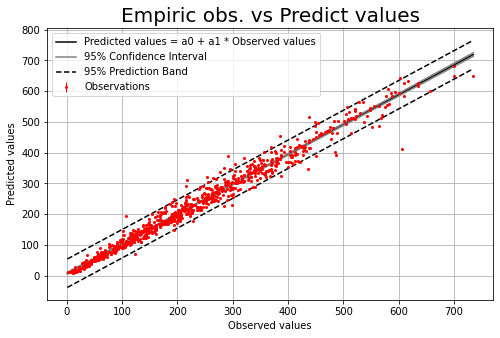

In [80]:
# Building linear a graph and calculation uncertainties
# retrieve parameter values
a0 = popt[0]
a1 = popt[1]
print('Optimal values of regression parameters')
print(f'a0: {a0:.3f}')
print(f'a1: {a1:.3f}')

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
r2 = round(r2, 3)
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
index_a0 = str(a0).find('+/-')
index_a1 = str(a1).find('+/-')
am_a0 = str(a0)[0:index_a0]
ci_a0 = str(a0)[index_a0+3:]
am_a1 = str(a1)[0:index_a1]
ci_a1 = str(a1)[index_a1+3:]
print(am_a0, '+-', ci_a0)

print('Uncertainty')
print(f'a0: {am_a0}+/-{round(float(ci_a0)*(n_all_y**0.5)/(n_stat_y**0.5), 3)}')
print(f'a1: {am_a1}+/-{round(float(ci_a1)*(n_all_y**0.5)/(n_stat_y**0.5), 3)}')

# plot data
plt.figure(figsize =(8, 5))
plt.errorbar(stat_y['GS_cub_m']['mean'], stat_y[0]['50%'], yerr=[list(l_sd_y_pred), list(t_sd_y_pred)], c = 'red', fmt='o', lw=1, ms=2, label='Observations')
plt.yscale('linear')

# calculate regression confidence interval
px = np.linspace(1, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

# estimation uncertenlies intervals
def predband(x_plot, xd, yd, p, func, conf=0.95):
    # x_plot = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x_plot - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x_plot, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std * (n_all_y**0.5)/(n_stat_y**0.5), c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std * (n_all_y**0.5)/(n_stat_y**0.5), c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

# Uncertainty parameters and confidence intervals

In [81]:
# Intermedia ratio for calculation CI
CIR = 2/((n_test + n_train)/n_test)**0.5

In [82]:
# Statistic for SHAP-values

number_iteration = len(aggr_Shap_values.groupby(['Feature']))
shap_list = aggr_Shap_values.groupby(['Feature'])


for i in range(number_iteration):
    itr_mean = round(np.mean(list(shap_list)[i][1].iloc[0:, 1]), 3)
    itr_Q50 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.50), 3)
    itr_Q16 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.16), 3)
    itr_Q84 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.84), 3)
    itr_l = (itr_Q50 - itr_Q16)*CIR
    l_CI = itr_Q50 - itr_l
    itr_t = (itr_Q84 - itr_Q50)*CIR
    t_CI = itr_Q50 + itr_t
    print(f"{list(shap_list)[i][0]}: mean - {itr_mean}, median - {itr_Q50}, CI - [{round(l_CI, 3)}-{round(t_CI, 3)}]\n")
print("\n")          

BA_sq_m_ha: mean - 71.703, median - 72.387, CI - [69.052-73.66]

DBH_cm: mean - 5.884, median - 5.718, CI - [4.94-6.693]

H_m: mean - 62.404, median - 61.97, CI - [59.963-64.95]

Origin_ID: mean - 2.657, median - 2.652, CI - [2.313-2.958]

Species_ID: mean - 4.499, median - 4.504, CI - [4.099-4.876]





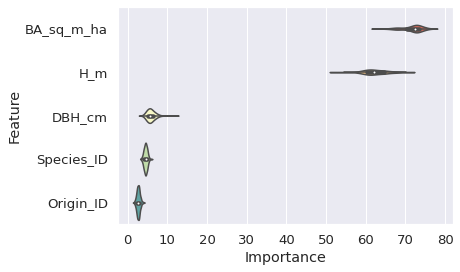

In [83]:
sns.set(font_scale=1.2)
sns.violinplot(x="Importance", y="Feature", data=aggr_Shap_values, inner="box", palette="Spectral", order=['BA_sq_m_ha', 'H_m', 'DBH_cm', 'Species_ID', 'Origin_ID'])
sns.set(rc={'figure.figsize':(15,9)})
plt.show()

In [84]:
# Aggregate stat
# optimal number of iterations
aggr_optimal_n_mean = np.mean(aggr_optimal_n)
aggr_optimal_n_Q025 = np.quantile(aggr_optimal_n, 0.025)
aggr_optimal_n_Q16 = np.quantile(aggr_optimal_n, 0.16)
aggr_optimal_n_Q50 = np.quantile(aggr_optimal_n, 0.50)
aggr_optimal_n_Q84 = np.quantile(aggr_optimal_n, 0.84)
aggr_optimal_n_Q975 = np.quantile(aggr_optimal_n, 0.975)

# bias
aggr_bias_mean = np.mean(aggr_bias)
aggr_bias_Q025 = np.quantile(aggr_bias, 0.025)
aggr_bias_Q16 = np.quantile(aggr_bias, 0.16)
aggr_bias_Q50 = np.quantile(aggr_bias, 0.50)
aggr_bias_Q84 = np.quantile(aggr_bias, 0.84)
aggr_bias_Q975 = np.quantile(aggr_bias, 0.975)

aggr_rel_bias_mean = np.mean(aggr_rel_bias)
aggr_rel_bias_Q025 = np.quantile(aggr_rel_bias, 0.025)
aggr_rel_bias_Q16 = np.quantile(aggr_rel_bias, 0.16)
aggr_rel_bias_Q50 = np.quantile(aggr_rel_bias, 0.50)
aggr_rel_bias_Q84 = np.quantile(aggr_rel_bias, 0.84)
aggr_rel_bias_Q975 = np.quantile(aggr_rel_bias, 0.975)

# RMSE
aggr_rmse_mean = np.mean(aggr_rmse)
aggr_rmse_Q025 = np.quantile(aggr_rmse, 0.025)
aggr_rmse_Q16 = np.quantile(aggr_rmse, 0.16)
aggr_rmse_Q50 = np.quantile(aggr_rmse, 0.50)
aggr_rmse_Q84 = np.quantile(aggr_rmse, 0.84)
aggr_rmse_Q975 = np.quantile(aggr_rmse, 0.975)

aggr_rel_rmse_mean = np.mean(aggr_rel_rmse)
aggr_rel_rmse_Q025 = np.quantile(aggr_rel_rmse, 0.025)
aggr_rel_rmse_Q16 = np.quantile(aggr_rel_rmse, 0.16)
aggr_rel_rmse_Q50 = np.quantile(aggr_rel_rmse, 0.50)
aggr_rel_rmse_Q84 = np.quantile(aggr_rel_rmse, 0.84)
aggr_rel_rmse_Q975 = np.quantile(aggr_rel_rmse, 0.975)

# MSE
aggr_mse_mean = np.mean(aggr_mse)
aggr_mse_Q025 = np.quantile(aggr_mse, 0.025)
aggr_mse_Q16 = np.quantile(aggr_mse, 0.16)
aggr_mse_Q50 = np.quantile(aggr_mse, 0.50)
aggr_mse_Q84 = np.quantile(aggr_mse, 0.84)
aggr_mse_Q975 = np.quantile(aggr_mse, 0.975)

# R-square
aggr_R_square_mean = np.mean(aggr_R_square)
aggr_R_square_Q025 = np.quantile(aggr_R_square, 0.025)
aggr_R_square_Q16 = np.quantile(aggr_R_square, 0.16)
aggr_R_square_Q50 = np.quantile(aggr_R_square, 0.50)
aggr_R_square_Q84 = np.quantile(aggr_R_square, 0.84)
aggr_R_square_Q975 = np.quantile(aggr_R_square, 0.975)



In [85]:
# Output calculated stat
print(f"Aggregate optimal number of iterations statistic: \n mean: {round(aggr_optimal_n_mean, 3)}, median: {round(aggr_optimal_n_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_optimal_n_Q025, 3)}-{round(aggr_optimal_n_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_optimal_n_Q50-((aggr_optimal_n_Q50-aggr_optimal_n_Q16)*CIR), 3)}-{round(aggr_optimal_n_Q50+((aggr_optimal_n_Q84-aggr_optimal_n_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias statistic: \n mean: {round(aggr_bias_mean, 3)}, median: {round(aggr_bias_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_bias_Q025, 3)}-{round(aggr_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_bias_Q50-((aggr_bias_Q50-aggr_bias_Q16)*CIR), 3)}-{round(aggr_bias_Q50+((aggr_bias_Q84-aggr_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE statistic: \n mean: {round(aggr_rmse_mean, 3)}, median: {round(aggr_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rmse_Q025, 3)}-{round(aggr_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rmse_Q50-((aggr_rmse_Q50-aggr_rmse_Q16)*CIR), 3)}-{round(aggr_rmse_Q50+((aggr_rmse_Q84-aggr_rmse_Q50)*CIR), 3)} \n***")
print(f"Aggregate MSE statistic: \n mean: {round(aggr_mse_mean, 3)}, median: {round(aggr_mse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_mse_Q025, 3)}-{round(aggr_mse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_mse_Q50-((aggr_mse_Q50-aggr_mse_Q16)*CIR), 3)}-{round(aggr_mse_Q50+((aggr_mse_Q84-aggr_mse_Q50)*CIR), 3)} \n***")
print(f"Aggregate R^2 statistic: \n mean: {round(aggr_R_square_mean, 3)}, median: {round(aggr_R_square_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_R_square_Q025, 3)}-{round(aggr_R_square_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_R_square_Q50-((aggr_R_square_Q50-aggr_R_square_Q16)*CIR), 3)}-{round(aggr_R_square_Q50+((aggr_R_square_Q84-aggr_R_square_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias(%) statistic: \n mean: {round(aggr_rel_bias_mean, 3)}, median: {round(aggr_bias_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_bias_Q025, 3)}-{round(aggr_rel_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_bias_Q50-((aggr_rel_bias_Q50-aggr_rel_bias_Q16)*CIR), 3)}-{round(aggr_rel_bias_Q50+((aggr_rel_bias_Q84-aggr_rel_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE(%) statistic: \n mean: {round(aggr_rel_rmse_mean, 3)}, median: {round(aggr_rel_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_rmse_Q025, 3)}-{round(aggr_rel_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_rmse_Q50-((aggr_rel_rmse_Q50-aggr_rel_rmse_Q16)*CIR), 3)}-{round(aggr_rel_rmse_Q50+((aggr_rel_rmse_Q84-aggr_rel_rmse_Q50)*CIR), 3)} \n***")

Aggregate optimal number of iterations statistic: 
 mean: 119.14, median: 122.0,
 pred. interval (P(0.025)-P(0.975)): 38.975-171.0, 
 conf. interval (p-value=0.95): 83.186-159.775 
***
Aggregate bias statistic: 
 mean: 0.137, median: -0.042,
 pred. interval (P(0.025)-P(0.975)): -3.894-4.268, 
 conf. interval (p-value=0.95): -1.598-2.132 
***
Aggregate RMSE statistic: 
 mean: 23.877, median: 23.768, pred. interval (P(0.025)-P(0.975)): 19.518-28.955, 
 conf. interval (p-value=0.95): 21.602-26.58 
***
Aggregate MSE statistic: 
 mean: 576.886, median: 564.903, pred. interval (P(0.025)-P(0.975)): 380.971-838.402, 
 conf. interval (p-value=0.95): 467.19-707.425 
***
Aggregate R^2 statistic: 
 mean: 0.972, median: 0.973, pred. interval (P(0.025)-P(0.975)): 0.96-0.983, 
 conf. interval (p-value=0.95): 0.967-0.978 
***
Aggregate bias(%) statistic: 
 mean: 0.068, median: -0.042, pred. interval (P(0.025)-P(0.975)): -1.69-1.864, 
 conf. interval (p-value=0.95): -0.687-0.903 
***
Aggregate RMSE(%) 

# Creating final XGBoost model using all obs. for its training

SHAP method

In [57]:
# Load SHAP`s library
import shap

In [58]:
# Сreate an уxplainer object
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_train)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


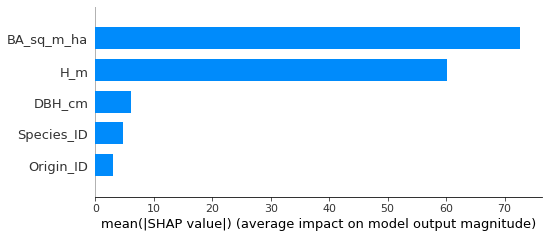

In [59]:
# Mean absolute value of the SHAP values for each feature 
shap.summary_plot(shap_values, X_train, plot_type="bar")

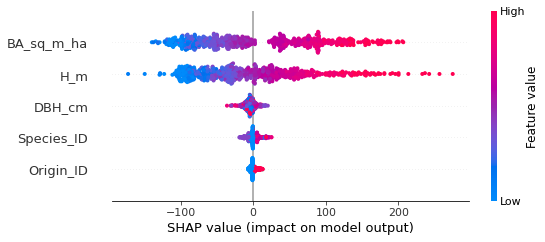

In [60]:
# Graph that summarises the effects of all the features
shap.summary_plot(shap_values, X_train)

# Save XGBoost model

In [62]:
# Save to JSON
xgb_model.save_model("/home/dima/Desktop/JupyterLab/GIS and ML algoritms/1_Estimation of tree biomass/xgb_model_GS.json")
# Save to text format
xgb_model.save_model("/home/dima/Desktop/JupyterLab/GIS and ML algoritms/1_Estimation of tree biomass/xgb_model_GS.txt")